In [1]:
import os
import pandas as pd
import sys
import os
from scipy.stats import mannwhitneyu as mwu
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
from statsmodels.stats.multitest import fdrcorrection

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\astar\AppData\Local\Temp\ipykernel_20056\162322644.py:11: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


In [72]:
m.sort_values("alpha", ascending = False)

Gene  Median Fixed PhyloP  Number Fixed Variants  \
13      NCR2             0.033053                    461   
136    SYNE3             0.033150                    407   
95   HSD17B3             0.022096                    451   
6     WDSUB1             0.028843                    935   
132    CRYL1             0.031362                    642   
..       ...                  ...                    ...   
21   OSBPL11             0.021520                    338   
5       PCCA             0.021258                    990   
31   TMEM121             0.020097                    139   
461   OR13A1             0.010220                    109   
8        ME1             0.014880                    430   

     Median Polymorphic PhyloP  Number Polymorphic Variants  \
13                    0.021718                          241   
136                   0.021069                          207   
95                    0.015853                          241   
6                     0.020095                          438   
132                   0.020981                          219   
..                         ...                          ...   
21                    0.034743                          296   
5                     0.028546                          262   
31                    0.031582                         2026   
461                   0.017166                          257   
8                     0.019613                          202   

     Fisher exact p-value  MWU p-value     alpha    Cutoff  \
13               0.000157     0.000093  0.504206  0.050704   
136              0.001630     0.000208  0.473726  0.061293   
95               0.000708     0.000583  0.469775  0.037313   
6                0.000003     0.000010  0.467553  0.050295   
132              0.002180     0.000568  0.435801  0.051872   
..                    ...          ...       ...       ...   
21               0.000479     0.000039 -1.225862  0.085986   
5                0.000013     0.000026 -1.332832  0.076423   
31               0.000522     0.000020 -1.644201  0.075579   
461              0.005396     0.000423 -1.750809  0.047963   
8                0.000025     0.002516 -1.970445  0.045946   

         [[dc, du], [pc, pu]]  Proportion  FDR fisher   FDR MWU  \
13    [[154, 307], [48, 193]]         0.8    0.143423  0.113869   
136   [[130, 277], [41, 166]]         0.8    0.321356  0.075247   
95    [[144, 307], [48, 193]]         0.8    0.259493  0.076506   
6     [[297, 638], [87, 351]]         0.8    0.006069  0.017521   
132   [[194, 448], [43, 176]]         0.8    0.726161  0.220099   
..                        ...         ...         ...       ...   
21     [[34, 304], [59, 237]]         0.8    0.350823  0.142066   
5      [[95, 895], [52, 210]]         0.8    0.048986  0.028867   
31   [[12, 127], [405, 1621]]         0.8    0.382607  0.062009   
461     [[9, 100], [51, 206]]         0.8    0.514356  0.068322   
8      [[33, 397], [40, 162]]         0.8    0.030271  0.149630   

                         Cell type  
13                             SST  
136  FetalBrainNeurGlioblast_CB_VZ  
95           FetalHeartEndocardium  
6    FetalBrainNeurGlioblast_CB_VZ  
132                            AMY  
..                             ...  
21                     SertoliMale  
5                             ASCT  
31      FetalBrainNeurSerotonergic  
461          FetalHeartEndocardium  
8              FetalHeartPericytes  

[602 rows x 14 columns]

In [67]:
m.sort_values("alpha", ascending = False).head(50)

Gene  Median Fixed PhyloP  Number Fixed Variants  \
1       WDR17             0.035889                    411   
167   HSD17B3             0.022096                    451   
20       CUBN             0.039647                    847   
396     SYNE3             0.033150                    407   
28       TDRP             0.028760                    798   
69     WDSUB1             0.028843                    935   
70      KCNK9             0.022798                   3828   
158     KCNK9             0.024544                   3828   
35       GYPC             0.014290                   6893   
903     CSMD1             0.015011                  19740   
387     PCDH7             0.013984                  22507   
431     FLRT2             0.014717                  14317   
549     ARAP2             0.028704                  10812   
2365     GPC6             0.014757                   6668   
1560  KHDRBS3             0.015973                   8542   
1480   SUCLG1             0.013503                   8720   
233      CDH6             0.014395                   9719   
211     TECRL             0.011909                  10767   
115     ARAP2             0.013622                  10812   
368     AMY1C             0.013104                   6793   
281     OTOL1             0.014129                   6936   
359     CRIM1             0.014349                   6375   
895      FSCB             0.014194                   5850   
130     LPHN2             0.013723                  10633   
46      CNTN5             0.012856                  10261   
10      NCAM2             0.014073                  15404   
4       NCAM2             0.012807                  15404   
378   XPNPEP1             0.015099                   7059   
425     NOVA1             0.014512                   7584   
196     NSUN3             0.013705                   5835   
18    SLITRK1             0.013833                  11966   
223      FSCB             0.012634                   5850   
2484   CTNNA2             0.015185                   2621   
378    RPL10L             0.012150                   5050   
14         SI             0.016866                   8557   
1093    KDM4C             0.015535                   2226   
12         SI             0.014984                   8557   
3          SI             0.022144                   8557   
1834     RFX3             0.014821                   3240   
66     SUCLG1             0.014560                   8720   
393    ARPP21             0.013644                   5528   
2     KHDRBS2             0.012665                   9415   
7          SI             0.011912                   8557   
28      MAT2B             0.029028                   8699   
256      SGCG             0.016842                   3736   
195     CXADR             0.029486                   3113   
7      FAM86A             0.009706                   7066   
3          SI             0.016594                   8557   
1        BAI3             0.012358                   9716   
0          SI             0.025973                   8557   

      Median Polymorphic PhyloP  Number Polymorphic Variants  \
1                      0.022186                          211   
167                    0.015853                          241   
20                     0.029136                          282   
396                    0.021069                          207   
28                     0.020692                          338   
69                     0.020095                          438   
70                     0.019095                         1119   
158                    0.020493                         1119   
35                     0.012384                         1508   
903                    0.015734                         6027   
387                    0.014767                         5566   
431                    0.015824                         4109   
549                    0.031073                         3430   
2

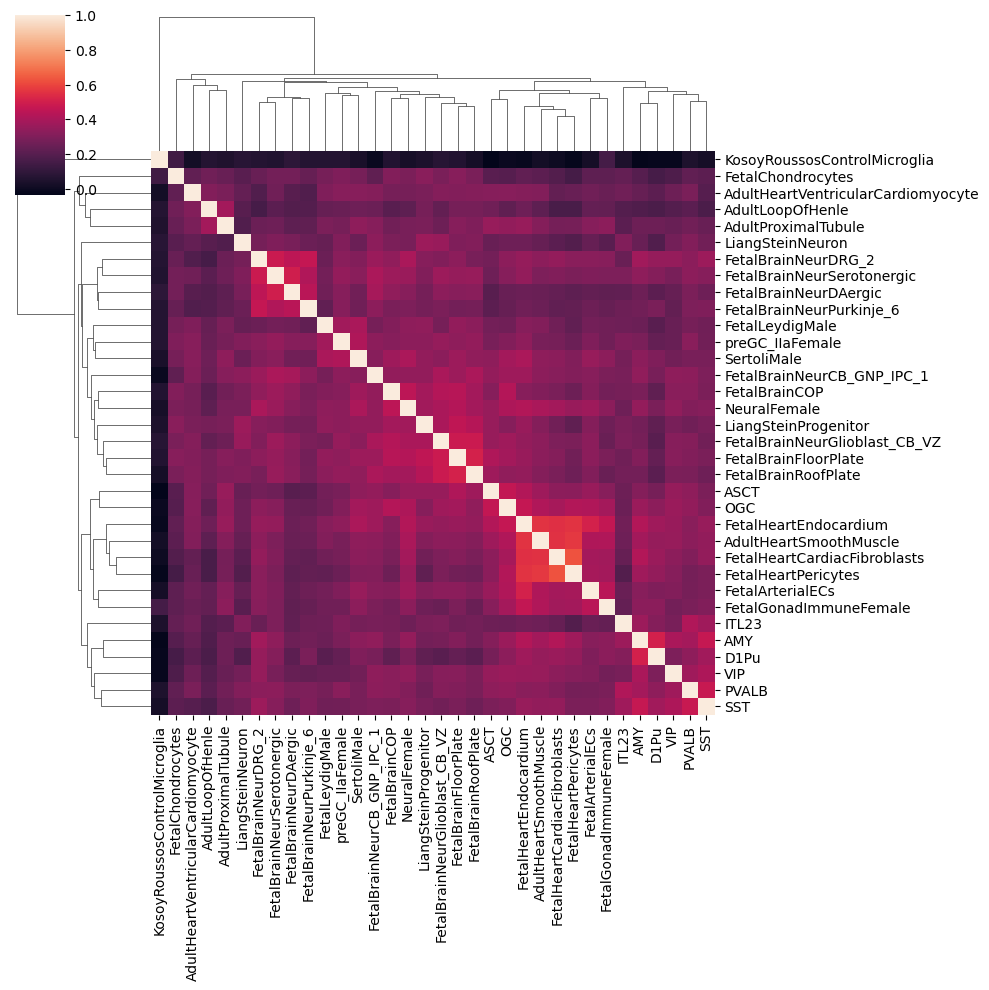

In [51]:
x = pd.read_csv("Input_ZScore_PerGene_MASH_Proportion_MWU.txt", sep = '\t').set_index("Gene")
sns.clustermap(x.corr())

<Axes: ylabel='GYPA'>

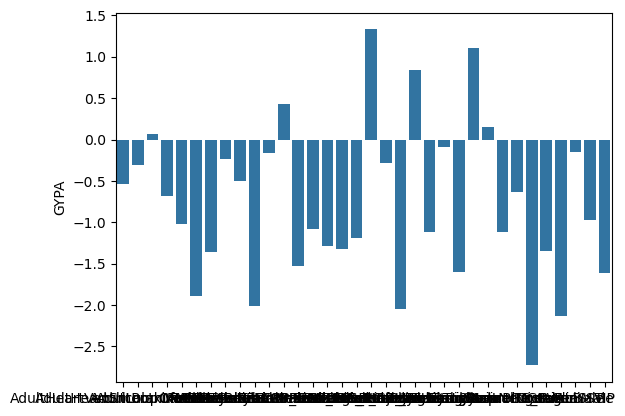

In [73]:
sns.barplot(x.loc["GYPA"])

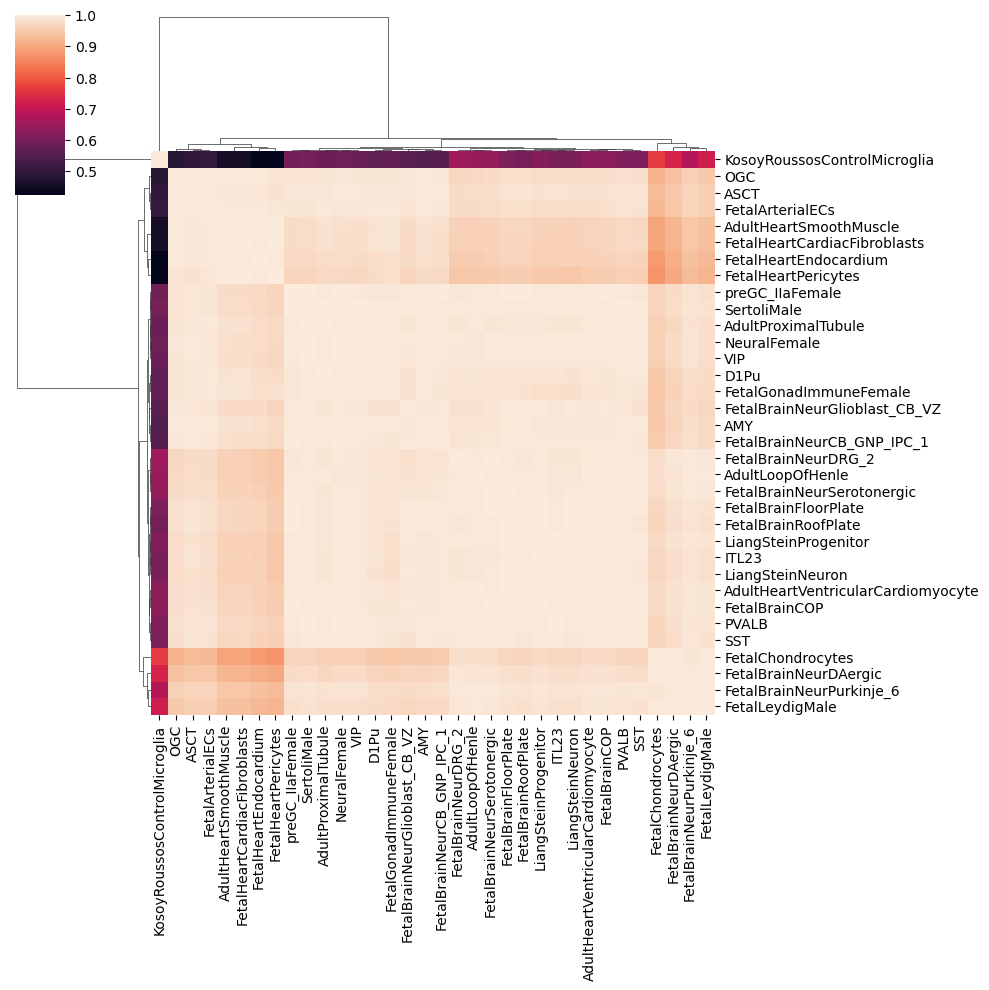

In [46]:
x = pd.read_csv("Effects_WithV_MWU_PerGene_Strong0.25_Prelim.txt", sep = '\t')
sns.clustermap(x.corr())

In [ ]:
for file in os.listdir("CADD_bestfit"):
    if file[0] != ".":
        v = pd.read_csv("CADD_bestfit/" + file, sep = " ", header = None)
        prev = 1
        out = []
        for index, row in v.iterrows():
            out.append([file.replace(".bmap.txt", ""), prev, prev + row[1], row[0]])
            prev += row[1]
        df = pd.DataFrame(out)
        df.to_csv(file.replace(".bmap.txt", "") + "_bmap_hg19.bed", sep = "\t", header = False, index = False)

In [16]:
v = pd.read_csv("Windows_FE/Windows_BGS_Score_PC0_SpecSup250_MAF0.25.txt", sep = "\t")
vv = pd.read_csv("Windows_FE/Windows_MskHumPhyloP_PC0_SpecSup250_MAF0.25.txt", sep = '\t')
vv.sort_values("Fisher exact signed p-value").head(50).tail(50)
#vv[vv["Window"].isin(["chr12:10300000-11300000"])]

Window  Statistic  Median fixed PhyloP4474  \
20802    chr15:72200000-73200000  PhyloP447                   1.2795   
5603    chr3:139500000-140500000  PhyloP447                   1.5900   
11983     chr7:88500000-89500000  PhyloP447                   1.6205   
9814      chr6:14600000-15600000  PhyloP447                   1.7195   
20801    chr15:72100000-73100000  PhyloP447                   1.3145   
17540    chr12:10700000-11700000  PhyloP447                   1.7650   
5604    chr3:139600000-140600000  PhyloP447                   1.6050   
14459     chr9:79800000-80800000  PhyloP447                   1.4590   
17539    chr12:10600000-11600000  PhyloP447                   1.4540   
23529    chr19:50000000-51000000  PhyloP447                   2.0140   
6100    chr3:189600000-190600000  PhyloP447                   1.4290   
8398      chr5:52200000-53200000  PhyloP447                   1.5300   
7864    chr4:179100000-180100000  PhyloP447                   1.6370   
7865    chr4:179200000-180200000  PhyloP447                   1.5650   
21179     chr16:9000000-10000000  PhyloP447                   1.4080   
11884     chr7:78300000-79300000  PhyloP447                   1.2990   
23448    chr19:40200000-41200000  PhyloP447                   1.8560   
20803    chr15:72300000-73300000  PhyloP447                   1.3085   
11982     chr7:88400000-89400000  PhyloP447                   1.6260   
14458     chr9:79700000-80700000  PhyloP447                   1.4655   
5605    chr3:139700000-140700000  PhyloP447                   1.5740   
2876      chr2:81100000-82100000  PhyloP447                   1.4660   
24198    chr21:20200000-21200000  PhyloP447                   1.5140   
5601    chr3:139300000-140300000  PhyloP447                   1.6050   
4245    chr2:234000000-235000000  PhyloP447                   1.8950   
11928     chr7:82700000-83700000  PhyloP447                   1.3260   
4805      chr3:54000000-55000000  PhyloP447                   1.5150   
4246    chr2:234100000-235100000  PhyloP447                   1.7830   
16945    chr11:85400000-86400000  PhyloP447                   1.1790   
24042    chr20:52600000-53600000  PhyloP447                   1.9000   
9815      chr6:14700000-15700000  PhyloP447                   1.5480   
6082    chr3:187800000-188800000  PhyloP447                   1.4960   
18888    chr13:41100000-42100000  PhyloP447                   1.2380   
12918     chr8:28500000-29500000  PhyloP447                   1.3230   
3191    chr2:125900000-126900000  PhyloP447                   1.4680   
23531    chr19:50200000-51200000  PhyloP447                   2.0330   
21505    chr16:62600000-63600000  PhyloP447                   1.5760   
20808    chr15:72800000-73800000  PhyloP447                   1.2270   
18090    chr12:69700000-70700000  PhyloP447                   1.2740   
24029    chr20:51300000-52300000  PhyloP447                   1.6250   
2586      chr2:52100000-53100000  PhyloP447                   1.2210   
24197    chr21:20100000-21100000  PhyloP447                   1.4690   
16900    chr11:80900000-81900000  PhyloP447                   1.3850   
5872    chr3:166800000-167800000  PhyloP447                   1.2865   
15509    chr10:55400000-56400000  PhyloP447                   1.2030   
17538    chr12:10500000-11500000  PhyloP447                   1.5010   
21093  chr15:101300000-102300000  PhyloP447                   1.3055   
9813      chr6:14500000-15500000  PhyloP447                   1.6760   
1287    chr1:161600000-162600000  PhyloP447                   1.2220   
5873    chr3:166900000-167900000  PhyloP447                   1.2745   

       Number fixed variants  Median polymorphic PhyloP447  \
20802                    360                        0.9400   
5603                     462                        1.2845   
11983                    246                        1.0700   
9814                     408                        1.0245   
20801                    340               

In [10]:
v = pd.read_csv("Windows_FE/Windows_BGS_Score_PC0_SpecSup100_MAF0.25.txt", sep = "\t")
vv = pd.read_csv("Windows_FE/Windows_MskHumPhyloP_PC0_SpecSup100_MAF0.25.txt", sep = '\t')
vv.sort_values("Fisher exact signed p-value").head(50).tail(50)
#vv[vv["Window"].isin(["chr7:88500000-89500000"])]

Window  Statistic  Median fixed PhyloP4474  \
14299  chr8:108200000-109200000  PhyloP447                   0.8750   
1549   chr1:181500000-182500000  PhyloP447                   0.7530   
7058     chr4:58100000-59100000  PhyloP447                   0.8950   
18399   chr12:10300000-11300000  PhyloP447                   0.7080   
18400   chr12:10400000-11400000  PhyloP447                   0.7120   
1545   chr1:181100000-182100000  PhyloP447                   0.9530   
20015   chr13:60300000-61300000  PhyloP447                   0.7165   
3407   chr2:125300000-126300000  PhyloP447                   0.6790   
7059     chr4:58200000-59200000  PhyloP447                   0.8810   
18398   chr12:10200000-11200000  PhyloP447                   0.6360   
1548   chr1:181400000-182400000  PhyloP447                   0.8770   
7057     chr4:58000000-59000000  PhyloP447                   0.9100   
7045     chr4:56800000-57800000  PhyloP447                   1.0365   
14300  chr8:108300000-109300000  PhyloP447                   0.8215   
7052     chr4:57500000-58500000  PhyloP447                   1.0280   
7384     chr4:90700000-91700000  PhyloP447                   0.6340   
1207   chr1:147000000-148000000  PhyloP447                   0.8735   
14296  chr8:107900000-108900000  PhyloP447                   0.9660   
7054     chr4:57700000-58700000  PhyloP447                   0.9170   
1208   chr1:147100000-148100000  PhyloP447                   0.8060   
7051     chr4:57400000-58400000  PhyloP447                   1.0685   
18401   chr12:10500000-11500000  PhyloP447                   0.6370   
1701   chr1:196700000-197700000  PhyloP447                   0.6370   
7053     chr4:57600000-58600000  PhyloP447                   1.0430   
18403   chr12:10700000-11700000  PhyloP447                   0.7980   
14301  chr8:108400000-109400000  PhyloP447                   0.8160   
14295  chr8:107800000-108800000  PhyloP447                   0.9125   
1546   chr1:181200000-182200000  PhyloP447                   0.8760   
20017   chr13:60500000-61500000  PhyloP447                   0.7430   
12529    chr7:85000000-86000000  PhyloP447                   0.7935   
297      chr1:30600000-31600000  PhyloP447                   0.8200   
14298  chr8:108100000-109100000  PhyloP447                   0.8750   
1547   chr1:181300000-182300000  PhyloP447                   0.8685   
18404   chr12:10800000-11800000  PhyloP447                   0.8520   
13897    chr8:68000000-69000000  PhyloP447                   0.6430   
18402   chr12:10600000-11600000  PhyloP447                   0.6360   
14429  chr8:121200000-122200000  PhyloP447                   0.7080   
12879  chr7:120000000-121000000  PhyloP447                   1.0545   
3028     chr2:81100000-82100000  PhyloP447                   0.6870   
14851    chr9:19900000-20900000  PhyloP447                   0.9690   
20016   chr13:60400000-61400000  PhyloP447                   0.6810   
18405   chr12:10900000-11900000  PhyloP447                   1.0920   
2992     chr2:77500000-78500000  PhyloP447                   0.6340   
8054   chr4:157700000-158700000  PhyloP447                   0.8055   
22494   chr16:47900000-48900000  PhyloP447                   0.6320   
22495   chr16:48000000-49000000  PhyloP447                   0.6370   
4218   chr2:206400000-207400000  PhyloP447                   1.0460   
12433    chr7:75400000-76400000  PhyloP447                   0.7215   
20013   chr13:60100000-61100000  PhyloP447                   0.8465   
3027     chr2:81000000-82000000  PhyloP447                   0.7640   

       Number fixed variants  Median polymorphic PhyloP447  \
14299                    863                        0.5560   
1549                     856                        0.4930   
7058                     701                        0.6260   
18399                    328                        0.4910   
18400                    289                        0.4940   
1545                     842   

C:\Users\astar\AppData\Local\Temp\ipykernel_27632\2558705860.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


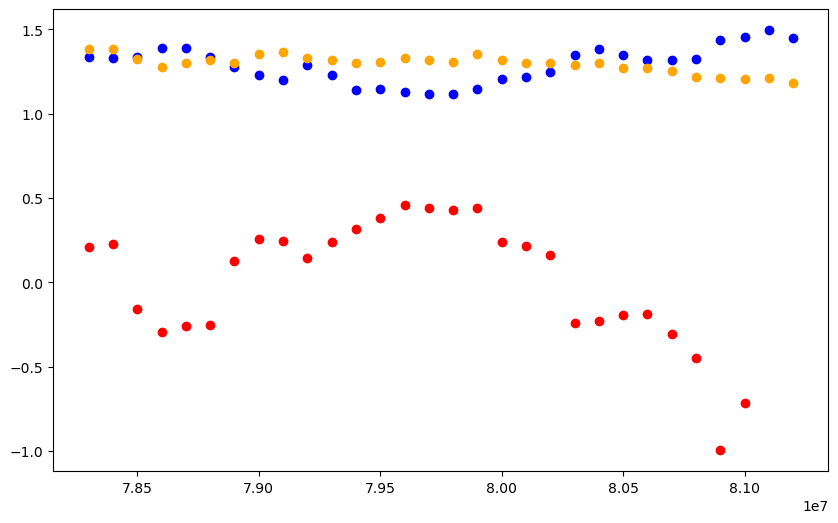

In [19]:
v = pd.read_csv("Output_Windows_SimpleBL/Windows_BGS_Score_PC0_SpecSup250_MAF0.25.txt", sep = "\t").set_index("Window")
vv = pd.read_csv("Output_Windows_SimpleBL/Windows_MskHumPhyloP_PC0_SpecSup250_MAF0.25.txt", sep = '\t').set_index("Window")
vv.columns = [x + " P" for x in list(vv.columns)]
v.columns = [x + " BGS" for x in list(v.columns)]
vvv = v.join(vv).dropna()

vvv["PhyloP Statistic"] = -np.sign(vvv["Median fixed PhyloP4474 P"] - vvv["Median polymorphic PhyloP447 P"])*np.log10(vvv["Wilcoxon signed p-value P"])
vvv["BGS Statistic"] = -np.sign(vvv["Median fixed BGS Score BGS"] - vvv["Median polymorphic BGS Score BGS"])*np.log10(vvv["Wilcoxon signed p-value BGS"])
vvv["PhyloP Statistic corrected"] = vvv["PhyloP Statistic"] - np.maximum(vvv["BGS Statistic"], np.repeat(0, vvv.shape[0]))
vvv["Chrom"] = [x.split(":")[0] for x in list(vvv.index)]

v["Chrom"] = [x.split(":")[0] for x in list(v.index)]
v = vvv[vvv["Chrom"].isin(["chr9"])]
v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
v = v.sort_values("Loc")
v["X"] = range(v.shape[0])
#kde0 = gaussian_kde(v["7"], bw_method=0.3)
#y = gaussian_filter1d([x if x > 0 else 0 for x in list(v["Wilcoxon signed p-value"])], sigma=3)
#y = [x if x > 0 else 0 for x in list(v["alpha"])]
#y = -np.log10(v["Wilcoxon signed p-value"])
# determine the indices of the local maxima

#v["Smoothed"] = y
v_zoom = v[v["Loc"].isin(range(79800000-1500000, 79800000+1500000))]
x = v_zoom["Loc"]


fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, v_zoom["Median polymorphic PhyloP447 P"], color='b', label='Alpha')
ax.scatter(x, v_zoom["Median fixed PhyloP4474 P"], color='orange', label='Alpha')
ax.scatter(x, np.log10(1+v_zoom["PhyloP Statistic"]), color='red', label='Alpha')
#ax.scatter(x, v_zoom["alpha P"], color='green', label='Alpha')
#ax.scatter(x, v_zoom["PhyloP Statistic corrected"], color='red', label='Alpha')

plt.show()

In [32]:
np.maximum(np.array(vvv["BGS Statistic"]), np.repeat(0, vvv.shape[0]))

array([0.        , 0.72794537, 1.48442486, ..., 0.        , 1.02934182,
       0.        ])

In [28]:
np.max(np.array(vvv["BGS Statistic"]), np.repeat(0, vvv.shape[0]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
v = pd.read_csv("Windows_FE/Windows_BGS_Score_PC0_SpecSup250_MAF0.25.txt", sep = "\t")
vv = pd.read_csv("Windows_FE/Windows_MskHumPhyloP_PC0_SpecSup250_MAF0.25.txt", sep = '\t')
vv.columns = [x + " P" for x in list(vv.columns)]
v.columns = [x + " BGS" for x in list(v.columns)]

In [30]:
vvv

Statistic BGS  Median fixed BGS Score BGS  \
Window                                                              
chr1:800000-1800000         BGS_Score                       634.0   
chr1:900000-1900000         BGS_Score                       634.0   
chr1:1000000-2000000        BGS_Score                       634.0   
chr1:1100000-2100000        BGS_Score                       651.0   
chr1:1200000-2200000        BGS_Score                       653.0   
...                               ...                         ...   
chr22:49400000-50400000     BGS_Score                       907.0   
chr22:49500000-50500000     BGS_Score                       903.0   
chr22:49600000-50600000     BGS_Score                       830.0   
chr22:49700000-50700000     BGS_Score                       703.0   
chr22:49800000-50800000     BGS_Score                       675.0   

                         Number fixed variants BGS  \
Window                                               
chr1:800000-1800000                            148   
chr1:900000-1900000                            215   
chr1:1000000-2000000                           238   
chr1:1100000-2100000                           314   
chr1:1200000-2200000                           388   
...                                            ...   
chr22:49400000-50400000                        478   
chr22:49500000-50500000                        429   
chr22:49600000-50600000                        337   
chr22:49700000-50700000                        222   
chr22:49800000-50800000                        125   

                         Median polymorphic BGS Score BGS  \
Window                                                      
chr1:800000-1800000                                 633.0   
chr1:900000-1900000                                 634.0   
chr1:1000000-2000000                                634.0   
chr1:1100000-2100000                                634.0   
chr1:1200000-2200000                                653.0   
...                                                   ...   
chr22:49400000-50400000                             907.0   
chr22:49500000-50500000                             854.0   
chr22:49600000-50600000                             712.0   
chr22:49700000-50700000                             677.0   
chr22:49800000-50800000                             676.0   

                         Number polymorphic variants BGS  \
Window                                                     
chr1:800000-1800000                                   31   
chr1:900000-1900000                                   47   
chr1:1000000-2000000                                  64   
chr1:1100000-2100000                                  77   
chr1:1200000-2200000                                  93   
...                                                  ...   
chr22:49400000-50400000                              104   
chr22:49500000-50500000                               85   
chr22:49600000-50600000                               63   
chr22:49700000-50700000                               47   
chr22:49800000-50800000                               31   

                         Fisher exact signed p-value BGS  alpha BGS  \
Window                                                                
chr1:800000-1800000                             0.001133   0.785209   
chr1:900000-1900000                             0.001559   0.750906   
chr1:1000000-2000000                            0.017512   0.093251   
chr1:1100000-2100000                            0.137284   0.028686   
chr1:1200000-2200000                            0.166554   0.219120   
...                                                  ...        ...   
chr22:49400000-50400000                         0.697514  -0.231892   
chr22:49500000-50500000                         0.095619   0.292758   
chr22:49600000-50600000                         0.004548   0.478692   
chr22:49700000-50700000                         0.074095   0.506462

In [29]:
v = pd.read_csv("Windows_FE/Windows_BGS_Score_PC0_SpecSup50_MAF0.25.txt", sep = "\t").set_index("Window")
vv = pd.read_csv("Windows_FE/Windows_MskHumPhyloP_PC0_SpecSup50_MAF0.25.txt", sep = '\t').set_index("Window")
vv.columns = [x + " P" for x in list(vv.columns)]
v.columns = [x + " BGS" for x in list(v.columns)]
vvv = v.join(vv).dropna()

vvv["PhyloP Statistic"] = -np.sign(vvv["Median fixed PhyloP4474 P"] - vvv["Median polymorphic PhyloP447 P"])*np.log10(vvv["Fisher exact signed p-value P"])
vvv["BGS Statistic"] = -np.sign(vvv["Median fixed BGS Score BGS"] - vvv["Median polymorphic BGS Score BGS"])*np.log10(vvv["Fisher exact signed p-value BGS"])
vvv["PhyloP Statistic corrected"] = vvv["PhyloP Statistic"] - np.maximum(vvv["BGS Statistic"], np.repeat(0, vvv.shape[0]))
vvv.sort_values("PhyloP Statistic", ascending = False).head(50)

Statistic BGS  Median fixed BGS Score BGS  \
Window                                                               
chr3:126000000-127000000     BGS_Score                       809.0   
chr1:196700000-197700000     BGS_Score                       621.0   
chr3:126100000-127100000     BGS_Score                       876.0   
chr8:107900000-108900000     BGS_Score                       655.0   
chr4:58100000-59100000       BGS_Score                       883.0   
chr8:108200000-109200000     BGS_Score                       715.0   
chr7:41800000-42800000       BGS_Score                       865.0   
chr1:196600000-197600000     BGS_Score                       622.0   
chr7:85000000-86000000       BGS_Score                       840.0   
chr4:58200000-59200000       BGS_Score                       883.0   
chr4:58000000-59000000       BGS_Score                       884.0   
chr1:196000000-197000000     BGS_Score                       762.0   
chr4:57600000-58600000       BGS_Score                       879.0   
chr7:41700000-42700000       BGS_Score                       862.0   
chr3:126200000-127200000     BGS_Score                       886.0   
chr1:196800000-197800000     BGS_Score                       621.0   
chr1:181500000-182500000     BGS_Score                       859.0   
chr7:42100000-43100000       BGS_Score                       849.0   
chr7:41900000-42900000       BGS_Score                       859.0   
chr7:42000000-43000000       BGS_Score                       849.0   
chr1:196500000-197500000     BGS_Score                       655.0   
chr1:181100000-182100000     BGS_Score                       866.0   
chr1:181400000-182400000     BGS_Score                       861.0   
chr1:181300000-182300000     BGS_Score                       876.0   
chr4:84400000-85400000       BGS_Score                       740.0   
chr4:57700000-58700000       BGS_Score                       880.0   
chr6:139100000-140100000     BGS_Score                       697.0   
chr8:108100000-109100000     BGS_Score                       715.0   
chr8:108000000-109000000     BGS_Score                       645.0   
chr7:120300000-121300000     BGS_Score                       678.0   
chr4:57500000-58500000       BGS_Score                       858.0   
chr1:196100000-197100000     BGS_Score                       738.0   
chr4:76400000-77400000       BGS_Score                       875.0   
chr7:42500000-43500000       BGS_Score                       853.0   
chr8:108300000-109300000     BGS_Score                       714.0   
chr7:41600000-42600000       BGS_Score                       864.0   
chr8:38800000-39800000       BGS_Score                       799.5   
chr8:107800000-108800000     BGS_Score                       592.0   
chr6:139300000-140300000     BGS_Score                       577.0   
chr1:195900000-196900000     BGS_Score                       783.0   
chr12:10400000-11400000      BGS_Score                       909.0   
chr7:85300000-86300000       BGS_Score                       835.0   
chr12:10300000-11300000      BGS_Score                       909.0   
chr13:60300000-61300000      BGS_Score                       812.0   
chr8:2300000-3300000         BGS_Score                       984.0   
chr4:56800000-57800000       BGS_Score                       780.0   
chr7:85100000-86100000       BGS_Score                       838.0   
chr4:84500000-85500000       BGS_Score                       766.0   
chr1:196200000-197200000     BGS_Score                       736.0   
chr6:139200000-140200000     BGS_Score                       694.0   

                          Number fixed variants BGS  \
Window                                                
chr3:126000000-127000000                        951   
chr1:196700000-197700000                        759   
chr3:126100000-127100000                        929   
chr8:107900000-108900000                        925   
chr4:58100000-59100000                          838   

SignificanceResult(statistic=0.020705124755444733, pvalue=0.6567790728547331)


<Axes: xlabel='PhyloP Statistic', ylabel='BGS Statistic'>

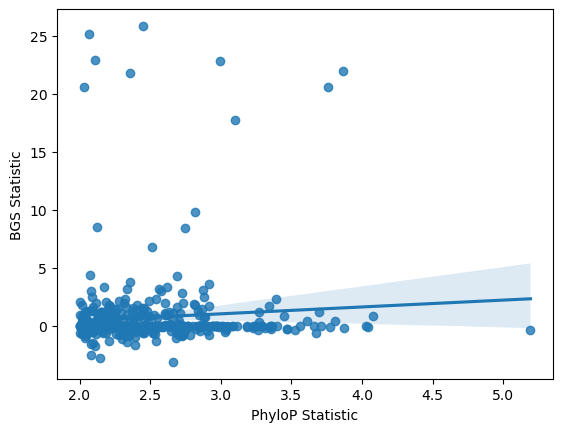

In [14]:
from scipy.stats import spearmanr
vvv = vvv[vvv["PhyloP Statistic"] > 2]
print(spearmanr(vvv["BGS Statistic"], vvv["PhyloP Statistic"]))
sns.regplot(x = vvv["PhyloP Statistic"], y = vvv["BGS Statistic"])

In [22]:
v

Window 1 Statistic 1  Median fixed BGS Score 1  \
0         chr1:2200000-3200000   BGS_Score                     932.0   
1         chr1:2300000-3300000   BGS_Score                     952.0   
2         chr1:2400000-3400000   BGS_Score                     954.0   
3         chr1:2500000-3500000   BGS_Score                     954.0   
4         chr1:2600000-3600000   BGS_Score                     956.0   
...                        ...         ...                       ...   
24520  chr22:47600000-48600000   BGS_Score                     980.0   
24521  chr22:48100000-49100000   BGS_Score                     987.0   
24522  chr22:48200000-49200000   BGS_Score                     987.0   
24523  chr22:48300000-49300000   BGS_Score                     985.0   
24524  chr22:48400000-49400000   BGS_Score                     985.0   

       Number fixed variants 1  Median polymorphic BGS Score 1  \
0                           91                           946.0   
1                           97                           952.0   
2                          113                           954.0   
3                          119                           954.0   
4                          138                           954.0   
...                        ...                             ...   
24520                      128                           980.0   
24521                       87                           987.0   
24522                       92                           987.0   
24523                       83                           986.5   
24524                       80                           987.0   

       Number polymorphic variants 1  Fisher exact signed p-value 1   alpha 1  \
0                                 39                       0.800625 -0.137368   
1                                 50                       0.787940  0.069094   
2                                 62                       0.032565  0.272175   
3                                 60                       0.048384  0.230584   
4                                 63                       0.031307  0.341155   
...                              ...                            ...       ...   
24520                             30                       0.254504  0.293320   
24521                             31                       0.509403  0.131141   
24522                             32                       0.245348  0.279857   
24523                             34                       0.254068  0.267739   
24524                             35                       0.474241  0.103002   

       Number of crosses 1             Crosses 1                    Tag 1  \
0               945.978357                 [500]  dc > 0.1, likely stable   
1               951.990381            [381, 500]  dc > 0.1, likely stable   
2               974.889780  [374, 402, 454, 500]  dc > 0.1, likely stable   
3               975.753908  [374, 404, 450, 500]  dc > 0.1, likely stable   
4               971.865331  [360, 395, 453, 500]  dc > 0.1, likely stable   
...                    ...                   ...                      ...   
24520           989.916633            [369, 500]  dc > 0.1, likely stable   
24521           987.991984       [317, 433, 500]  dc > 0.1, likely stable   
24522           989.944689       [341, 448, 500]  dc > 0.1, likely stable   
24523           992.222846       [369, 455, 500]  dc > 0.1, likely stable   
24524           992.143086       [390, 482, 500]  dc > 0.1, likely stable   

      [[dc, pc], [du, pu]] 1  
0       [[41, 50], [20, 19]]  
1       [[51, 46], [29, 21]]  
2        [[17, 96], [3, 59]]  
3       [[17, 102], [3, 57]]  
4       [[32, 106], [7, 56]]  
...                      ...  
24520   [[17, 111], [2, 28]]  
24521   [[41, 46], [14, 17]]  
24522    [[28, 64], [7, 25]]  
24523    [[13, 70], [3, 31]]  
24524     [[9, 71], [3, 32]]  

[24525 rows x 12 columns]

In [5]:
v = pd.read_csv("Windows_25KB_NoBGS_PC-1_SpecSup0_DlFetalLeydigMale_MAF0.25.txt", sep = "\t")
v = v[v["Proportion"] == 0.9]
v.sort_values("alpha").tail(50)

Window  Statistic  Median fixed PhyloP4474  \
457394   chr22:24500000-24550000  abs logfc                 0.021365   
123644    chr4:63950000-64000000  abs logfc                 0.026123   
68634   chr2:185550000-185600000  abs logfc                 0.026684   
360319   chr13:93850000-93900000  abs logfc                 0.026054   
442849   chr20:19525000-19575000  abs logfc                 0.025056   
172079  chr5:153050000-153100000  abs logfc                 0.026845   
211094    chr7:23325000-23375000  abs logfc                 0.028258   
276374  chr9:129425000-129475000  abs logfc                 0.029615   
124469    chr4:68600000-68650000  abs logfc                 0.044734   
399829   chr16:62875000-62925000  abs logfc                 0.029295   
371484   chr14:60975000-61025000  abs logfc                 0.027946   
91399     chr3:75225000-75275000  abs logfc                 0.025794   
123639    chr4:63925000-63975000  abs logfc                 0.027514   
349389   chr13:32525000-32575000  abs logfc                 0.019952   
333744   chr12:57525000-57575000  abs logfc                 0.020822   
431259     chr19:7075000-7125000  abs logfc                 0.024882   
289579   chr10:68675000-68725000  abs logfc                 0.022426   
459939   chr22:40300000-40350000  abs logfc                 0.026086   
475164  chrX:111950000-112000000  abs logfc                 0.032455   
14924     chr1:91975000-92025000  abs logfc                 0.019415   
396864   chr16:28275000-28325000  abs logfc                 0.021286   
269179    chr9:88475000-88525000  abs logfc                 0.022272   
215059    chr7:45025000-45075000  abs logfc                 0.022755   
229409  chr7:135175000-135225000  abs logfc                 0.028555   
177019  chr5:180700000-180750000  abs logfc                 0.028196   
94119     chr3:93800000-93850000  abs logfc                 0.024687   
408799   chr17:29950000-30000000  abs logfc                 0.020472   
462189      chrX:5050000-5100000  abs logfc                 0.029812   
453174   chr21:29900000-29950000  abs logfc                 0.033297   
458554   chr22:31625000-31675000  abs logfc                 0.022361   
173134  chr5:159150000-159200000  abs logfc                 0.026594   
64249   chr2:160225000-160275000  abs logfc                 0.026082   
19809   chr1:143625000-143675000  abs logfc                 0.024158   
176234  chr5:176075000-176125000  abs logfc                 0.030157   
359854   chr13:91500000-91550000  abs logfc                 0.022783   
397019   chr16:29675000-29725000  abs logfc                 0.019119   
141949  chr4:167925000-167975000  abs logfc                 0.029175   
176269  chr5:176300000-176350000  abs logfc                 0.017920   
386409   chr15:67850000-67900000  abs logfc                 0.017810   
325759     chr12:8450000-8500000  abs logfc                 0.020969   
465839    chrX:30050000-30100000  abs logfc                 0.022141   
473629    chrX:97000000-97050000  abs logfc                 0.028239   
28374   chr1:195800000-195850000  abs logfc                 0.020618   
77829   chr2:239625000-239675000  abs logfc                 0.026126   
217834    chr7:65975000-66025000  abs logfc                 0.014776   
270379    chr9:95125000-95175000  abs logfc                 0.032811   
87244     chr3:53150000-53200000  abs logfc                 0.021127   
12609     chr1:79325000-79375000  abs logfc                 0.031622   
265324    chr9:41275000-41325000  abs logfc                 0.066980   
152709    chr5:37125000-37175000  abs logfc                 0.021203   

        Number fixed variants  Median polymorphic PhyloP447  \
457394                    120                      0.021878   
123644                    209                      0.015401   
68634                     132                      0.011234   
360319                    258                      0.017668   
442849                    244         

In [18]:
chrom = "chr10"
v = vvv[vvv["Chrom"].isin([chrom])]
np.median(v["alpha"])

0.1179673321234119

(-1.0, 1.0)

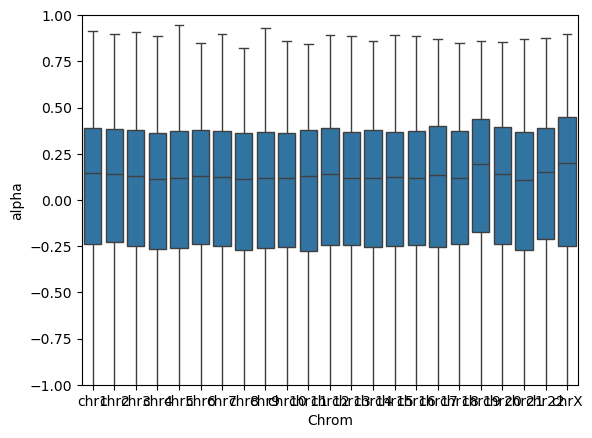

In [20]:
sns.boxplot(vvv, x = "Chrom", y= "alpha")
plt.ylim(-1, 1)

In [24]:
v = vvv[vvv["Chrom"].isin([chrom])]
v.iloc[list(range(0, v.shape[0], 2))]

Window  Statistic  \
Window                                                          
chrX:2750000-2800000          chrX:2750000-2800000  abs logfc   
chrX:2800000-2850000          chrX:2800000-2850000  abs logfc   
chrX:2850000-2900000          chrX:2850000-2900000  abs logfc   
chrX:2900000-2950000          chrX:2900000-2950000  abs logfc   
chrX:2950000-3000000          chrX:2950000-3000000  abs logfc   
...                                            ...        ...   
chrX:154100000-154150000  chrX:154100000-154150000  abs logfc   
chrX:154300000-154350000  chrX:154300000-154350000  abs logfc   
chrX:154350000-154400000  chrX:154350000-154400000  abs logfc   
chrX:155000000-155050000  chrX:155000000-155050000  abs logfc   
chrX:155175000-155225000  chrX:155175000-155225000  abs logfc   

                          Median fixed PhyloP4474  Number fixed variants  \
Window                                                                     
chrX:2750000-2800000                     0.025374                     67   
chrX:2800000-2850000                     0.029102                    108   
chrX:2850000-2900000                     0.027625                    172   
chrX:2900000-2950000                     0.021678                    122   
chrX:2950000-3000000                     0.027614                     97   
...                                           ...                    ...   
chrX:154100000-154150000                 0.031682                    108   
chrX:154300000-154350000                 0.024943                    138   
chrX:154350000-154400000                 0.020231                    103   
chrX:155000000-155050000                 0.020981                    138   
chrX:155175000-155225000                 0.020160                    107   

                          Median polymorphic PhyloP447  \
Window                                                   
chrX:2750000-2800000                          0.021803   
chrX:2800000-2850000                          0.017171   
chrX:2850000-2900000                          0.017645   
chrX:2900000-2950000                          0.017149   
chrX:2950000-3000000                          0.022392   
...                                                ...   
chrX:154100000-154150000                      0.019954   
chrX:154300000-154350000                      0.020158   
chrX:154350000-154400000                      0.035257   
chrX:155000000-155050000                      0.022634   
chrX:155175000-155225000                      0.015984   

                          Number polymorphic variants  Fisher exact p-value  \
Window                                                                        
chrX:2750000-2800000                              104              0.233736   
chrX:2800000-2850000                               58              0.455512   
chrX:2850000-2900000                               53              0.779575   
chrX:2900000-2950000                               48              0.781447   
chrX:2950000-3000000                               49              0.732543   
...                                               ...                   ...   
chrX:154100000-154150000                           23              0.364320   
chrX:154300000-154350000                           38              0.068052   
chrX:154350000-154400000                           23              0.085499   
chrX:155000000-155050000                           23              0.320113   
chrX:155175000-155225000                           25              0.243825   

                          MWU p-value     alpha    Cutoff  \
Window                                                      
chrX:2750000-2800000         0.223327  0.458414  0.080513   
chrX:2800000-2850000         0.010589  0.366577  0.092277   
chrX:2850000-2900000         0.019024 -0.175595  0.122812   
chrX:2900000-2950000         0.205493  0.237762  0.116747   
chrX:2950000-3000000         0.295028 -0.348148  0.124215   

In [42]:

np.median(x["alpha"])

0.0382133995037219

In [44]:
def parse_table(i):
    new = [int(x) for x in i.replace("[", "").replace("]", "").split(",")]
    return [[new[0], new[1]], [new[2], new[3]]]

dn = []
ds = []
pn = []
ps = []
for index, row in v.iterrows():
    table = parse_table(row["[[dc, du], [pc, pu]]"])
    print(table)
    break

[[11, 56], [10, 94]]


In [110]:
v

Window  Statistic  \
Window                                                        
chr19:250000-300000          chr19:250000-300000  abs logfc   
chr19:275000-325000          chr19:275000-325000  abs logfc   
chr19:300000-350000          chr19:300000-350000  abs logfc   
chr19:325000-375000          chr19:325000-375000  abs logfc   
chr19:350000-400000          chr19:350000-400000  abs logfc   
...                                          ...        ...   
chr19:58450000-58500000  chr19:58450000-58500000  abs logfc   
chr19:58475000-58525000  chr19:58475000-58525000  abs logfc   
chr19:58500000-58550000  chr19:58500000-58550000  abs logfc   
chr19:58525000-58575000  chr19:58525000-58575000  abs logfc   
chr19:58550000-58600000  chr19:58550000-58600000  abs logfc   

                         Median fixed PhyloP4474  Number fixed variants  \
Window                                                                    
chr19:250000-300000                     0.022956                    160   
chr19:275000-325000                     0.024118                    194   
chr19:300000-350000                     0.023227                    170   
chr19:325000-375000                     0.022072                    145   
chr19:350000-400000                     0.019765                     55   
...                                          ...                    ...   
chr19:58450000-58500000                 0.018148                    156   
chr19:58475000-58525000                 0.018308                    169   
chr19:58500000-58550000                 0.014893                    145   
chr19:58525000-58575000                 0.017011                    136   
chr19:58550000-58600000                 0.020728                    128   

                         Median polymorphic PhyloP447  \
Window                                                  
chr19:250000-300000                          0.031384   
chr19:275000-325000                          0.032672   
chr19:300000-350000                          0.028812   
chr19:325000-375000                          0.023272   
chr19:350000-400000                          0.028348   
...                                               ...   
chr19:58450000-58500000                      0.019173   
chr19:58475000-58525000                      0.013433   
chr19:58500000-58550000                      0.011545   
chr19:58525000-58575000                      0.014138   
chr19:58550000-58600000                      0.021713   

                         Number polymorphic variants  Fisher exact p-value  \
Window                                                                       
chr19:250000-300000                               33              0.771196   
chr19:275000-325000                               69              0.817101   
chr19:300000-350000                               87              0.816072   
chr19:325000-375000                               75              0.596392   
chr19:350000-400000                               28              1.000000   
...                                              ...                   ...   
chr19:58450000-58500000                           26              0.537988   
chr19:58475000-58525000                           27              0.178048   
chr19:58500000-58550000                           24              0.255451   
chr19:58525000-58575000                           30              1.000000   
chr19:58550000-58600000                           39              0.719842   

                         MWU p-value     alpha    Cutoff  \
Window                                                     
chr19:250000-300000         0.062802  0.300000  0.106886   
chr19:275000-325000         0.035830  0.171429  0.106886   
chr19:300000-350000         0.222075 -0.128391  0.110395   
chr19:325000-375000         0.193588 -0.389706  0.121388   
chr19:350000-400000         0.023357 -0.333333  0.115693   
...                              ...       ...       ...   
chr19:584

In [145]:
v.sort_values("alpha")

Window  Statistic  \
Window                                                        
chr19:41650000-41700000  chr19:41650000-41700000  abs logfc   
chr19:28100000-28150000  chr19:28100000-28150000  abs logfc   
chr19:13275000-13325000  chr19:13275000-13325000  abs logfc   
chr19:17675000-17725000  chr19:17675000-17725000  abs logfc   
chr19:23675000-23725000  chr19:23675000-23725000  abs logfc   
...                                          ...        ...   
chr19:12350000-12400000  chr19:12350000-12400000  abs logfc   
chr19:12825000-12875000  chr19:12825000-12875000  abs logfc   
chr19:22275000-22325000  chr19:22275000-22325000  abs logfc   
chr19:31850000-31900000  chr19:31850000-31900000  abs logfc   
chr19:35900000-35950000  chr19:35900000-35950000  abs logfc   

                         Median fixed PhyloP4474  Number fixed variants  \
Window                                                                    
chr19:41650000-41700000                 0.014509                     71   
chr19:28100000-28150000                 0.027492                    187   
chr19:13275000-13325000                 0.017122                    177   
chr19:17675000-17725000                 0.013827                     44   
chr19:23675000-23725000                 0.021588                     87   
...                                          ...                    ...   
chr19:12350000-12400000                 0.019878                    182   
chr19:12825000-12875000                 0.019144                    137   
chr19:22275000-22325000                 0.020565                     43   
chr19:31850000-31900000                 0.029154                    224   
chr19:35900000-35950000                 0.018546                     90   

                         Median polymorphic PhyloP447  \
Window                                                  
chr19:41650000-41700000                      0.019453   
chr19:28100000-28150000                      0.028426   
chr19:13275000-13325000                      0.024788   
chr19:17675000-17725000                      0.013951   
chr19:23675000-23725000                      0.029114   
...                                               ...   
chr19:12350000-12400000                      0.022428   
chr19:12825000-12875000                      0.020785   
chr19:22275000-22325000                      0.021683   
chr19:31850000-31900000                      0.031040   
chr19:35900000-35950000                      0.021754   

                         Number polymorphic variants  Fisher exact p-value  \
Window                                                                       
chr19:41650000-41700000                           69              0.060805   
chr19:28100000-28150000                           67              0.011745   
chr19:13275000-13325000                           89              0.007826   
chr19:17675000-17725000                           20              0.312500   
chr19:23675000-23725000                           22              0.180734   
...                                              ...                   ...   
chr19:12350000-12400000                           37              0.044421   
chr19:12825000-12875000                           43              0.020524   
chr19:22275000-22325000                           29              0.180602   
chr19:31850000-31900000                           21              0.115361   
chr19:35900000-35950000                           30              0.021743   

                         MWU p-value     alpha    Cutoff  \
Window                                                     
chr19:41650000-41700000     0.086452 -5.666667  0.130465   
chr19:28100000-28150000     0.090255 -5.032787  0.162439   
chr19:13275000-13325000     0.140220 -4.728395  0.142639   
chr19:17675000-17725000     0.236698 -3.500000  0.192662   
chr19:23675000-23725000     0.112812 -3.250000  0.135984   
...                              ...       ...       ...   
chr19:123

In [18]:
vvv

Gene  Median Fixed PhyloP  Number Fixed Variants  \
0          ADSL             0.022872                    543   
2          PEX2             0.024227                   4095   
24        THOC2             0.022590                    778   
28        PRDM2             0.024913                   2081   
29        SPRY1             0.024820                   2983   
...         ...                  ...                    ...   
47386    SERAC1             0.022654                    276   
47390  TRAPPC10             0.026682                    465   
47394     LTBP4             0.019408                    181   
47395     CNTN2             0.022742                    444   
47404      ZZZ3             0.022518                    922   

       Median Polymorphic PhyloP  Number Polymorphic Variants  \
0                       0.018723                          112   
2                       0.025307                          838   
24                      0.019901                          152   
28                      0.022467                          482   
29                      0.023402                          734   
...                          ...                          ...   
47386                   0.026930                          125   
47390                   0.021952                          119   
47394                   0.015113                           53   
47395                   0.028400                          192   
47404                   0.022244                          144   

       Fisher exact p-value  MWU p-value     alpha    Cutoff  \
0              1.777631e-07     0.002351  0.776671  0.040962   
2              1.214369e-05     0.088237 -0.838892  0.141990   
24             3.658262e-04     0.084022  0.611346  0.059893   
28             4.976509e-04     0.037100  0.421507  0.078331   
29             5.250983e-04     0.053838  0.363412  0.084652   
...                     ...          ...       ...       ...   
47386          1.000000e+00     0.453139 -0.021103  0.124572   
47390          1.000000e+00     0.584969  0.049383  0.113159   
47394          1.000000e+00     0.332540 -0.004902  0.110947   
47395          1.000000e+00     0.318395  0.026204  0.102211   
47404          1.000000e+00     0.643013  0.016568  0.091508   

           [[dc, du], [pc, pu]]  Proportion  
0       [[178, 365], [11, 101]]         0.9  
2      [[231, 3864], [83, 755]]         0.9  
24      [[171, 607], [15, 137]]         0.9  
28     [[334, 1747], [48, 434]]         0.9  
29     [[441, 2542], [73, 661]]         0.9  
...                         ...         ...  
47386    [[26, 250], [12, 113]]         0.9  
47390    [[45, 420], [11, 108]]         0.9  
47394      [[17, 164], [5, 48]]         0.9  
47395    [[45, 399], [19, 173]]         0.9  
47404    [[91, 831], [14, 130]]         0.9  

[9481 rows x 11 columns]

In [25]:

#v = vvv[vvv["Chrom"] == "chr19"]
#v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
#v = v.sort_values("Loc")
#v = v.iloc[list(range(0, v.shape[0], 2))]
for cutoff in [0.5, 0.6, 0.7, 0.8, 0.9]:
    vvv = pd.read_csv("Windows_50KB_NoBGS_PC-1_SpecSup0_DlFetalLeydigMale_MAF0.25_Permute.txt", sep = "\t")
    vvv = vvv[vvv["Proportion"] == cutoff]
    def parse_table(i):
        new = [int(x) for x in i.replace("[", "").replace("]", "").split(",")]
        return [[new[0], new[1]], [new[2], new[3]]]

    dn1 = []
    ds1 = []
    p1 = []
    pn1 = []
    ps1 = []
    dn2 = []
    ds2 = []
    p2 = []
    pn2 = []
    ps2 = []
    for index, row in vvv.iterrows():
        table = parse_table(row["[[dc1, du1], [pc1, pu1]]"])
        dn1.append(table[0][0])
        ds1.append(table[0][1])
        p1.append(table[1][0]/(table[1][1]))
        pn1.append(table[1][0])
        ps1.append(table[1][1])
        table = parse_table(row["[[dc2, du2], [pc2, pu2]]"])
        dn2.append(table[0][0])
        ds2.append(table[0][1])
        p2.append(table[1][0]/(table[1][1]))
        pn2.append(table[1][0])
        ps2.append(table[1][1])
    alpha1 = 1-((np.mean(ds1)/np.mean(dn1))*(np.mean(pn1)/np.mean(ps1)))
    alpha2 = 1-((np.mean(ds2)/np.mean(dn2))*(np.mean(pn2)/np.mean(ps2)))
    print(alpha1, alpha2, np.mean([alpha1, alpha2]), cutoff)

-0.006588526038665554 -0.006472692089928733 -0.006530609064297144 0.5
-0.004138805491035624 -0.0039288219362663135 -0.004033813713650969 0.6
-0.0004932299631201786 -0.00044183822421905994 -0.0004675340936696193 0.7
0.0018260054020423633 0.0019038311142790532 0.0018649182581607082 0.8
0.013183306942938677 0.01300141674350963 0.013092361843224154 0.9


In [26]:
print(np.sum(pn1)/np.sum(pn1 + ps1))
print(np.sum(pn2)/np.sum(pn2 + ps2))
print(np.sum(dn1)/np.sum(dn1 + ds1))
print(np.sum(dn2)/np.sum(dn2 + ds2))

0.1028453059575363
0.10675054270948703
0.10407626440569269
0.10800485804100321


In [24]:

#v = vvv[vvv["Chrom"] == "chr19"]
#v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
#v = v.sort_values("Loc")
#v = v.iloc[list(range(0, v.shape[0], 2))]
for cutoff in [0.5, 0.6, 0.7, 0.8, 0.9]:
    vvv = pd.read_csv("Windows_50KB_NoBGS_PC-1_SpecSup0_DlFetalLeydigMale_MAF0.25.txt", sep = "\t")
    vvv = vvv[vvv["Proportion"] == cutoff]
    def parse_table(i):
        new = [int(x) for x in i.replace("[", "").replace("]", "").split(",")]
        return [[new[0], new[1]], [new[2], new[3]]]

    dn1 = []
    ds1 = []
    p1 = []
    pn1 = []
    ps1 = []
    dn2 = []
    ds2 = []
    p2 = []
    pn2 = []
    ps2 = []
    for index, row in vvv.iterrows():
        table = parse_table(row["[[dc1, du1], [pc1, pu1]]"])
        dn1.append(table[0][0])
        ds1.append(table[0][1])
        p1.append(table[1][0]/(table[1][1]))
        pn1.append(table[1][0])
        ps1.append(table[1][1])
        table = parse_table(row["[[dc2, du2], [pc2, pu2]]"])
        dn2.append(table[0][0])
        ds2.append(table[0][1])
        p2.append(table[1][0]/(table[1][1]))
        pn2.append(table[1][0])
        ps2.append(table[1][1])
    alpha1 = 1-((np.mean(ds1)/np.mean(dn1))*(np.mean(pn1)/np.mean(ps1)))
    alpha2 = 1-((np.mean(ds2)/np.mean(dn2))*(np.mean(pn2)/np.mean(ps2)))
    print(alpha1, alpha2, np.mean([alpha1, alpha2]), cutoff)

0.021000559399122154 -0.04401277206549992 -0.011506106333188881 0.5
0.03266723779933056 -0.03443589988646423 -0.0008843310435668328 0.6
0.05093665771323008 -0.024676375268447792 0.013130141222391145 0.7
0.08227580030911663 -0.015369208270571422 0.033453296019272605 0.8
0.1695908888862533 0.005682756447765391 0.08763682266700934 0.9


In [22]:
print(np.sum(pn1)/np.sum(pn1 + ps1))
print(np.sum(pn2)/np.sum(pn2 + ps2))

0.09899520442121611
0.10081517456080119


In [23]:
print(np.sum(dn1)/np.sum(dn1 + ds1))
print(np.sum(dn2)/np.sum(dn2 + ds2))

0.10152905841931925
0.10152920379609782


In [4]:
np.median(v["Median fixed PhyloP4474"]) - np.median(v["Median polymorphic PhyloP447"])

0.0006251224999999985

In [177]:
from scipy.stats import ttest_rel
ttest_rel(v["Median fixed PhyloP4474"], v["Median polymorphic PhyloP447"])

TtestResult(statistic=2.042436397001282, pvalue=0.04140250235570349, df=890)

<Axes: xlabel='MWU p-value', ylabel='Count'>

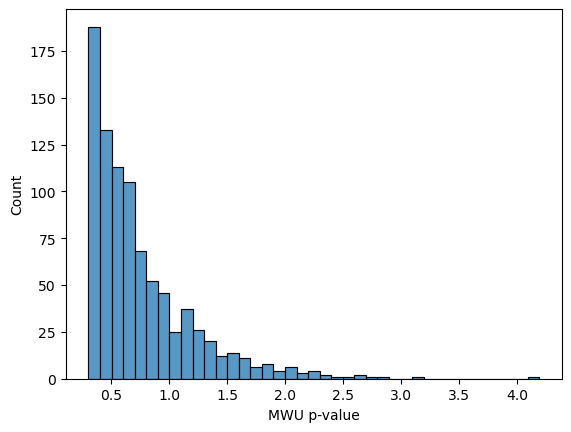

In [178]:
sns.histplot(-np.log10(v["MWU p-value"]))

In [143]:
vvv.sort_values("MWU p-value")

Window  Statistic  \
Window                                                          
chr11:60350000-60400000    chr11:60350000-60400000  abs logfc   
chr6:100200000-100250000  chr6:100200000-100250000  abs logfc   
chr5:124800000-124850000  chr5:124800000-124850000  abs logfc   
chr5:156025000-156075000  chr5:156025000-156075000  abs logfc   
chr1:37075000-37125000      chr1:37075000-37125000  abs logfc   
...                                            ...        ...   
chr8:79575000-79625000      chr8:79575000-79625000  abs logfc   
chr5:172950000-173000000  chr5:172950000-173000000  abs logfc   
chr1:84075000-84125000      chr1:84075000-84125000  abs logfc   
chr6:124300000-124350000  chr6:124300000-124350000  abs logfc   
chr8:26225000-26275000      chr8:26225000-26275000  abs logfc   

                          Median fixed PhyloP4474  Number fixed variants  \
Window                                                                     
chr11:60350000-60400000                  0.019360                    157   
chr6:100200000-100250000                 0.032786                    166   
chr5:124800000-124850000                 0.022211                    149   
chr5:156025000-156075000                 0.017087                     99   
chr1:37075000-37125000                   0.028649                    186   
...                                           ...                    ...   
chr8:79575000-79625000                   0.021028                    215   
chr5:172950000-173000000                 0.022630                    167   
chr1:84075000-84125000                   0.024586                    133   
chr6:124300000-124350000                 0.025289                    153   
chr8:26225000-26275000                   0.018457                    219   

                          Median polymorphic PhyloP447  \
Window                                                   
chr11:60350000-60400000                       0.048111   
chr6:100200000-100250000                      0.009752   
chr5:124800000-124850000                      0.043561   
chr5:156025000-156075000                      0.035160   
chr1:37075000-37125000                        0.014654   
...                                                ...   
chr8:79575000-79625000                        0.022199   
chr5:172950000-173000000                      0.034035   
chr1:84075000-84125000                        0.024453   
chr6:124300000-124350000                      0.024948   
chr8:26225000-26275000                        0.016588   

                          Number polymorphic variants  Fisher exact p-value  \
Window                                                                        
chr11:60350000-60400000                            57              0.005581   
chr6:100200000-100250000                           37              0.100226   
chr5:124800000-124850000                           38              0.099494   
chr5:156025000-156075000                           65              0.346762   
chr1:37075000-37125000                             85              0.000002   
...                                               ...                   ...   
chr8:79575000-79625000                             29              1.000000   
chr5:172950000-173000000                           27              0.264483   
chr1:84075000-84125000                             21              1.000000   
chr6:124300000-124350000                           57              0.534512   
chr8:26225000-26275000                            107              0.137571   

                          MWU p-value      alpha    Cutoff  \
Window                                                       
chr11:60350000-60400000      0.000005 -14.000000  0.206974   
chr6:100200000-100250000     0.000007   0.669748  0.078677   
chr5:124800000-124850000     0.000008  -3.171429  0.156485   
chr5:156025000-156075000     0.000011  -0.911864  0.132448   
chr1:37075000-37125000       0.000014   0.815468  0.04

In [136]:
v = v[v['Median fixed PhyloP4474'] < v["Median polymorphic PhyloP447"]]

In [141]:
mwu([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

MannwhitneyuResult(statistic=15.5, pvalue=0.7466248114708864)

<Axes: >

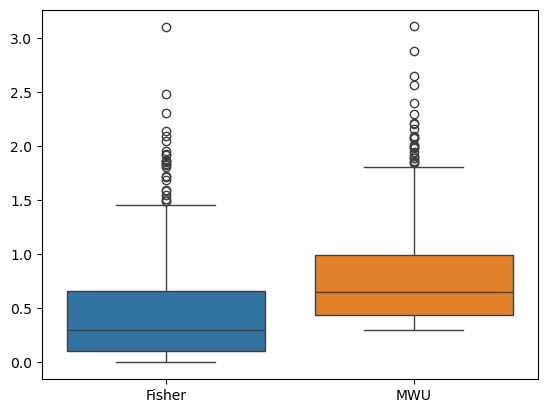

In [131]:
sns.boxplot({"Fisher":-np.log10(v["Fisher exact p-value"]), "MWU":-np.log10(v["MWU p-value"])})

In [133]:
from scipy.stats import combine_pvalues
combine_pvalues(v["MWU p-value"])

SignificanceResult(statistic=1768.0068416264924, pvalue=1.730205132281345e-49)

In [179]:
1-((np.mean(ds)/np.mean(dn))*np.mean(p))

0.11205478040561223

0.10033318524864676

In [181]:
1-((np.sum(ds)/np.sum(dn))*(np.sum(pn)/np.sum(ps)))

0.10033318524864676

In [99]:
for index, row in vvv.iterrows():
    table = parse_table(row["[[dc, du], [pc, pu]]"])
    print(table[1][0]/table[1][1])

0.09090909090909091
0.07692307692307693
0.09523809523809523
0.07407407407407407
0.10526315789473684
0.10256410256410256
0.10714285714285714
0.07142857142857142
0.08695652173913043
0.10810810810810811
0.10526315789473684
0.07142857142857142
0.07407407407407407
0.07142857142857142
0.1
0.05263157894736842
0.10869565217391304
0.0967741935483871
0.1
0.1
0.09803921568627451
0.10526315789473684
0.08571428571428572
0.07407407407407407
0.07692307692307693
0.07692307692307693
0.07692307692307693
0.10714285714285714
0.09090909090909091
0.1092436974789916
0.10752688172043011
0.08333333333333333
0.1
0.10666666666666667
0.09375
0.09803921568627451
0.09090909090909091
0.09090909090909091
0.08571428571428572
0.09433962264150944
0.08695652173913043
0.07142857142857142
0.08333333333333333
0.10416666666666667
0.09090909090909091
0.0967741935483871
0.07142857142857142
0.09259259259259259
0.09859154929577464
0.0975609756097561
0.10256410256410256
0.1095890410958904
0.1044776119402985
0.07142857142857142
0.

0.10810810810810811
0.09433962264150944
0.08888888888888889
0.10714285714285714
0.09090909090909091
0.10256410256410256
0.09615384615384616
0.09433962264150944
0.10638297872340426
0.1
0.10714285714285714
0.08695652173913043
0.07142857142857142
0.09375
0.10344827586206896
0.07692307692307693
0.08333333333333333
0.09615384615384616
0.10869565217391304
0.10256410256410256
0.10810810810810811
0.09259259259259259
0.09836065573770492
0.10344827586206896
0.09090909090909091
0.09302325581395349
0.09302325581395349
0.09090909090909091
0.1
0.10526315789473684
0.10416666666666667
0.09090909090909091
0.08571428571428572
0.08888888888888889
0.09836065573770492
0.09876543209876543
0.10588235294117647
0.0958904109589041
0.09433962264150944
0.10869565217391304
0.10344827586206896
0.09090909090909091
0.10465116279069768
0.10294117647058823
0.1
0.10714285714285714
0.10256410256410256
0.09523809523809523
0.10526315789473684
0.05263157894736842
0.10526315789473684
0.0967741935483871
0.08823529411764706
0.

0.08823529411764706
0.09433962264150944
0.10204081632653061
0.08823529411764706
0.09523809523809523
0.10638297872340426
0.0975609756097561
0.09090909090909091
0.07142857142857142
0.10204081632653061
0.10752688172043011
0.09302325581395349
0.08333333333333333
0.05263157894736842
0.09523809523809523
0.10833333333333334
0.10655737704918032
0.09523809523809523
0.1076923076923077
0.10638297872340426
0.0989010989010989
0.10576923076923077
0.1
0.09259259259259259
0.10416666666666667
0.10256410256410256
0.10714285714285714
0.09375
0.10144927536231885
0.1016949152542373
0.09259259259259259
0.05263157894736842
0.08695652173913043
0.05263157894736842
0.08695652173913043
0.10714285714285714
0.0975609756097561
0.09302325581395349
0.08333333333333333
0.10810810810810811
0.10344827586206896
0.10714285714285714
0.09090909090909091
0.10112359550561797
0.10679611650485436
0.09722222222222222
0.09302325581395349
0.07407407407407407
0.10810810810810811
0.08823529411764706
0.07142857142857142
0.09803921568

0.08695652173913043
0.09836065573770492
0.10112359550561797
0.10909090909090909
0.08108108108108109
0.09433962264150944
0.10714285714285714
0.09523809523809523
0.10144927536231885
0.10869565217391304
0.07142857142857142
0.10344827586206896
0.09375
0.08888888888888889
0.10869565217391304
0.10526315789473684
0.0967741935483871
0.10526315789473684
0.09803921568627451
0.10294117647058823
0.09876543209876543
0.1048951048951049
0.1016949152542373
0.1
0.09433962264150944
0.08888888888888889
0.10344827586206896
0.1
0.08
0.10526315789473684
0.08823529411764706
0.10810810810810811
0.1
0.09375
0.10526315789473684
0.09523809523809523
0.1
0.10714285714285714
0.09836065573770492
0.0975609756097561
0.1095890410958904
0.1
0.109375
0.1016949152542373
0.10714285714285714
0.1
0.1
0.10810810810810811
0.10465116279069768
0.10638297872340426
0.10112359550561797
0.10144927536231885
0.09523809523809523
0.1
0.07692307692307693
0.09803921568627451
0.10101010101010101
0.1092436974789916
0.10778443113772455
0.108

0.09090909090909091
0.09090909090909091
0.08571428571428572
0.07142857142857142
0.09523809523809523
0.09090909090909091
0.08695652173913043
0.1
0.0958904109589041
0.1016949152542373
0.0975609756097561
0.08823529411764706
0.10526315789473684
0.09523809523809523
0.10810810810810811
0.08823529411764706
0.10294117647058823
0.10784313725490197
0.1
0.10344827586206896
0.09523809523809523
0.09433962264150944
0.1
0.1
0.10810810810810811
0.08333333333333333
0.08108108108108109
0.10714285714285714
0.10714285714285714
0.0967741935483871
0.10714285714285714
0.10526315789473684
0.10526315789473684
0.1038961038961039
0.10588235294117647
0.10416666666666667
0.1
0.10256410256410256
0.08695652173913043
0.10204081632653061
0.10204081632653061
0.1038961038961039
0.10294117647058823
0.10526315789473684
0.1
0.08823529411764706
0.10526315789473684
0.08571428571428572
0.0975609756097561
0.10714285714285714
0.09090909090909091
0.10714285714285714
0.10714285714285714
0.08333333333333333
0.08571428571428572
0.1

0.09859154929577464
0.10638297872340426
0.1044776119402985
0.10344827586206896
0.10126582278481013
0.1
0.10638297872340426
0.09859154929577464
0.10869565217391304
0.10989010989010989
0.1095890410958904
0.10126582278481013
0.1
0.08333333333333333
0.1
0.10909090909090909
0.1076923076923077
0.1076923076923077
0.1
0.10810810810810811
0.08
0.09523809523809523
0.09090909090909091
0.07407407407407407
0.08571428571428572
0.10204081632653061
0.10909090909090909
0.09523809523809523
0.08888888888888889
0.10416666666666667
0.10810810810810811
0.1076923076923077
0.10227272727272728
0.10344827586206896
0.0967741935483871
0.09375
0.09523809523809523
0.08333333333333333
0.08823529411764706
0.09259259259259259
0.08108108108108109
0.09375
0.08108108108108109
0.10714285714285714
0.09523809523809523
0.10526315789473684
0.08823529411764706
0.10256410256410256
0.09090909090909091
0.09615384615384616
0.10416666666666667
0.05263157894736842
0.0967741935483871
0.08333333333333333
0.10714285714285714
0.08695652

0.10126582278481013
0.10204081632653061
0.09722222222222222
0.0989010989010989
0.10112359550561797
0.10126582278481013
0.08888888888888889
0.10256410256410256
0.1044776119402985
0.09836065573770492
0.09803921568627451
0.09876543209876543
0.09375
0.10526315789473684
0.08333333333333333
0.09259259259259259
0.1
0.10204081632653061
0.10204081632653061
0.10714285714285714
0.10204081632653061
0.0989010989010989
0.10919540229885058
0.10559006211180125
0.10256410256410256
0.10679611650485436
0.10309278350515463
0.10112359550561797
0.09876543209876543
0.10144927536231885
0.09876543209876543
0.10810810810810811
0.10588235294117647
0.10714285714285714
0.08695652173913043
0.10638297872340426
0.0967741935483871
0.10909090909090909
0.09090909090909091
0.08695652173913043
0.10909090909090909
0.10526315789473684
0.10638297872340426
0.09836065573770492
0.09433962264150944
0.1
0.10666666666666667
0.10714285714285714
0.10416666666666667
0.10606060606060606
0.10526315789473684
0.10204081632653061
0.105263

0.08
0.10344827586206896
0.07692307692307693
0.08823529411764706
0.08695652173913043
0.09803921568627451
0.08888888888888889
0.07142857142857142
0.07142857142857142
0.07692307692307693
0.10091743119266056
0.10743801652892562
0.10810810810810811
0.07407407407407407
0.10526315789473684
0.10526315789473684
0.10416666666666667
0.10810810810810811
0.09523809523809523
0.10909090909090909
0.10909090909090909
0.10714285714285714
0.10204081632653061
0.10810810810810811
0.10638297872340426
0.10909090909090909
0.1044776119402985
0.0989010989010989
0.1
0.1038961038961039
0.10638297872340426
0.1095890410958904
0.1016949152542373
0.10810810810810811
0.09523809523809523
0.08823529411764706
0.0967741935483871
0.1
0.08823529411764706
0.08695652173913043
0.09375
0.09722222222222222
0.09615384615384616
0.07407407407407407
0.10714285714285714
0.07407407407407407
0.08695652173913043
0.10344827586206896
0.09090909090909091
0.09523809523809523
0.09090909090909091
0.10526315789473684
0.08571428571428572
0.107

0.10752688172043011
0.10344827586206896
0.09375
0.10526315789473684
0.10526315789473684
0.08333333333333333
0.09259259259259259
0.10126582278481013
0.09259259259259259
0.09859154929577464
0.10714285714285714
0.10526315789473684
0.09523809523809523
0.10638297872340426
0.10144927536231885
0.10569105691056911
0.10948905109489052
0.10869565217391304
0.1044776119402985
0.09722222222222222
0.09433962264150944
0.109375
0.10526315789473684
0.10948905109489052
0.10714285714285714
0.10625
0.1099476439790576
0.1038961038961039
0.10714285714285714
0.0975609756097561
0.10112359550561797
0.10714285714285714
0.1103448275862069
0.10714285714285714
0.08333333333333333
0.08333333333333333
0.08695652173913043
0.07407407407407407
0.10638297872340426
0.10588235294117647
0.10679611650485436
0.10975609756097561
0.10112359550561797
0.1092436974789916
0.10483870967741936
0.10256410256410256
0.09876543209876543
0.10526315789473684
0.10869565217391304
0.10714285714285714
0.09523809523809523
0.09302325581395349
0

0.09803921568627451
0.09615384615384616
0.0975609756097561
0.10112359550561797
0.0958904109589041
0.10909090909090909
0.09259259259259259
0.09859154929577464
0.10526315789473684
0.07407407407407407
0.1
0.08333333333333333
0.10909090909090909
0.09722222222222222
0.1076923076923077
0.10869565217391304
0.10204081632653061
0.10526315789473684
0.10909090909090909
0.10144927536231885
0.09523809523809523
0.08333333333333333
0.08695652173913043
0.08695652173913043
0.0975609756097561
0.07407407407407407
0.09523809523809523
0.10810810810810811
0.09523809523809523
0.09259259259259259
0.0967741935483871
0.1016949152542373
0.10909090909090909
0.1
0.10638297872340426
0.1
0.09433962264150944
0.1
0.10126582278481013
0.08333333333333333
0.08333333333333333
0.1
0.10714285714285714
0.10294117647058823
0.10588235294117647
0.1
0.08108108108108109
0.10526315789473684
0.1
0.09836065573770492
0.09615384615384616
0.10344827586206896
0.09090909090909091
0.1
0.08108108108108109
0.10638297872340426
0.1
0.09615384

0.08695652173913043
0.07407407407407407
0.08888888888888889
0.10638297872340426
0.10526315789473684
0.1
0.08333333333333333
0.10526315789473684
0.10714285714285714
0.10810810810810811
0.09836065573770492
0.08333333333333333
0.08108108108108109
0.08333333333333333
0.09090909090909091
0.10144927536231885
0.10344827586206896
0.10743801652892562
0.10317460317460317
0.10714285714285714
0.0975609756097561
0.10734463276836158
0.10989010989010989
0.1095890410958904
0.08888888888888889
0.09375
0.08333333333333333
0.08333333333333333
0.08571428571428572
0.0958904109589041
0.0958904109589041
0.1
0.09615384615384616
0.1
0.11
0.11016949152542373
0.11
0.10784313725490197
0.10465116279069768
0.1
0.10294117647058823
0.1095890410958904
0.09375
0.10344827586206896
0.0975609756097561
0.09722222222222222
0.10434782608695652
0.10126582278481013
0.10714285714285714
0.1
0.10101010101010101
0.1076923076923077
0.10891089108910891
0.10843373493975904
0.1044776119402985
0.0967741935483871
0.09375
0.1084337349397

0.10256410256410256
0.10126582278481013
0.10588235294117647
0.10843373493975904
0.1016949152542373
0.09523809523809523
0.07142857142857142
0.10714285714285714
0.0967741935483871
0.10344827586206896
0.0967741935483871
0.1076923076923077
0.10638297872340426
0.0958904109589041
0.09090909090909091
0.10344827586206896
0.1
0.09259259259259259
0.1
0.07407407407407407
0.08333333333333333
0.09722222222222222
0.10144927536231885
0.10526315789473684
0.10714285714285714
0.09090909090909091
0.0958904109589041
0.102803738317757
0.10687022900763359
0.109375
0.11065573770491803
0.10822510822510822
0.10526315789473684
0.1044776119402985
0.10185185185185185
0.10909090909090909
0.109375
0.1095890410958904
0.1
0.10714285714285714
0.10975609756097561
0.10317460317460317
0.10714285714285714
0.1
0.09090909090909091
0.1016949152542373
0.0958904109589041
0.1016949152542373
0.08571428571428572
0.08
0.10204081632653061
0.10687022900763359
0.10810810810810811
0.10743801652892562
0.10679611650485436
0.097560975609

0.0967741935483871
0.10714285714285714
0.08571428571428572
0.10526315789473684
0.10344827586206896
0.1
0.08823529411764706
0.0967741935483871
0.08695652173913043
0.10714285714285714
0.10526315789473684
0.10810810810810811
0.07692307692307693
0.1
0.08
0.08108108108108109
0.09836065573770492
0.0958904109589041
0.10416666666666667
0.1
0.09433962264150944
0.10144927536231885
0.109375
0.10256410256410256
0.08333333333333333
0.05263157894736842
0.10714285714285714
0.08
0.08695652173913043
0.07407407407407407
0.08
0.08333333333333333
0.08333333333333333
0.08823529411764706
0.10526315789473684
0.09090909090909091
0.10256410256410256
0.10714285714285714
0.0967741935483871
0.09259259259259259
0.1
0.09090909090909091
0.09523809523809523
0.1
0.05263157894736842
0.10810810810810811
0.09523809523809523
0.10526315789473684
0.08333333333333333
0.10869565217391304
0.08
0.09090909090909091
0.09090909090909091
0.0967741935483871
0.09090909090909091
0.09259259259259259
0.09375
0.10294117647058823
0.095238

0.10576923076923077
0.10204081632653061
0.1
0.08571428571428572
0.10526315789473684
0.0975609756097561
0.08888888888888889
0.09523809523809523
0.1
0.10909090909090909
0.09259259259259259
0.0975609756097561
0.08695652173913043
0.1076923076923077
0.10975609756097561
0.1016949152542373
0.05263157894736842
0.09090909090909091
0.1
0.10909090909090909
0.0975609756097561
0.09803921568627451
0.10714285714285714
0.09090909090909091
0.08108108108108109
0.08
0.0975609756097561
0.10606060606060606
0.09375
0.10714285714285714
0.10204081632653061
0.09523809523809523
0.09615384615384616
0.1
0.10606060606060606
0.10714285714285714
0.10714285714285714
0.10204081632653061
0.09615384615384616
0.09523809523809523
0.1095890410958904
0.1
0.09615384615384616
0.09523809523809523
0.10144927536231885
0.09259259259259259
0.07407407407407407
0.07142857142857142
0.1038961038961039
0.10638297872340426
0.10666666666666667
0.1095890410958904
0.1
0.10227272727272728
0.1044776119402985
0.09722222222222222
0.10344827586

0.10227272727272728
0.1065989847715736
0.10638297872340426
0.09523809523809523
0.10526315789473684
0.09433962264150944
0.09302325581395349
0.08888888888888889
0.09615384615384616
0.09836065573770492
0.10144927536231885
0.10909090909090909
0.1
0.09090909090909091
0.08695652173913043
0.10227272727272728
0.10526315789473684
0.10457516339869281
0.10674157303370786
0.10559006211180125
0.10833333333333334
0.10810810810810811
0.08571428571428572
0.09090909090909091
0.0975609756097561
0.10695187165775401
0.1092896174863388
0.10714285714285714
0.10588235294117647
0.10204081632653061
0.1044776119402985
0.10638297872340426
0.10309278350515463
0.10476190476190476
0.10416666666666667
0.10852713178294573
0.11
0.10112359550561797
0.09090909090909091
0.08888888888888889
0.08108108108108109
0.09090909090909091
0.09523809523809523
0.09375
0.10344827586206896
0.09375
0.1
0.07142857142857142
0.09375
0.08333333333333333
0.08695652173913043
0.09523809523809523
0.10344827586206896
0.10204081632653061
0.08695

0.10465116279069768
0.10483870967741936
0.10526315789473684
0.10687022900763359
0.1079136690647482
0.10476190476190476
0.09523809523809523
0.09722222222222222
0.1
0.10869565217391304
0.09090909090909091
0.1
0.08695652173913043
0.1044776119402985
0.10588235294117647
0.1
0.09090909090909091
0.09523809523809523
0.1
0.10256410256410256
0.09523809523809523
0.10619469026548672
0.11
0.1076923076923077
0.08888888888888889
0.0967741935483871
0.10714285714285714
0.08108108108108109
0.09259259259259259
0.0967741935483871
0.10256410256410256
0.11
0.10843373493975904
0.09375
0.08888888888888889
0.09302325581395349
0.09859154929577464
0.0989010989010989
0.10588235294117647
0.1
0.08823529411764706
0.1
0.10869565217391304
0.109375
0.09803921568627451
0.08
0.1
0.1016949152542373
0.10126582278481013
0.10843373493975904
0.10576923076923077
0.10101010101010101
0.10144927536231885
0.10810810810810811
0.10743801652892562
0.1
0.10256410256410256
0.08108108108108109
0.1
0.10204081632653061
0.10752688172043011

0.10638297872340426
0.10526315789473684
0.10144927536231885
0.09615384615384616
0.10526315789473684
0.07407407407407407
0.10843373493975904
0.10457516339869281
0.10091743119266056
0.1
0.1
0.0975609756097561
0.09523809523809523
0.1
0.07142857142857142
0.10344827586206896
0.07692307692307693
0.0975609756097561
0.1
0.09090909090909091
0.10526315789473684
0.10204081632653061
0.1044776119402985
0.0975609756097561
0.10227272727272728
0.10465116279069768
0.1
0.10144927536231885
0.08333333333333333
0.0975609756097561
0.09836065573770492
0.09090909090909091
0.09523809523809523
0.08
0.07692307692307693
0.08333333333333333
0.08
0.09375
0.10714285714285714
0.1
0.1
0.1
0.11029411764705882
0.10989010989010989
0.10606060606060606
0.08
0.109375
0.10256410256410256
0.08
0.10526315789473684
0.08695652173913043
0.10714285714285714
0.1
0.09615384615384616
0.09523809523809523
0.09090909090909091
0.09090909090909091
0.1
0.08695652173913043
0.0975609756097561
0.09302325581395349
0.10526315789473684
0.1081081

0.08695652173913043
0.1038961038961039
0.1076923076923077
0.10526315789473684
0.10588235294117647
0.10869565217391304
0.10576923076923077
0.11
0.10869565217391304
0.1037037037037037
0.11016949152542373
0.10810810810810811
0.11023622047244094
0.10743801652892562
0.10614525139664804
0.10880829015544041
0.10852713178294573
0.10457516339869281
0.1092896174863388
0.10582010582010581
0.10810810810810811
0.10559006211180125
0.10596026490066225
0.109375
0.11016949152542373
0.10989010989010989
0.10897435897435898
0.10989010989010989
0.10919540229885058
0.10975609756097561
0.1
0.10256410256410256
0.10666666666666667
0.10309278350515463
0.10655737704918032
0.11029411764705882
0.11042944785276074
0.10810810810810811
0.10091743119266056
0.10975609756097561
0.10852713178294573
0.10699588477366255
0.10747663551401869
0.11016949152542373
0.10185185185185185
0.10576923076923077
0.10655737704918032
0.10655737704918032
0.10714285714285714
0.10416666666666667
0.10738255033557047
0.11038961038961038
0.1079

0.09090909090909091
0.09302325581395349
0.1
0.09375
0.09259259259259259
0.08571428571428572
0.10909090909090909
0.10227272727272728
0.0958904109589041
0.09836065573770492
0.10256410256410256
0.09836065573770492
0.09090909090909091
0.10810810810810811
0.10714285714285714
0.10344827586206896
0.0967741935483871
0.1
0.09803921568627451
0.10638297872340426
0.10309278350515463
0.10526315789473684
0.10294117647058823
0.10526315789473684
0.10606060606060606
0.09803921568627451
0.10638297872340426
0.1
0.10619469026548672
0.10416666666666667
0.10989010989010989
0.09375
0.08888888888888889
0.09090909090909091
0.0975609756097561
0.08571428571428572
0.09433962264150944
0.10606060606060606
0.0975609756097561
0.09375
0.09302325581395349
0.10526315789473684
0.10294117647058823
0.1016949152542373
0.08333333333333333
0.09523809523809523
0.09090909090909091
0.09375
0.10666666666666667
0.09859154929577464
0.09859154929577464
0.10588235294117647
0.1044776119402985
0.10810810810810811
0.09523809523809523
0.

0.09090909090909091
0.08571428571428572
0.1
0.09375
0.10526315789473684
0.10256410256410256
0.09302325581395349
0.09375
0.09090909090909091
0.09090909090909091
0.09090909090909091
0.10714285714285714
0.0967741935483871
0.10144927536231885
0.10588235294117647
0.10975609756097561
0.09803921568627451
0.09090909090909091
0.10638297872340426
0.08823529411764706
0.08333333333333333
0.08
0.10344827586206896
0.10714285714285714
0.09090909090909091
0.10344827586206896
0.0967741935483871
0.09523809523809523
0.10344827586206896
0.09523809523809523
0.09090909090909091
0.09090909090909091
0.08
0.09375
0.10416666666666667
0.09090909090909091
0.10714285714285714
0.09090909090909091
0.09090909090909091
0.10810810810810811
0.1
0.1
0.10344827586206896
0.10810810810810811
0.08823529411764706
0.09302325581395349
0.10526315789473684
0.10638297872340426
0.08823529411764706
0.08695652173913043
0.0967741935483871
0.0975609756097561
0.09375
0.0967741935483871
0.08571428571428572
0.09302325581395349
0.081081081

0.09859154929577464
0.08333333333333333
0.08571428571428572
0.10256410256410256
0.09302325581395349
0.08888888888888889
0.09615384615384616
0.09523809523809523
0.10256410256410256
0.0989010989010989
0.09523809523809523
0.08823529411764706
0.10869565217391304
0.10810810810810811
0.10256410256410256
0.10638297872340426
0.10465116279069768
0.09615384615384616
0.1044776119402985
0.09722222222222222
0.10714285714285714
0.1044776119402985
0.1095890410958904
0.09803921568627451
0.09803921568627451
0.0958904109589041
0.0967741935483871
0.08695652173913043
0.1
0.08695652173913043
0.10666666666666667
0.1038961038961039
0.09859154929577464
0.10112359550561797
0.10588235294117647
0.1
0.0967741935483871
0.09615384615384616
0.07407407407407407
0.10256410256410256
0.1076923076923077
0.10344827586206896
0.10344827586206896
0.10126582278481013
0.10588235294117647
0.0975609756097561
0.10256410256410256
0.10869565217391304
0.10714285714285714
0.0975609756097561
0.08108108108108109
0.10526315789473684
0.1

0.10344827586206896
0.10714285714285714
0.1
0.1
0.08571428571428572
0.08888888888888889
0.09090909090909091
0.08571428571428572
0.09433962264150944
0.10714285714285714
0.09523809523809523
0.10666666666666667
0.10606060606060606
0.10526315789473684
0.10869565217391304
0.1
0.09859154929577464
0.0989010989010989
0.10416666666666667
0.10416666666666667
0.1
0.10344827586206896
0.10679611650485436
0.09259259259259259
0.10638297872340426
0.10344827586206896
0.10638297872340426
0.10638297872340426
0.09523809523809523
0.09523809523809523
0.08695652173913043
0.07407407407407407
0.08695652173913043
0.05263157894736842
0.10714285714285714
0.09090909090909091
0.09090909090909091
0.09615384615384616
0.10869565217391304
0.0967741935483871
0.07142857142857142
0.1
0.1016949152542373
0.1076923076923077
0.09615384615384616
0.10810810810810811
0.09302325581395349
0.1
0.10344827586206896
0.07407407407407407
0.10526315789473684
0.08695652173913043
0.08571428571428572
0.07407407407407407
0.08
0.0714285714285

0.10526315789473684
0.08
0.0967741935483871
0.10714285714285714
0.08
0.08
0.08333333333333333
0.08695652173913043
0.0975609756097561
0.10638297872340426
0.10810810810810811
0.09090909090909091
0.07142857142857142
0.1
0.09523809523809523
0.10204081632653061
0.08888888888888889
0.08333333333333333
0.08333333333333333
0.08333333333333333
0.08333333333333333
0.10810810810810811
0.08333333333333333
0.1
0.09090909090909091
0.08333333333333333
0.07692307692307693
0.07142857142857142
0.08571428571428572
0.08333333333333333
0.10344827586206896
0.10144927536231885
0.10144927536231885
0.09836065573770492
0.1
0.09615384615384616
0.09433962264150944
0.09859154929577464
0.10526315789473684
0.09722222222222222
0.10294117647058823
0.1
0.10416666666666667
0.10416666666666667
0.08333333333333333
0.05263157894736842
0.08333333333333333
0.09259259259259259
0.10909090909090909
0.09836065573770492
0.10126582278481013
0.1095890410958904
0.10606060606060606
0.10227272727272728
0.0958904109589041
0.10526315789

0.08
0.1
0.08823529411764706
0.1
0.07407407407407407
0.09523809523809523
0.1076923076923077
0.09615384615384616
0.09090909090909091
0.09433962264150944
0.09876543209876543
0.10666666666666667
0.09523809523809523
0.0958904109589041
0.10126582278481013
0.10810810810810811
0.09090909090909091
0.07692307692307693
0.1
0.10869565217391304
0.08108108108108109
0.1
0.0967741935483871
0.09523809523809523
0.1
0.0967741935483871
0.09722222222222222
0.09523809523809523
0.09090909090909091
0.10256410256410256
0.09090909090909091
0.10869565217391304
0.10377358490566038
0.10256410256410256
0.10752688172043011
0.10869565217391304
0.10606060606060606
0.09433962264150944
0.1044776119402985
0.10975609756097561
0.0975609756097561
0.10526315789473684
0.11009174311926606
0.10465116279069768
0.08888888888888889
0.08571428571428572
0.10714285714285714
0.08333333333333333
0.07692307692307693
0.09090909090909091
0.10416666666666667
0.09803921568627451
0.0967741935483871
0.08
0.0967741935483871
0.1037735849056603

0.1
0.09803921568627451
0.09803921568627451
0.09876543209876543
0.10714285714285714
0.10606060606060606
0.1076923076923077
0.10638297872340426
0.09523809523809523
0.07142857142857142
0.10810810810810811
0.09090909090909091
0.0975609756097561
0.0975609756097561
0.10101010101010101
0.10843373493975904
0.09859154929577464
0.10810810810810811
0.10344827586206896
0.07142857142857142
0.09090909090909091
0.09722222222222222
0.09375
0.0967741935483871
0.1095890410958904
0.09375
0.09433962264150944
0.10714285714285714
0.10526315789473684
0.08695652173913043
0.07142857142857142
0.09302325581395349
0.08571428571428572
0.1016949152542373
0.09259259259259259
0.08695652173913043
0.10377358490566038
0.10256410256410256
0.10989010989010989
0.1
0.0958904109589041
0.10666666666666667
0.1076923076923077
0.09090909090909091
0.10256410256410256
0.07142857142857142
0.09090909090909091
0.10810810810810811
0.10526315789473684
0.08695652173913043
0.09302325581395349
0.10256410256410256
0.09375
0.1
0.0882352941

0.09090909090909091
0.10526315789473684
0.08888888888888889
0.0975609756097561
0.10344827586206896
0.09722222222222222
0.0975609756097561
0.10344827586206896
0.08108108108108109
0.10344827586206896
0.0967741935483871
0.10810810810810811
0.0975609756097561
0.10526315789473684
0.07692307692307693
0.10526315789473684
0.08333333333333333
0.08695652173913043
0.10526315789473684
0.09090909090909091
0.08695652173913043
0.0975609756097561
0.10256410256410256
0.0989010989010989
0.0967741935483871
0.08108108108108109
0.08333333333333333
0.07142857142857142
0.10526315789473684
0.09375
0.09523809523809523
0.10909090909090909
0.09859154929577464
0.10112359550561797
0.10714285714285714
0.09859154929577464
0.1
0.09090909090909091
0.09375
0.0967741935483871
0.09090909090909091
0.09375
0.08
0.1
0.08333333333333333
0.08108108108108109
0.1
0.09090909090909091
0.09523809523809523
0.09433962264150944
0.10666666666666667
0.10891089108910891
0.1076923076923077
0.07692307692307693
0.09523809523809523
0.08
0.1

0.1076923076923077
0.09090909090909091
0.09433962264150944
0.09523809523809523
0.10344827586206896
0.10588235294117647
0.09722222222222222
0.10989010989010989
0.09090909090909091
0.07142857142857142
0.08333333333333333
0.10638297872340426
0.0975609756097561
0.09433962264150944
0.10294117647058823
0.09375
0.09090909090909091
0.10204081632653061
0.10714285714285714
0.104
0.1095890410958904
0.10679611650485436
0.10185185185185185
0.10989010989010989
0.0967741935483871
0.0958904109589041
0.09259259259259259
0.08571428571428572
0.10810810810810811
0.10344827586206896
0.07142857142857142
0.08
0.08333333333333333
0.10526315789473684
0.10309278350515463
0.10638297872340426
0.09722222222222222
0.08333333333333333
0.07142857142857142
0.08333333333333333
0.07142857142857142
0.08333333333333333
0.09375
0.1
0.05263157894736842
0.10344827586206896
0.08
0.09433962264150944
0.10526315789473684
0.0967741935483871
0.0967741935483871
0.1076923076923077
0.1076923076923077
0.10204081632653061
0.10169491525

0.10144927536231885
0.109375
0.09302325581395349
0.07407407407407407
0.09375
0.08571428571428572
0.08333333333333333
0.08333333333333333
0.10714285714285714
0.10948905109489052
0.10416666666666667
0.09803921568627451
0.10294117647058823
0.09259259259259259
0.10869565217391304
0.10416666666666667
0.10638297872340426
0.10810810810810811
0.09722222222222222
0.1016949152542373
0.09523809523809523
0.1095890410958904
0.09876543209876543
0.0967741935483871
0.1044776119402985
0.10144927536231885
0.10638297872340426
0.10714285714285714
0.09375
0.08823529411764706
0.08695652173913043
0.07692307692307693
0.08823529411764706
0.1
0.1
0.10344827586206896
0.07692307692307693
0.08
0.10344827586206896
0.10526315789473684
0.09523809523809523
0.1
0.10526315789473684
0.07692307692307693
0.09523809523809523
0.08571428571428572
0.07142857142857142
0.08695652173913043
0.09090909090909091
0.10869565217391304
0.09836065573770492
0.09433962264150944
0.09090909090909091
0.109375
0.10144927536231885
0.09523809523

0.10465116279069768
0.10526315789473684
0.1095890410958904
0.10526315789473684
0.10588235294117647
0.10606060606060606
0.10526315789473684
0.10606060606060606
0.1069182389937107
0.1079136690647482
0.10743801652892562
0.10810810810810811
0.10526315789473684
0.1076923076923077
0.10309278350515463
0.10317460317460317
0.1
0.10416666666666667
0.10810810810810811
0.1
0.0958904109589041
0.10256410256410256
0.1
0.07407407407407407
0.08695652173913043
0.07407407407407407
0.07407407407407407
0.0975609756097561
0.10526315789473684
0.10869565217391304
0.10476190476190476
0.10833333333333334
0.10416666666666667
0.08108108108108109
0.08108108108108109
0.10869565217391304
0.10588235294117647
0.10317460317460317
0.10833333333333334
0.10434782608695652
0.11023622047244094
0.1016949152542373
0.10784313725490197
0.10377358490566038
0.10434782608695652
0.10989010989010989
0.10526315789473684
0.09433962264150944
0.1095890410958904
0.1
0.0958904109589041
0.09375
0.1038961038961039
0.1
0.10606060606060606
0.

0.10784313725490197
0.10227272727272728
0.1
0.1076923076923077
0.10344827586206896
0.10666666666666667
0.08108108108108109
0.1038961038961039
0.10833333333333334
0.0989010989010989
0.09523809523809523
0.10256410256410256
0.10112359550561797
0.10256410256410256
0.10236220472440945
0.10555555555555556
0.10810810810810811
0.104
0.1
0.10416666666666667
0.09090909090909091
0.1016949152542373
0.10666666666666667
0.1
0.10588235294117647
0.10752688172043011
0.10588235294117647
0.1038961038961039
0.10416666666666667
0.10891089108910891
0.10526315789473684
0.09375
0.0975609756097561
0.11
0.10526315789473684
0.10714285714285714
0.10294117647058823
0.09375
0.1
0.11009174311926606
0.11038961038961038
0.10948905109489052
0.10869565217391304
0.10204081632653061
0.10144927536231885
0.10843373493975904
0.10294117647058823
0.10909090909090909
0.10144927536231885
0.1
0.10619469026548672
0.10582010582010581
0.11004784688995216
0.10714285714285714
0.10975609756097561
0.109375
0.10810810810810811
0.10638297

0.1
0.10909090909090909
0.09722222222222222
0.09090909090909091
0.08695652173913043
0.10526315789473684
0.09523809523809523
0.1
0.10714285714285714
0.0958904109589041
0.09433962264150944
0.08888888888888889
0.09523809523809523
0.08571428571428572
0.1
0.10655737704918032
0.10989010989010989
0.09836065573770492
0.10344827586206896
0.09375
0.10344827586206896
0.10344827586206896
0.09876543209876543
0.1
0.10344827586206896
0.09523809523809523
0.1
0.10526315789473684
0.09090909090909091
0.10204081632653061
0.09803921568627451
0.07692307692307693
0.1
0.10869565217391304
0.10112359550561797
0.10416666666666667
0.10465116279069768
0.10869565217391304
0.10714285714285714
0.10476190476190476
0.10852713178294573
0.10294117647058823
0.10465116279069768
0.1
0.1095890410958904
0.1
0.09433962264150944
0.10416666666666667
0.10377358490566038
0.0975609756097561
0.08108108108108109
0.1016949152542373
0.0975609756097561
0.1
0.11
0.1
0.05263157894736842
0.07692307692307693
0.0967741935483871
0.1
0.1
0.090

0.10483870967741936
0.10185185185185185
0.10256410256410256
0.09615384615384616
0.1
0.10526315789473684
0.0967741935483871
0.10891089108910891
0.10967741935483871
0.10743801652892562
0.10576923076923077
0.11016949152542373
0.0958904109589041
0.1
0.10526315789473684
0.09836065573770492
0.09615384615384616
0.09375
0.10204081632653061
0.07407407407407407
0.09090909090909091
0.07407407407407407
0.09090909090909091
0.10144927536231885
0.10101010101010101
0.10909090909090909
0.10588235294117647
0.1038961038961039
0.10526315789473684
0.08108108108108109
0.1
0.09090909090909091
0.09375
0.10588235294117647
0.10344827586206896
0.104
0.10227272727272728
0.09090909090909091
0.10666666666666667
0.10588235294117647
0.09433962264150944
0.08571428571428572
0.09615384615384616
0.10126582278481013
0.08108108108108109
0.1
0.10810810810810811
0.1044776119402985
0.109375
0.10714285714285714
0.10810810810810811
0.11016949152542373
0.104
0.10416666666666667
0.08333333333333333
0.10869565217391304
0.105263157

0.10204081632653061
0.07142857142857142
0.08695652173913043
0.08
0.08695652173913043
0.08
0.10714285714285714
0.1
0.0967741935483871
0.08108108108108109
0.07142857142857142
0.08
0.08
0.05263157894736842
0.10256410256410256
0.10526315789473684
0.109375
0.1016949152542373
0.10256410256410256
0.09090909090909091
0.09090909090909091
0.10526315789473684
0.09090909090909091
0.0958904109589041
0.0958904109589041
0.08108108108108109
0.08888888888888889
0.09090909090909091
0.10416666666666667
0.10638297872340426
0.10256410256410256
0.1
0.109375
0.10989010989010989
0.09876543209876543
0.10869565217391304
0.0967741935483871
0.09876543209876543
0.10975609756097561
0.10294117647058823
0.10869565217391304
0.0967741935483871
0.10526315789473684
0.08
0.07407407407407407
0.07692307692307693
0.1
0.09523809523809523
0.08695652173913043
0.09523809523809523
0.10714285714285714
0.08823529411764706
0.0967741935483871
0.09523809523809523
0.09615384615384616
0.10204081632653061
0.09090909090909091
0.1052631578

0.09836065573770492
0.09375
0.09523809523809523
0.1016949152542373
0.10416666666666667
0.09375
0.0975609756097561
0.09433962264150944
0.10416666666666667
0.09375
0.0975609756097561
0.10666666666666667
0.09836065573770492
0.10344827586206896
0.10416666666666667
0.10679611650485436
0.10309278350515463
0.1
0.07692307692307693
0.08
0.08108108108108109
0.10869565217391304
0.10989010989010989
0.10869565217391304
0.09803921568627451
0.09259259259259259
0.09523809523809523
0.09836065573770492
0.09302325581395349
0.1076923076923077
0.10843373493975904
0.10294117647058823
0.10638297872340426
0.08823529411764706
0.09615384615384616
0.10606060606060606
0.10344827586206896
0.1
0.10344827586206896
0.09523809523809523
0.0958904109589041
0.10227272727272728
0.10989010989010989
0.1044776119402985
0.08108108108108109
0.09375
0.09375
0.07407407407407407
0.08108108108108109
0.08888888888888889
0.0975609756097561
0.09433962264150944
0.09433962264150944
0.09523809523809523
0.10869565217391304
0.106382978723

0.109375
0.1
0.10638297872340426
0.1
0.10476190476190476
0.1
0.09859154929577464
0.10909090909090909
0.08888888888888889
0.07407407407407407
0.05263157894736842
0.09090909090909091
0.10714285714285714
0.09523809523809523
0.08108108108108109
0.0975609756097561
0.09523809523809523
0.08
0.09090909090909091
0.1
0.07142857142857142
0.09523809523809523
0.09090909090909091
0.08
0.10666666666666667
0.10112359550561797
0.09375
0.1
0.09523809523809523
0.08333333333333333
0.08823529411764706
0.08108108108108109
0.10256410256410256
0.08571428571428572
0.09090909090909091
0.1
0.09375
0.10714285714285714
0.08823529411764706
0.08333333333333333
0.09090909090909091
0.10416666666666667
0.1016949152542373
0.10810810810810811
0.05263157894736842
0.08695652173913043
0.09375
0.10666666666666667
0.10909090909090909
0.09722222222222222
0.1044776119402985
0.1
0.08
0.08695652173913043
0.1016949152542373
0.1
0.09090909090909091
0.09259259259259259
0.10526315789473684
0.08333333333333333
0.09090909090909091
0.08

In [185]:
8/28

0.2857142857142857

In [182]:
v.sort_values("alpha")

Window  Statistic  \
Window                                                        
chr19:350000-400000          chr19:350000-400000  abs logfc   
chr19:28600000-28650000  chr19:28600000-28650000  abs logfc   
chr19:23075000-23125000  chr19:23075000-23125000  abs logfc   
chr19:37075000-37125000  chr19:37075000-37125000  abs logfc   
chr19:10625000-10675000  chr19:10625000-10675000  abs logfc   
...                                          ...        ...   
chr19:10325000-10375000  chr19:10325000-10375000  abs logfc   
chr19:3500000-3550000      chr19:3500000-3550000  abs logfc   
chr19:51175000-51225000  chr19:51175000-51225000  abs logfc   
chr19:22425000-22475000  chr19:22425000-22475000  abs logfc   
chr19:46700000-46750000  chr19:46700000-46750000  abs logfc   

                         Median fixed PhyloP4474  Number fixed variants  \
Window                                                                    
chr19:350000-400000                     0.019765                     55   
chr19:28600000-28650000                 0.026828                    149   
chr19:23075000-23125000                 0.020695                     59   
chr19:37075000-37125000                 0.019512                    120   
chr19:10625000-10675000                 0.016462                    165   
...                                          ...                    ...   
chr19:10325000-10375000                 0.017857                    116   
chr19:3500000-3550000                   0.031726                    159   
chr19:51175000-51225000                 0.030041                     72   
chr19:22425000-22475000                 0.030638                     40   
chr19:46700000-46750000                 0.022386                    134   

                         Median polymorphic PhyloP447  \
Window                                                  
chr19:350000-400000                          0.028348   
chr19:28600000-28650000                      0.046545   
chr19:23075000-23125000                      0.012917   
chr19:37075000-37125000                      0.027277   
chr19:10625000-10675000                      0.023532   
...                                               ...   
chr19:10325000-10375000                      0.012368   
chr19:3500000-3550000                        0.013624   
chr19:51175000-51225000                      0.015478   
chr19:22425000-22475000                      0.015164   
chr19:46700000-46750000                      0.011036   

                         Number polymorphic variants  Fisher exact p-value  \
Window                                                                       
chr19:350000-400000                               28              0.017560   
chr19:28600000-28650000                           22              0.011007   
chr19:23075000-23125000                           21              0.031660   
chr19:37075000-37125000                           35              0.008758   
chr19:10625000-10675000                           23              0.034032   
...                                              ...                   ...   
chr19:10325000-10375000                           25              0.026174   
chr19:3500000-3550000                             28              0.012963   
chr19:51175000-51225000                           21              0.014145   
chr19:22425000-22475000                           25              0.010465   
chr19:46700000-46750000                           29              0.000715   

                         MWU p-value     alpha    Cutoff  \
Window                                                     
chr19:350000-400000         0.023357 -4.100000  0.070829   
chr19:28600000-28650000     0.020150 -3.704545  0.112819   
chr19:23075000-23125000     0.371439 -3.320000  0.087611   
chr19:37075000-37125000     0.060408 -2.963636  0.081686   
chr19:10625000-10675000     0.126895 -2.286765  0.074203   
...                              ...       ...       ...   
chr19:103

<Axes: xlabel='Proportion', ylabel='logp'>

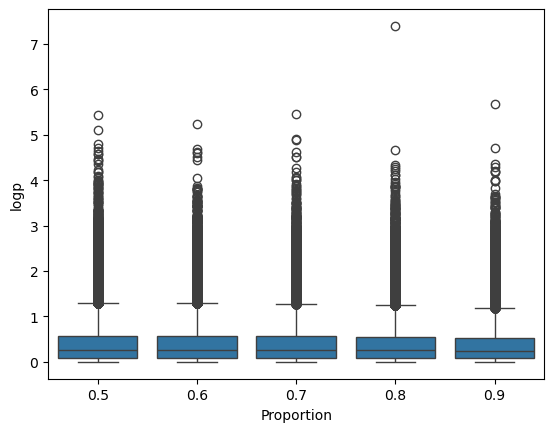

In [158]:
vvv = pd.read_csv("Windows_25KB_NoBGS_PC-1_SpecSup0_DlFetalLeydigMale_MAF0.25.txt", sep = "\t")
vvv["logp"] = -np.log10(vvv["Fisher exact p-value"])
#vvv = vvv[vvv["alpha"] > 0]
sns.boxplot(data = vvv, y = "logp", x = "Proportion")

In [187]:
v

Window  Statistic  \
Window                                                          
chr4:0-50000                          chr4:0-50000  abs logfc   
chr4:0-50000                          chr4:0-50000  abs logfc   
chr4:0-50000                          chr4:0-50000  abs logfc   
chr4:25000-75000                  chr4:25000-75000  abs logfc   
chr4:25000-75000                  chr4:25000-75000  abs logfc   
...                                            ...        ...   
chr4:190025000-190075000  chr4:190025000-190075000  abs logfc   
chr4:190025000-190075000  chr4:190025000-190075000  abs logfc   
chr4:190025000-190075000  chr4:190025000-190075000  abs logfc   
chr4:190050000-190100000  chr4:190050000-190100000  abs logfc   
chr4:190050000-190100000  chr4:190050000-190100000  abs logfc   

                          Median fixed PhyloP4474  Number fixed variants  \
Window                                                                     
chr4:0-50000                             0.020219                     52   
chr4:0-50000                             0.020219                     52   
chr4:0-50000                             0.020219                     52   
chr4:25000-75000                         0.026019                    106   
chr4:25000-75000                         0.026019                    106   
...                                           ...                    ...   
chr4:190025000-190075000                 0.027145                     35   
chr4:190025000-190075000                 0.027145                     35   
chr4:190025000-190075000                 0.027145                     35   
chr4:190050000-190100000                 0.023286                     20   
chr4:190050000-190100000                 0.023286                     20   

                          Median polymorphic PhyloP447  \
Window                                                   
chr4:0-50000                                  0.021410   
chr4:0-50000                                  0.021410   
chr4:0-50000                                  0.021410   
chr4:25000-75000                              0.030471   
chr4:25000-75000                              0.030471   
...                                                ...   
chr4:190025000-190075000                      0.021755   
chr4:190025000-190075000                      0.021755   
chr4:190025000-190075000                      0.021755   
chr4:190050000-190100000                      0.023806   
chr4:190050000-190100000                      0.023806   

                          Number polymorphic variants  Fisher exact p-value  \
Window                                                                        
chr4:0-50000                                       22              1.000000   
chr4:0-50000                                       22              0.355112   
chr4:0-50000                                       22              1.000000   
chr4:25000-75000                                   23              0.039325   
chr4:25000-75000                                   23              0.650144   
...                                               ...                   ...   
chr4:190025000-190075000                           34              1.000000   
chr4:190025000-190075000                           34              0.627881   
chr4:190025000-190075000                           34              1.000000   
chr4:190050000-190100000                           21              0.755738   
chr4:190050000-190100000                           21              1.000000   

                          MWU p-value     alpha    Cutoff  \
Window                                                      
chr4:0-50000                 0.244520  0.100000  0.022000   
chr4:0-50000                 0.244520 -0.791667  0.039136   
chr4:0-50000                 0.244520 -0.200000  0.082370   
chr4:25000-75000             0.088407 -2.388235  0.078051   
chr4:25000-75000             0.088407 -0.242593  0.030471   

In [184]:
v.sort_values("alpha")

Window  Statistic  \
Window                                                          
chrX:12875000-12925000      chrX:12875000-12925000  abs logfc   
chrX:65750000-65800000      chrX:65750000-65800000  abs logfc   
chrX:150325000-150375000  chrX:150325000-150375000  abs logfc   
chrX:105525000-105575000  chrX:105525000-105575000  abs logfc   
chrX:15100000-15150000      chrX:15100000-15150000  abs logfc   
...                                            ...        ...   
chrX:76500000-76550000      chrX:76500000-76550000  abs logfc   
chrX:13775000-13825000      chrX:13775000-13825000  abs logfc   
chrX:138150000-138200000  chrX:138150000-138200000  abs logfc   
chrX:114050000-114100000  chrX:114050000-114100000  abs logfc   
chrX:113750000-113800000  chrX:113750000-113800000  abs logfc   

                          Median fixed PhyloP4474  Number fixed variants  \
Window                                                                     
chrX:12875000-12925000                   0.018946                    133   
chrX:65750000-65800000                   0.019381                    119   
chrX:150325000-150375000                 0.019371                    130   
chrX:105525000-105575000                 0.023907                    116   
chrX:15100000-15150000                   0.022819                    180   
...                                           ...                    ...   
chrX:76500000-76550000                   0.024852                    163   
chrX:13775000-13825000                   0.031391                    133   
chrX:138150000-138200000                 0.023293                    166   
chrX:114050000-114100000                 0.026422                    123   
chrX:113750000-113800000                 0.025839                    188   

                          Median polymorphic PhyloP447  \
Window                                                   
chrX:12875000-12925000                        0.061177   
chrX:65750000-65800000                        0.039401   
chrX:150325000-150375000                      0.043259   
chrX:105525000-105575000                      0.037984   
chrX:15100000-15150000                        0.037813   
...                                                ...   
chrX:76500000-76550000                        0.012805   
chrX:13775000-13825000                        0.013571   
chrX:138150000-138200000                      0.014096   
chrX:114050000-114100000                      0.011573   
chrX:113750000-113800000                      0.011262   

                          Number polymorphic variants  Fisher exact p-value  \
Window                                                                        
chrX:12875000-12925000                             27              0.003276   
chrX:65750000-65800000                             34              0.003103   
chrX:150325000-150375000                           24              0.009356   
chrX:105525000-105575000                           29              0.010569   
chrX:15100000-15150000                             24              0.011587   
...                                               ...                   ...   
chrX:76500000-76550000                             23              0.024229   
chrX:13775000-13825000                             46              0.001126   
chrX:138150000-138200000                           26              0.010320   
chrX:114050000-114100000                           23              0.006287   
chrX:113750000-113800000                           20              0.003449   

                          MWU p-value     alpha    Cutoff  \
Window                                                      
chrX:12875000-12925000       0.000350 -4.178947  0.095506   
chrX:65750000-65800000       0.003365 -3.541667  0.084187   
chrX:150325000-150375000     0.032476 -3.454545  0.086664   
chrX:105525000-105575000     0.051167 -3.038095  0.097823   
chrX:15100000-15150000       0.037555 -2.948097  0.095837   

chr1
-0.047394166933394904
chr2
-0.0510795898444999
chr3
-0.0726721827533498
chr4
-0.08440029155558335
chr5
-0.0849467991421288
chr6
-0.07076349361535335
chr7
-0.0480757109687707
chr8
-0.0605479018427742
chr9
-0.027822006585876448
chr10
-0.0429804542001849
chr11
-0.086203444951055
chr12
-0.0471395224865322
chr13
-0.0538444069943945
chr14
-0.0313289332939256
chr15
-0.0594515638220091
chr16
-0.035191478438096
chr17
-0.0142047111181693
chr18
-0.02626597773562865
chr19
0.033372462967295555
chr20
-0.0354596993687296
chr21
-0.0085509163310773
chr22
0.0052448410568087
chrX
-0.07986638055880545


C:\Users\astar\AppData\Local\Temp\ipykernel_23240\2208451217.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
C:\Users\astar\AppData\Local\Temp\ipykernel_23240\2208451217.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
C:\Users\astar\AppData\Local\Temp\ipykernel_23240\2208451217.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

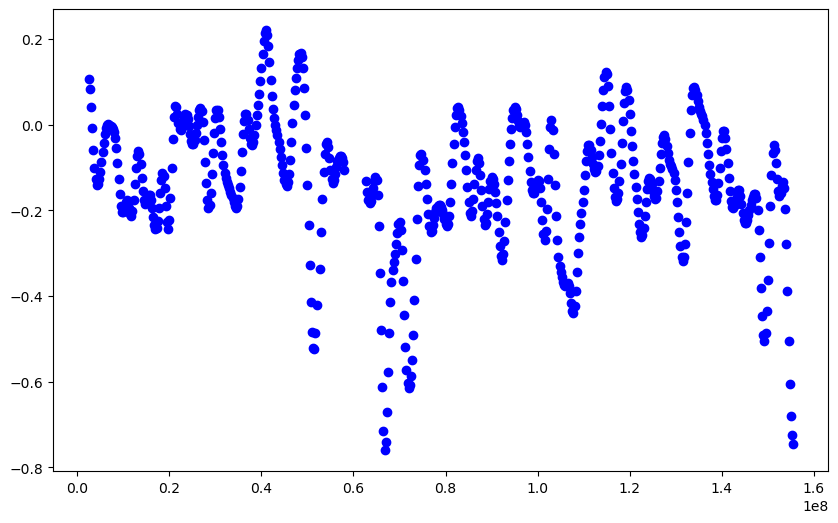

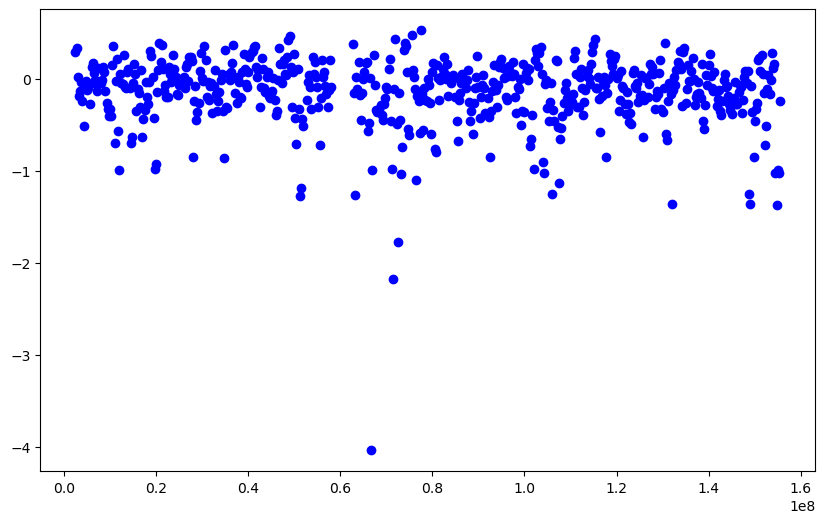

In [33]:
#Less essential genes at the ends of chromosomes, tend to get lost more often
chroms = ["chr" + str(x) for x in range(1, 23)] + ["chrX"]
vvv = pd.read_csv("Windows_500KB_NoBGS_PC-1_SpecSup0_DlpreGC_IIaFemale_MAF0.25.txt", sep = "\t")
vvv = vvv[vvv["Proportion"] == 0.9]
vvv.index = vvv["Window"]

vvv["Chrom"] = [x.split(":")[0] for x in list(vvv.index)]

for chrom in chroms:
    print(chrom)
        
    v = vvv[vvv["Chrom"].isin([chrom])]
    
    v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
    v = v.sort_values("Loc")
    #v = v.iloc[list(range(0, v.shape[0], 2))]
    print(np.median(v["alpha"]))
    v["X"] = range(v.shape[0])
    #v = v[(v["Number fixed variants"] >= 25) & (v["Number polymorphic variants"] >= 25)]
    #kde0 = gaussian_kde(v["7"], bw_method=0.3)
    
    x = v["Loc"]
    y = gaussian_filter1d([x if x > 0 else 0 for x in list(v["alpha"])], sigma=1)
    y = gaussian_filter1d(v["alpha"], sigma=3)
    #y = [x if x > 0 else 0 for x in list(v["alpha"])]
    #y = v["Number polymorphic variants"]
    #y3 = np.log10(1+np.maximum(v["PhyloP Statistic corrected"], 0))
    #y = v["Median fixed BGS_Score 0"]
    #y2 = v["Median polymorphic BGS_Score 0"]
    #fig, ax = plt.subplots(figsize=(10,6))
    #ax.scatter(x, y, color='b', label='Alpha')
    #plt.ylim(0, 1)
    #ax.scatter(x, y2, color='orange', label='Alpha')
    #ax.scatter(x, y3, color='red', label='Alpha')
    #avg = []
    #cur = []
    #cur2 = []
    #avg2 = []
    #for index, row in v.iterrows():
    #    cur.append(row["alpha"])
    #    cur2.append(row["Loc"])
    #    if len(cur) == 20:
    #        avg.append(np.median(cur))
    #        avg2.append(np.median(cur2))
    #        cur = []
    #        cur2 = []
    if chrom == "chrX":
        #df = pd.DataFrame([avg2, avg])
        fig, ax = plt.subplots(figsize=(10,6))
        ax.scatter(x, y, color='b', label='Alpha')
        plt.show()
        fig, ax = plt.subplots(figsize=(10,6))
        ax.scatter(x, v["alpha"], color='b', label='Alpha')
        plt.show()
        df = v.copy()

In [41]:
df.sort_values("Fisher exact p-value").head(50)

Window  Statistic  \
Window                                                          
chrX:12000000-12500000      chrX:12000000-12500000  abs logfc   
chrX:85500000-86000000      chrX:85500000-86000000  abs logfc   
chrX:71500000-72000000      chrX:71500000-72000000  abs logfc   
chrX:107500000-108000000  chrX:107500000-108000000  abs logfc   
chrX:117750000-118250000  chrX:117750000-118250000  abs logfc   
chrX:132000000-132500000  chrX:132000000-132500000  abs logfc   
chrX:92500000-93000000      chrX:92500000-93000000  abs logfc   
chrX:125750000-126250000  chrX:125750000-126250000  abs logfc   
chrX:34750000-35250000      chrX:34750000-35250000  abs logfc   
chrX:149000000-149500000  chrX:149000000-149500000  abs logfc   
chrX:106000000-106500000  chrX:106000000-106500000  abs logfc   
chrX:72000000-72500000      chrX:72000000-72500000  abs logfc   
chrX:104250000-104750000  chrX:104250000-104750000  abs logfc   
chrX:76500000-77000000      chrX:76500000-77000000  abs logfc   
chrX:2750000-3250000          chrX:2750000-3250000  abs logfc   
chrX:88250000-88750000      chrX:88250000-88750000  abs logfc   
chrX:79750000-80250000      chrX:79750000-80250000  abs logfc   
chrX:80750000-81250000      chrX:80750000-81250000  abs logfc   
chrX:116500000-117000000  chrX:116500000-117000000  abs logfc   
chrX:4250000-4750000          chrX:4250000-4750000  abs logfc   
chrX:28000000-28500000      chrX:28000000-28500000  abs logfc   
chrX:55500000-56000000      chrX:55500000-56000000  abs logfc   
chrX:115250000-115750000  chrX:115250000-115750000  abs logfc   
chrX:80500000-81000000      chrX:80500000-81000000  abs logfc   
chrX:88750000-89250000      chrX:88750000-89250000  abs logfc   
chrX:102000000-102500000  chrX:102000000-102500000  abs logfc   
chrX:154750000-155250000  chrX:154750000-155250000  abs logfc   
chrX:139000000-139500000  chrX:139000000-139500000  abs logfc   
chrX:152250000-152750000  chrX:152250000-152750000  abs logfc   
chrX:72500000-73000000      chrX:72500000-73000000  abs logfc   
chrX:20000000-20500000      chrX:20000000-20500000  abs logfc   
chrX:41250000-41750000      chrX:41250000-41750000  abs logfc   
chrX:122750000-123250000  chrX:122750000-123250000  abs logfc   
chrX:101250000-101750000  chrX:101250000-101750000  abs logfc   
chrX:85250000-85750000      chrX:85250000-85750000  abs logfc   
chrX:14500000-15000000      chrX:14500000-15000000  abs logfc   
chrX:11750000-12250000      chrX:11750000-12250000  abs logfc   
chrX:148750000-149250000  chrX:148750000-149250000  abs logfc   
chrX:51250000-51750000      chrX:51250000-51750000  abs logfc   
chrX:131000000-131500000  chrX:131000000-131500000  abs logfc   
chrX:107750000-108250000  chrX:107750000-108250000  abs logfc   
chrX:32250000-32750000      chrX:32250000-32750000  abs logfc   
chrX:104000000-104500000  chrX:104000000-104500000  abs logfc   
chrX:30500000-31000000      chrX:30500000-31000000  abs logfc   
chrX:2500000-3000000          chrX:2500000-3000000  abs logfc   
chrX:50500000-51000000      chrX:50500000-51000000  abs logfc   
chrX:41000000-41500000      chrX:41000000-41500000  abs logfc   
chrX:101500000-102000000  chrX:101500000-102000000  abs logfc   
chrX:51500000-52000000      chrX:51500000-52000000  abs logfc   
chrX:14750000-15250000      chrX:14750000-15250000  abs logfc   

                          Median fixed abs logfc  Number fixed variants  \
Window                                                                    
chrX:12000000-12500000                  0.034180                   1336   
chrX:85500000-86000000                  0.034543                   1183   
chrX:71500000-72000000                  0.032046                    769   
chrX:107500000-108000000                0.031525                   1149   
chrX:117750000-118250000                0.032674                   1178   
chrX:132000000-132500000                0.033458                   1074   
chrX:92500000-93000000                  0.033831               

chr1
0.1458333333333333


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


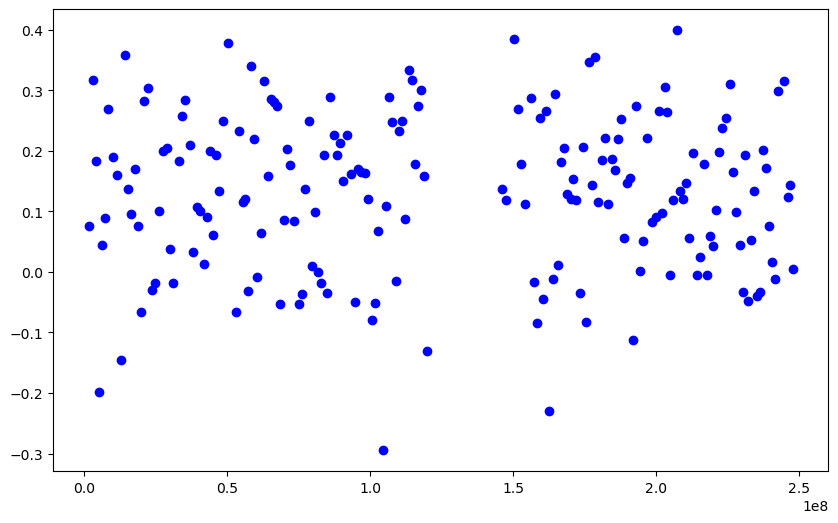

chr2
0.1358024691358025


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


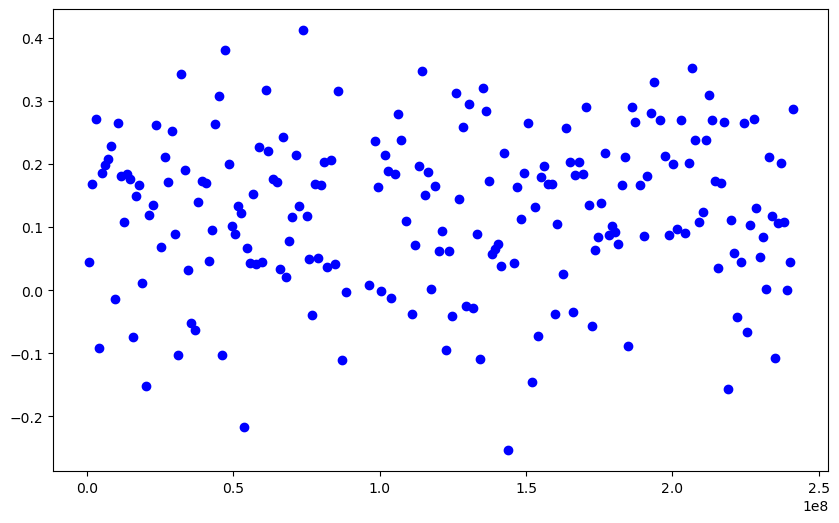

chr3
0.1296296296296296


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


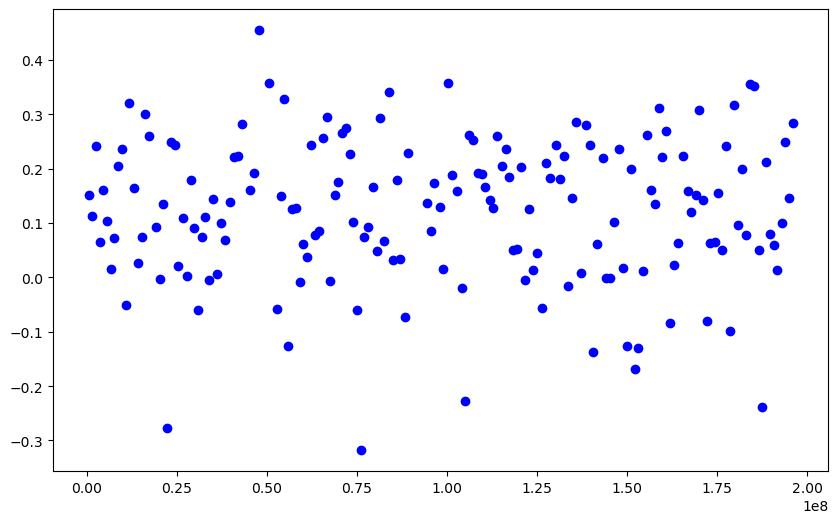

chr4
0.1156963890935888


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


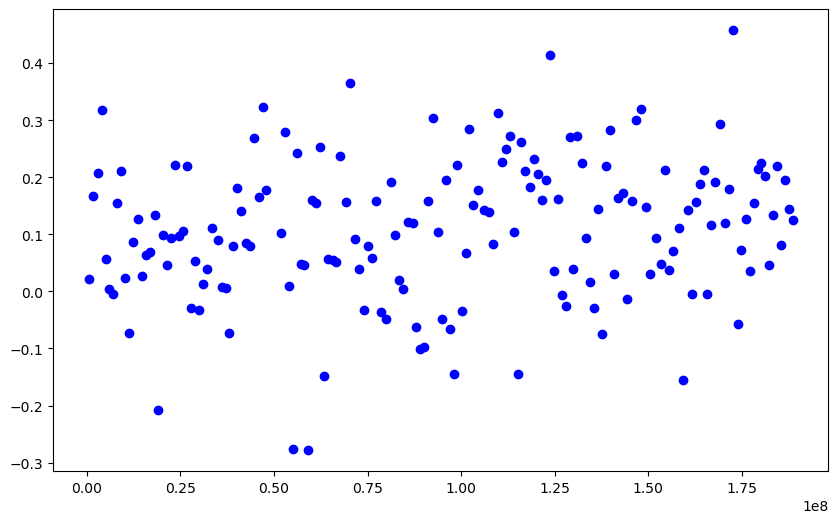

chr5
0.1296320700576019


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


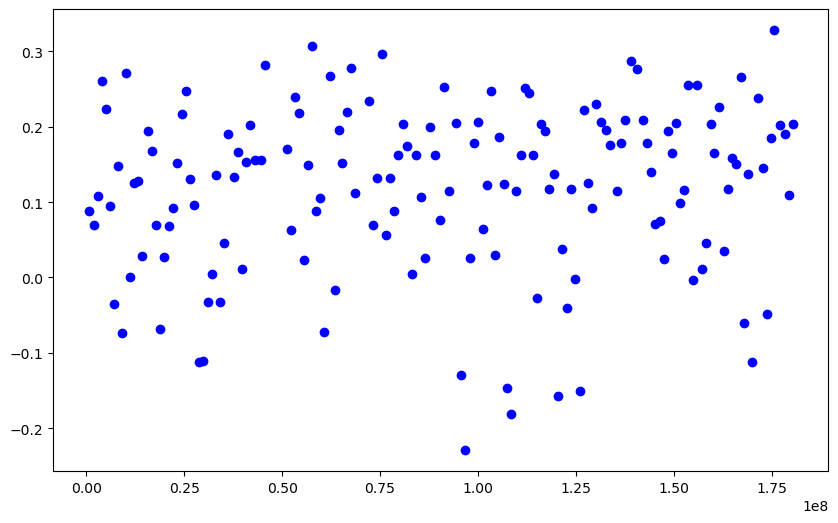

chr6
0.1304347826086956


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


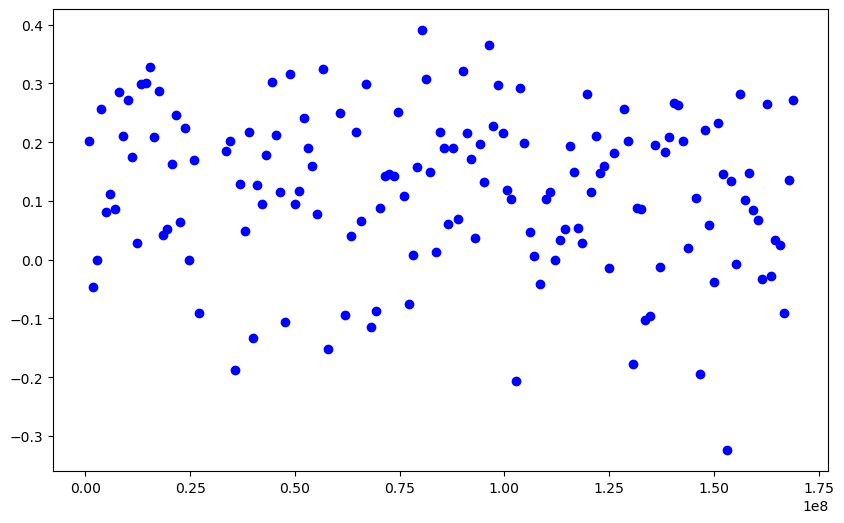

chr7
0.12107328282335594


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


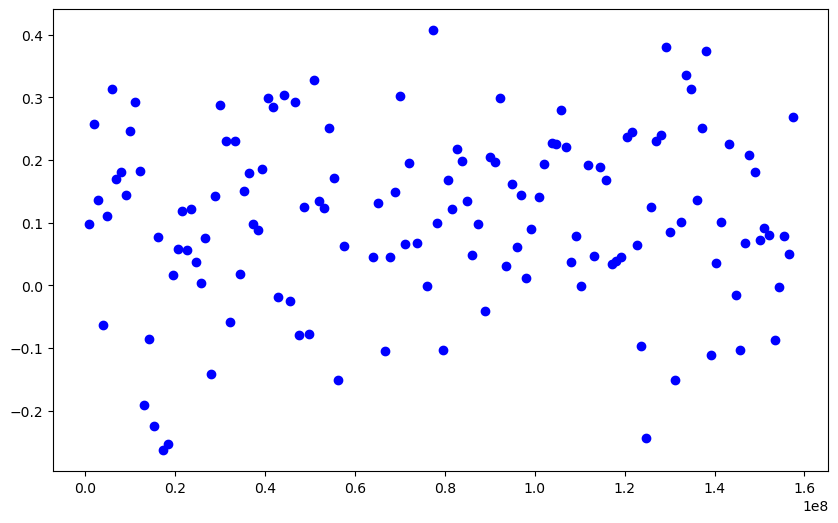

chr8
0.11582894100272435


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


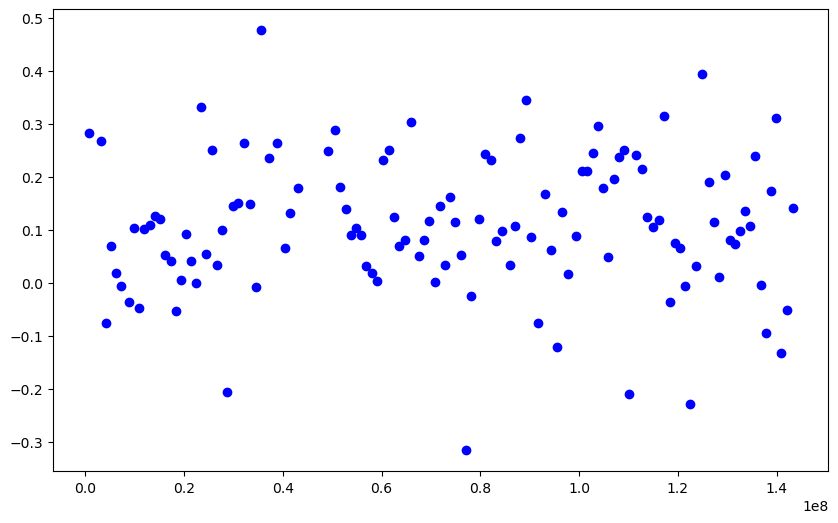

chr9
0.10906673114119919


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


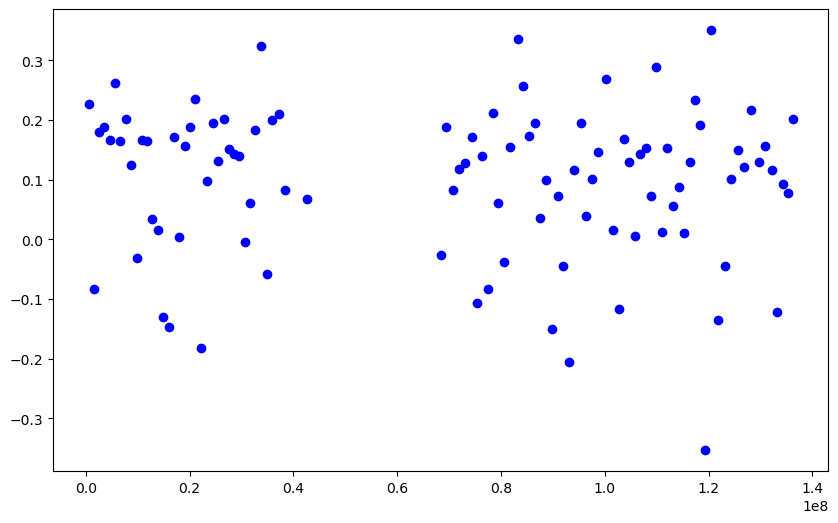

chr10
0.1191135734072023


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


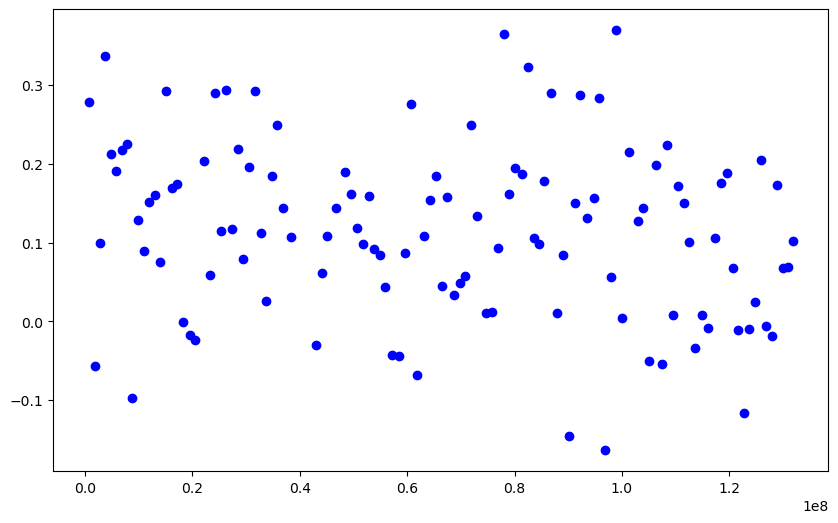

chr11
0.11496243934303835


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


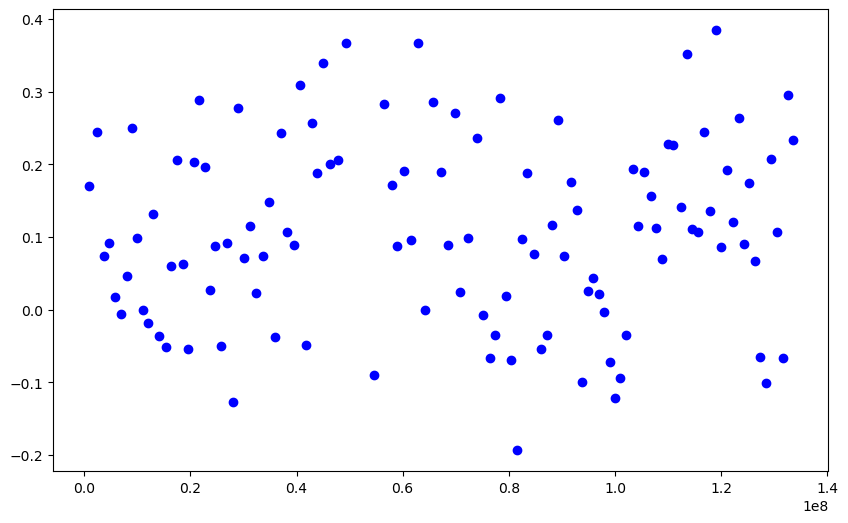

chr12
0.1421911421911422


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


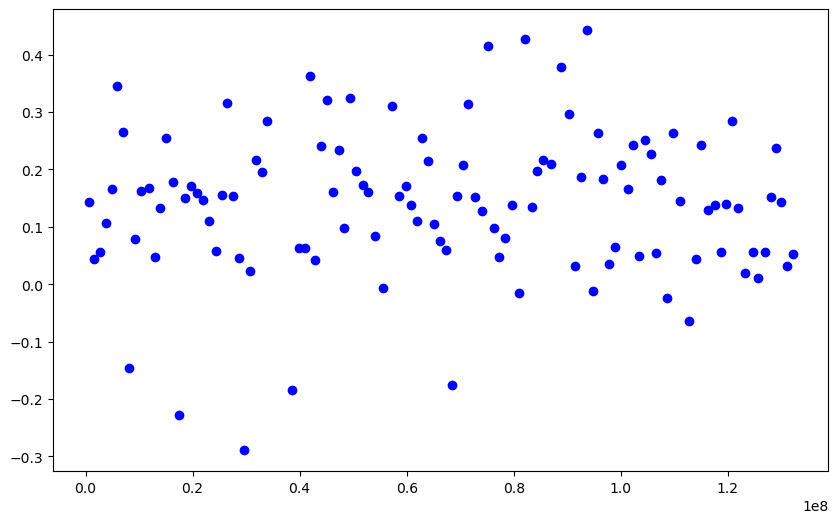

chr13
0.115169964485033


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


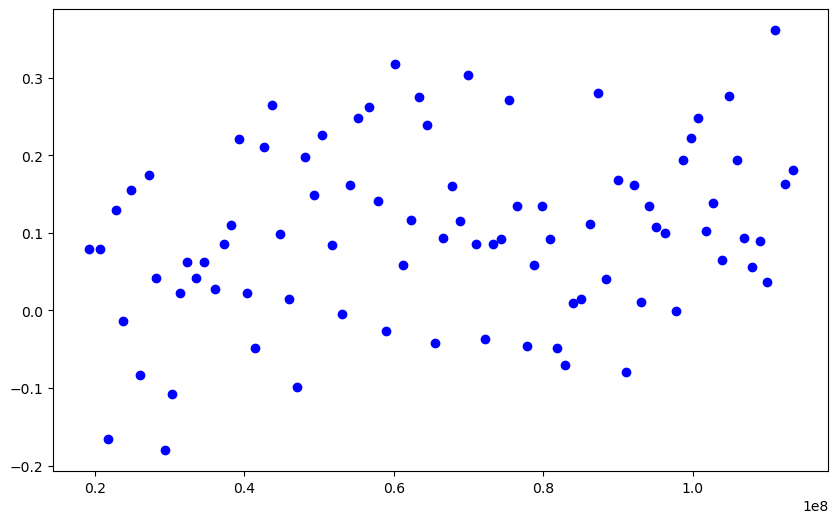

chr14
0.1218457101658256


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


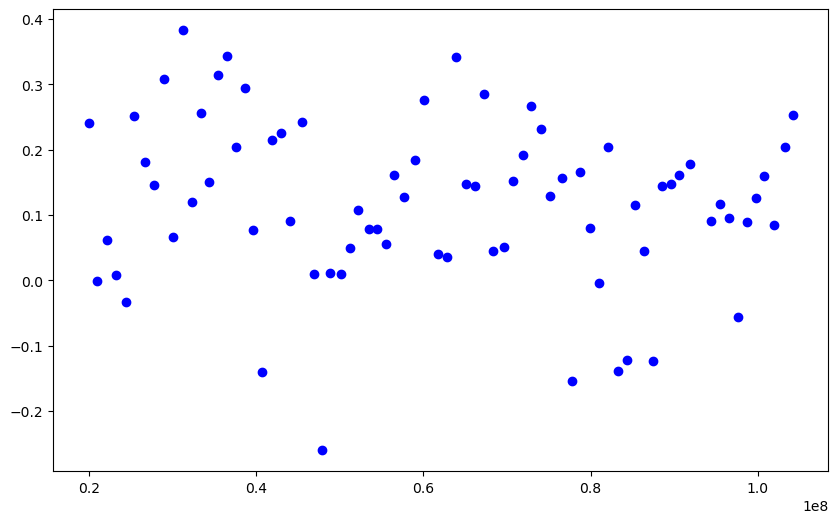

chr15
0.13207425273494705


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


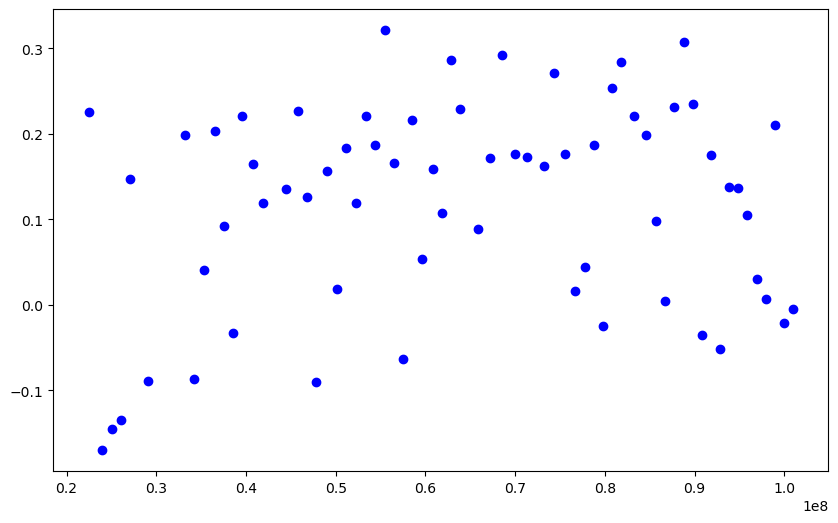

chr16
0.11332842210608246


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


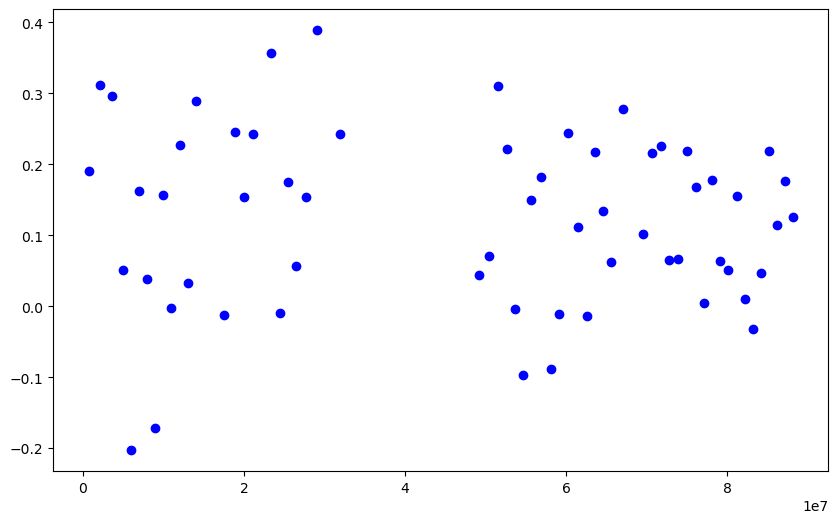

chr17
0.1424825174825174


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


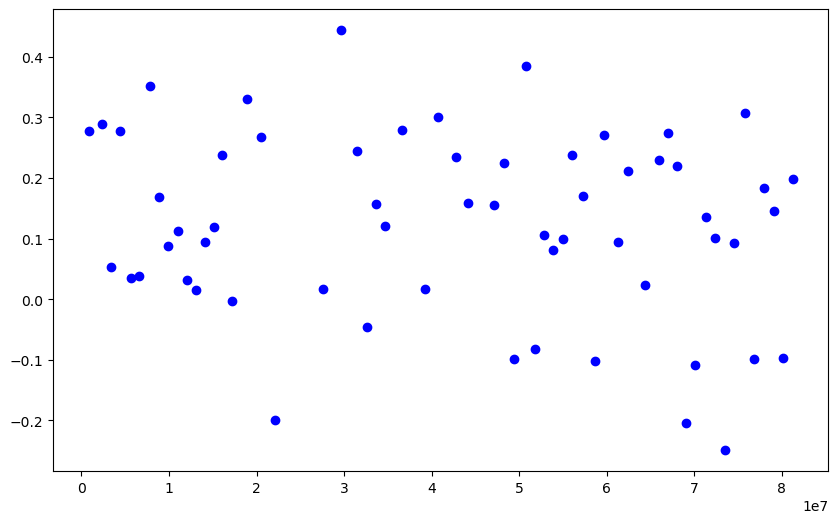

chr18
0.1158357771260997


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


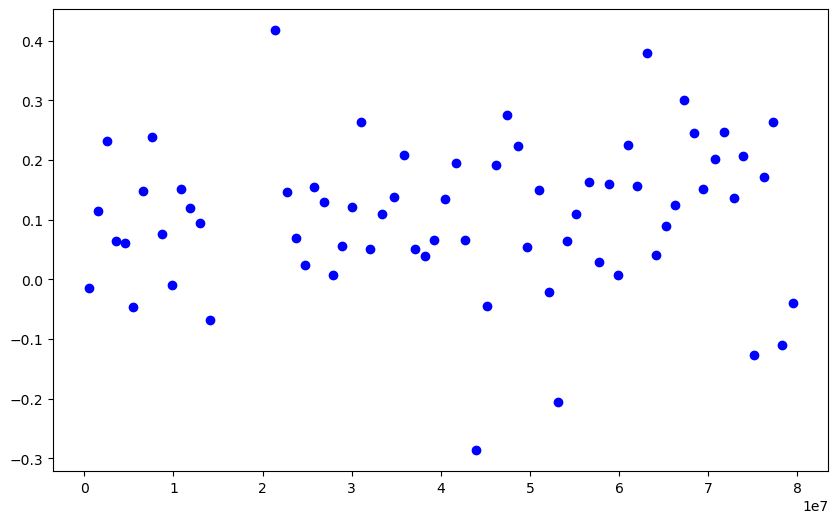

chr19
0.2058823529411765


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


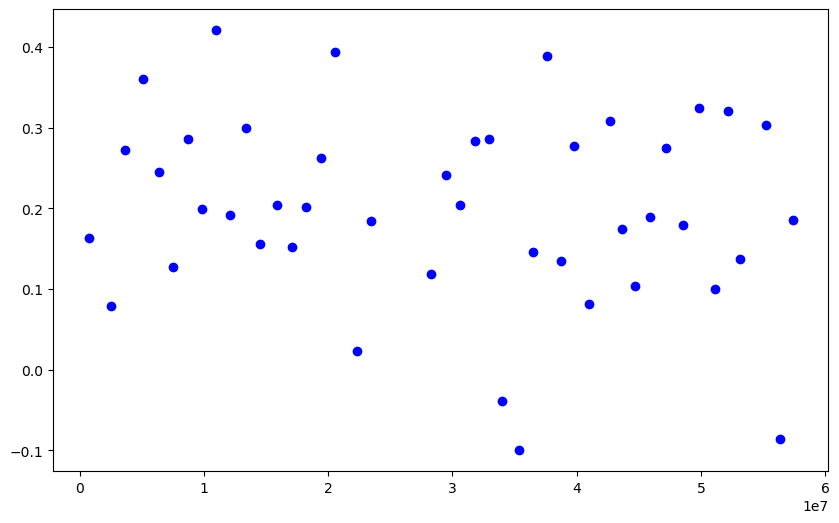

chr20
0.1380015774425713


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


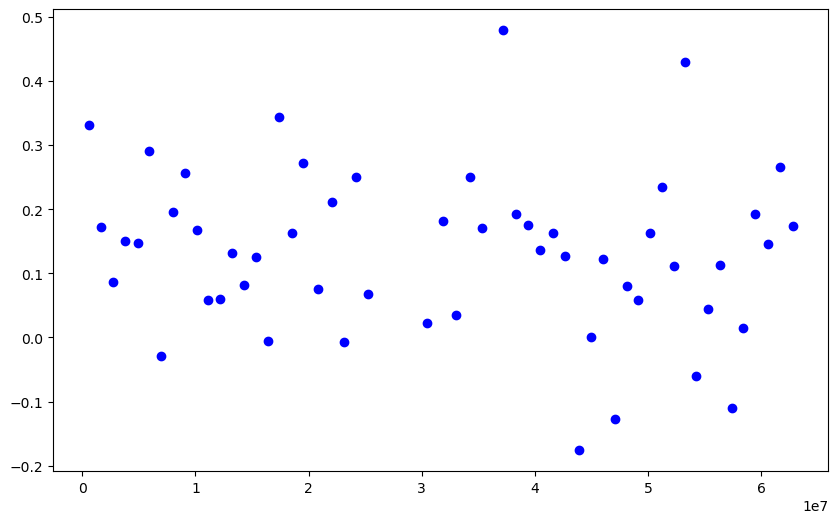

chr21
0.1086956521739132


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


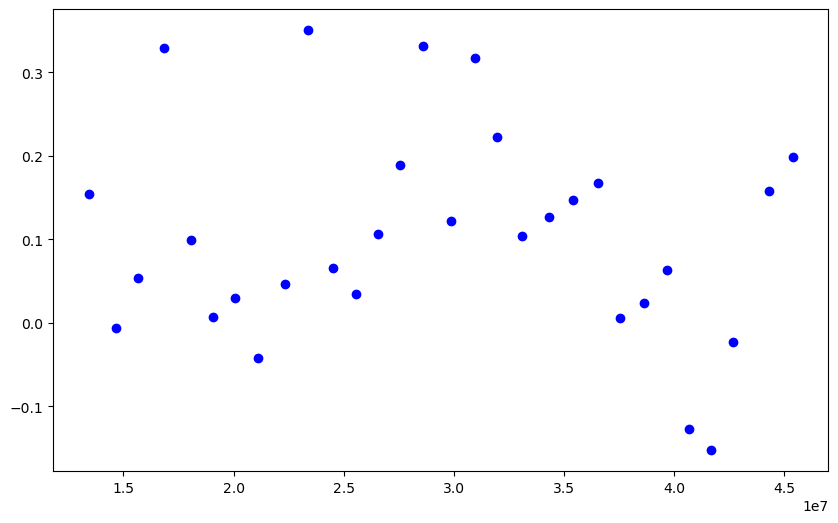

chr22
0.1707016700708878


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


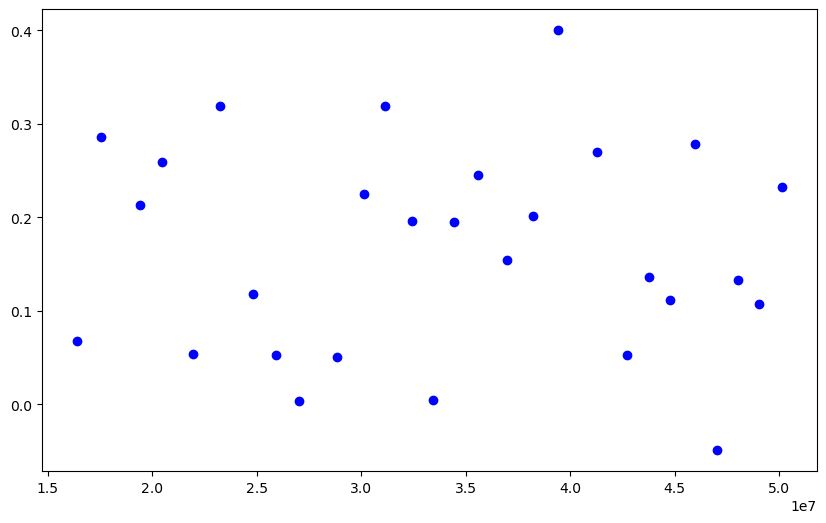

chrX
0.19999999999999996


C:\Users\astar\AppData\Local\Temp\ipykernel_8896\1019625401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


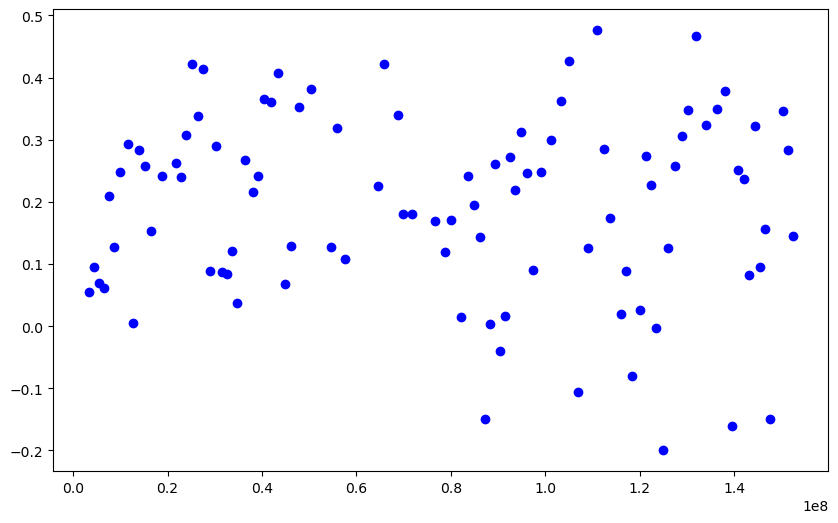

In [2]:
#Less essential genes at the ends of chromosomes, tend to get lost more often
chroms = ["chr" + str(x) for x in range(1, 23)] + ["chrX"]
vvv = pd.read_csv("Windows_50KB_NoBGS_PC-1_SpecSup0_DlFetalLeydigMale_MAF0.25.txt", sep = "\t")
vvv = vvv[vvv["Proportion"] == 0.9]
vvv.index = vvv["Window"]

vvv["Chrom"] = [x.split(":")[0] for x in list(vvv.index)]

for chrom in chroms:
    print(chrom)
        
    v = vvv[vvv["Chrom"].isin([chrom])]
    
    v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
    v = v.sort_values("Loc")
    v = v.iloc[list(range(0, v.shape[0], 2))]
    print(np.median(v["alpha"]))
    v["X"] = range(v.shape[0])
    #v = v[(v["Number fixed variants"] >= 25) & (v["Number polymorphic variants"] >= 25)]
    #kde0 = gaussian_kde(v["7"], bw_method=0.3)
    
    #x = v["Loc"]
    #y = gaussian_filter1d([x if x > 0 else 0 for x in list(v["alpha"])], sigma=3)
    #y = [x if x > 0 else 0 for x in list(v["alpha"])]
    #y = v["Number polymorphic variants"]
    #y3 = np.log10(1+np.maximum(v["PhyloP Statistic corrected"], 0))
    #y = v["Median fixed BGS_Score 0"]
    #y2 = v["Median polymorphic BGS_Score 0"]
    #fig, ax = plt.subplots(figsize=(10,6))
    #ax.scatter(x, y, color='b', label='Alpha')
    #plt.ylim(0, 1)
    #ax.scatter(x, y2, color='orange', label='Alpha')
    #ax.scatter(x, y3, color='red', label='Alpha')
    avg = []
    cur = []
    cur2 = []
    avg2 = []
    for index, row in v.iterrows():
        cur.append(row["alpha"])
        cur2.append(row["Loc"])
        if len(cur) == 20:
            avg.append(np.median(cur))
            avg2.append(np.median(cur2))
            cur = []
            cur2 = []
    if chrom == "chr19":
        df = pd.DataFrame([avg2, avg])
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(avg2, avg, color='b', label='Alpha')
    plt.show()

In [207]:
df.sort_values(0)

1           0
0   0.126917    862500.0
1   0.024846   2461250.0
2   0.199836   3715000.0
3   0.153925   5110000.0
4  -0.101675   6405000.0
5  -0.144022   7470000.0
6   0.112098   8670000.0
7   0.149843   9831250.0
8   0.163859  10981250.0
9   0.011241  12076250.0
10 -0.210300  13310000.0
11  0.010358  14553750.0
12 -0.216503  15826250.0
13 -0.110008  17067500.0
14 -0.167321  18163750.0
15  0.169987  19342500.0
16  0.175789  20667500.0
17 -0.301504  22226250.0
18 -0.569953  23441250.0
19 -0.152541  27930000.0
20  0.187040  29492500.0
21  0.074306  30635000.0
22  0.276642  31803750.0
23  0.103665  32902500.0
24 -0.104614  34105000.0
25 -0.166269  35365000.0
26  0.021247  36460000.0
27  0.043508  37575000.0
28 -0.061535  38706250.0
29  0.162286  39765000.0
30 -0.315551  40946250.0
31  0.215662  42531250.0
32 -0.115988  43665000.0
33 -0.221089  44725000.0
34  0.040276  45897500.0
35  0.116812  47235000.0
36  0.021965  48567500.0
37 -0.029453  49790000.0
38 -0.363365  51122500.0
39  0.237480  52150000.0
40  0.113114  53150000.0
41 -0.061558  54877500.0
42 -0.513994  56383750.0
43  0.040647  57455000.0

In [209]:
#Most Positively selected big windows for chr19 are:
#1. Intergenic region near TSHZ3
#2. Gene dense region with SIGLECs + KLKs + ZNFs
#3. Gene dense region with CEACAMs + PSGs + others
df = df.T.sort_values(1)
df

0         1
25  35375000.0 -0.099561
42  56387500.0 -0.085556
24  34000000.0 -0.038801
17  22300000.0  0.023668
1    2500000.0  0.079536
30  40950000.0  0.081731
38  51137500.0  0.100423
33  44725000.0  0.103776
19  28275000.0  0.119126
5    7475000.0  0.126970
28  38725000.0  0.134921
40  53150000.0  0.136834
26  36475000.0  0.145838
13  17050000.0  0.152138
11  14550000.0  0.155603
0     725000.0  0.163442
32  43650000.0  0.173930
36  48550000.0  0.178698
18  23450000.0  0.183929
43  57425000.0  0.185952
34  45900000.0  0.188660
9   12075000.0  0.192113
7    9850000.0  0.199694
14  18175000.0  0.201079
12  15850000.0  0.204051
21  30625000.0  0.204560
20  29500000.0  0.241248
4    6400000.0  0.244765
15  19400000.0  0.261846
2    3650000.0  0.272490
35  47200000.0  0.274594
29  39750000.0  0.277137
22  31825000.0  0.282919
23  32925000.0  0.285319
6    8687500.0  0.285446
10  13350000.0  0.299830
41  55200000.0  0.302589
31  42650000.0  0.308400
39  52150000.0  0.320638
37  49812500.0  0.323879
3    5100000.0  0.359879
27  37575000.0  0.389106
16  20575000.0  0.394160
8   11000000.0  0.420716

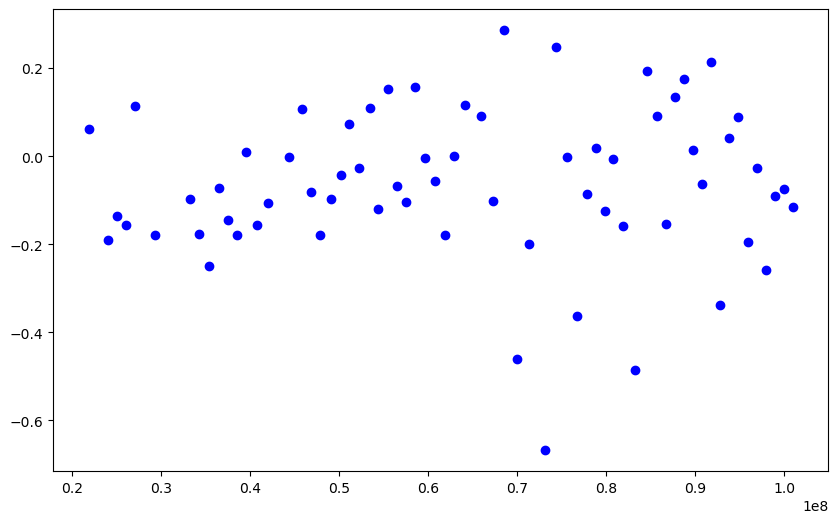

In [195]:
avg = []
cur = []
cur2 = []
avg2 = []
for index, row in v.iterrows():
    cur.append(row["alpha"])
    cur2.append(row["Loc"])
    if len(cur) == 20:
        avg.append(np.mean(cur))
        avg2.append(np.mean(cur2))
        cur = []
        cur2 = []

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(avg2, avg, color='b', label='Alpha')
#plt.ylim(0, 1)

chr1


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


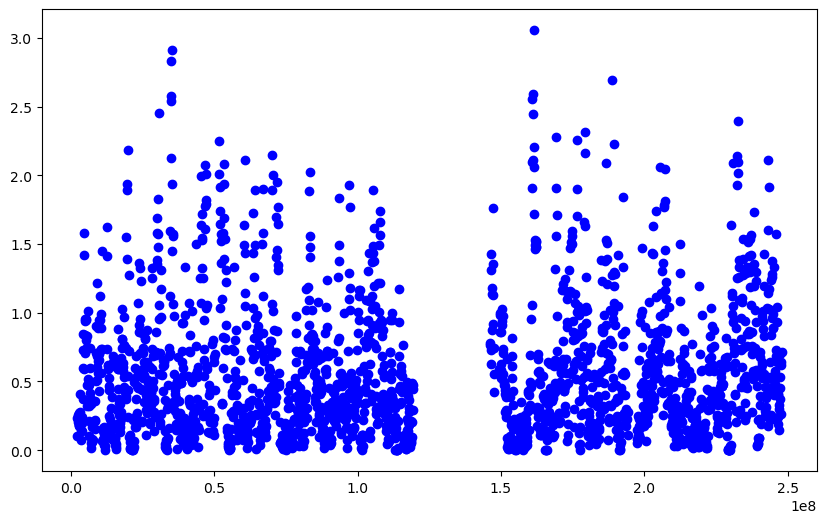

chr2


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


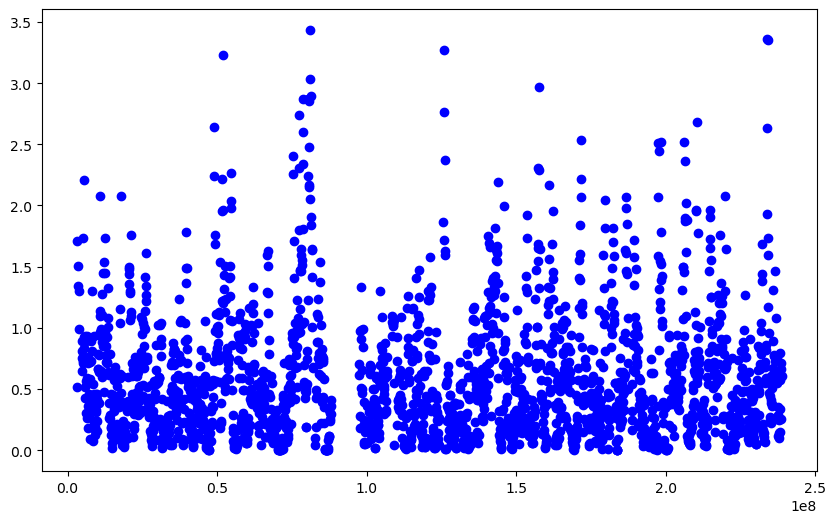

chr3


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


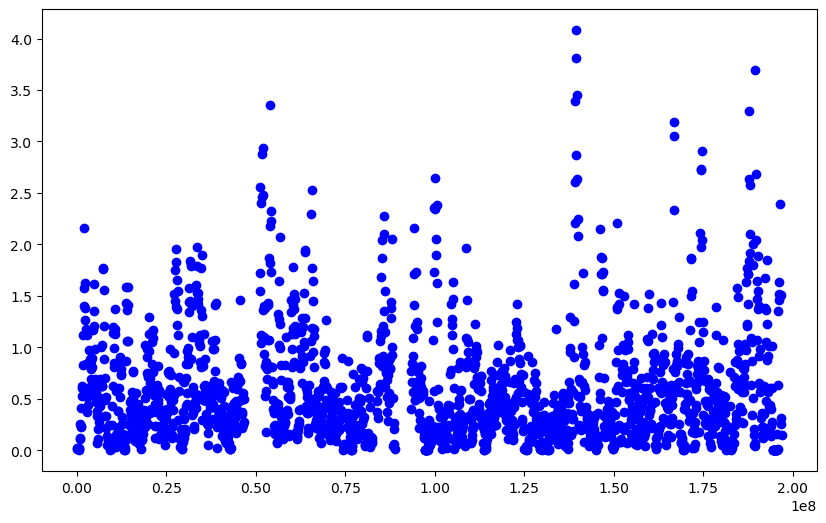

chr4


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


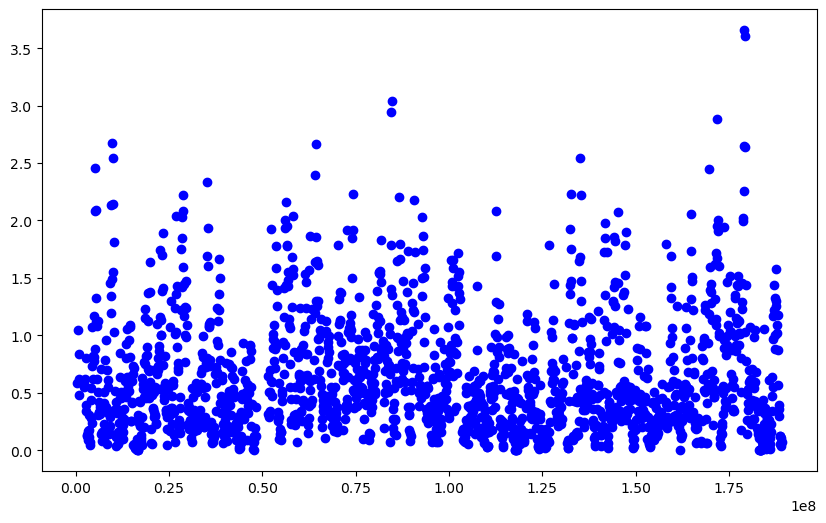

chr5


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


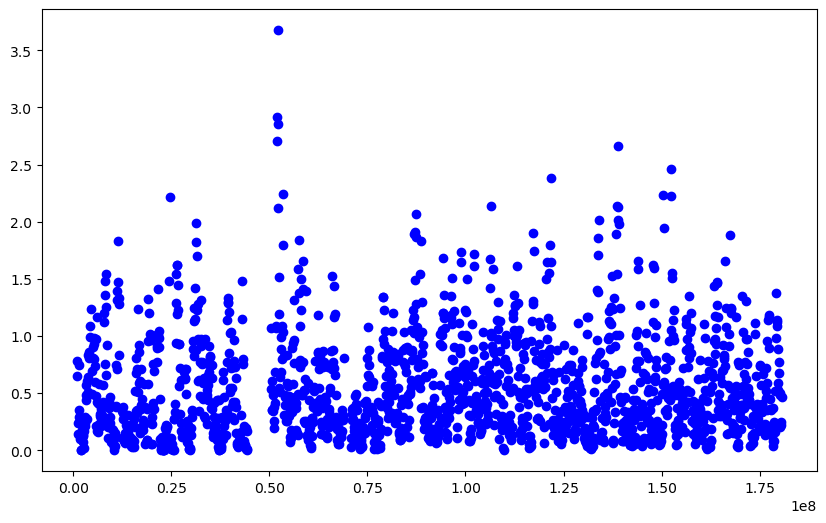

chr6


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


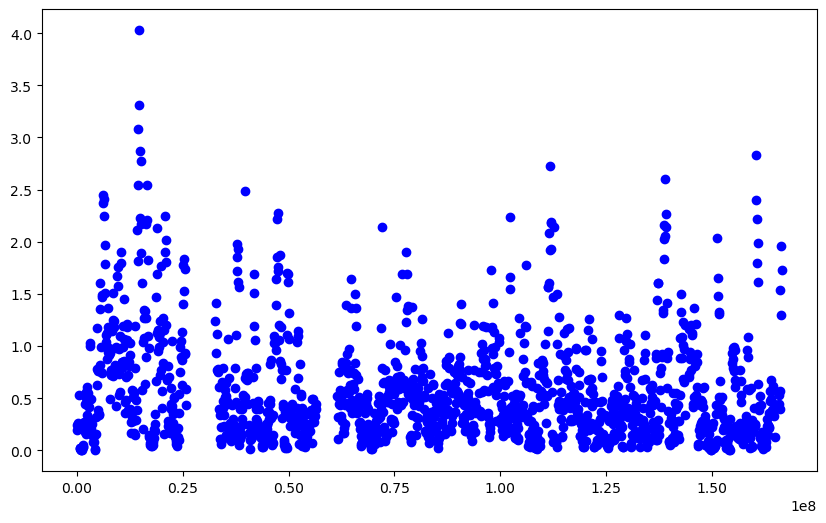

chr7


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


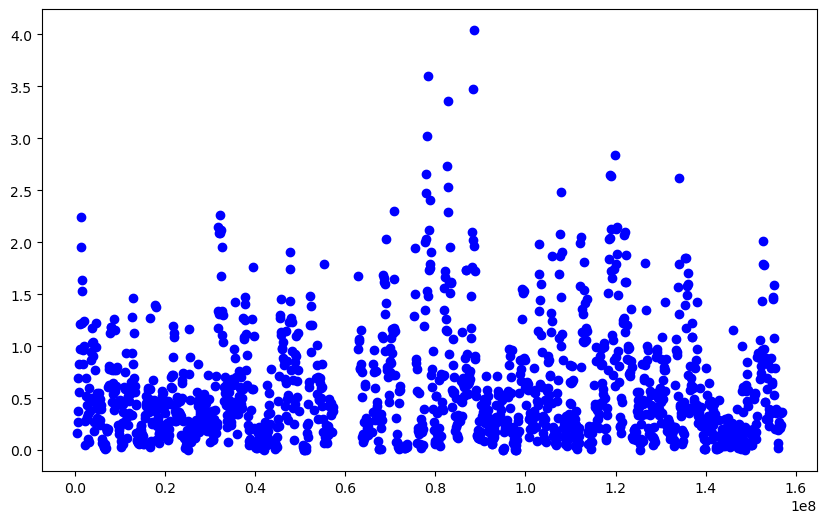

chr8


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


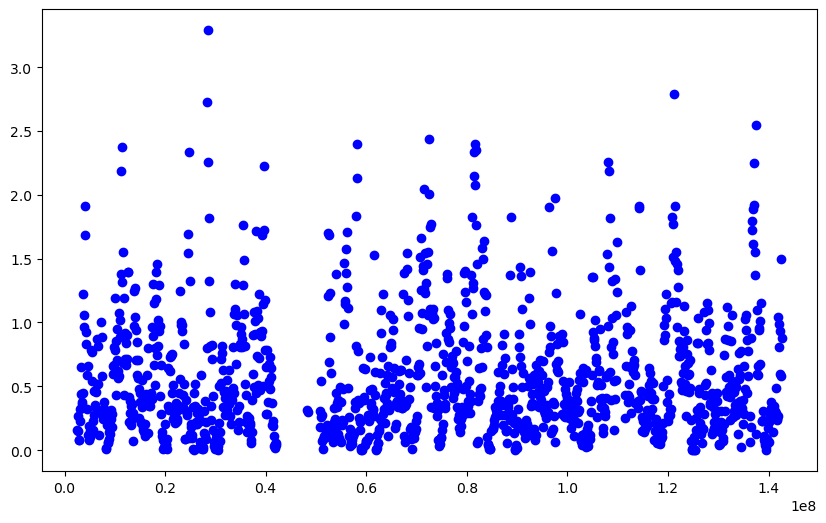

chr9


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


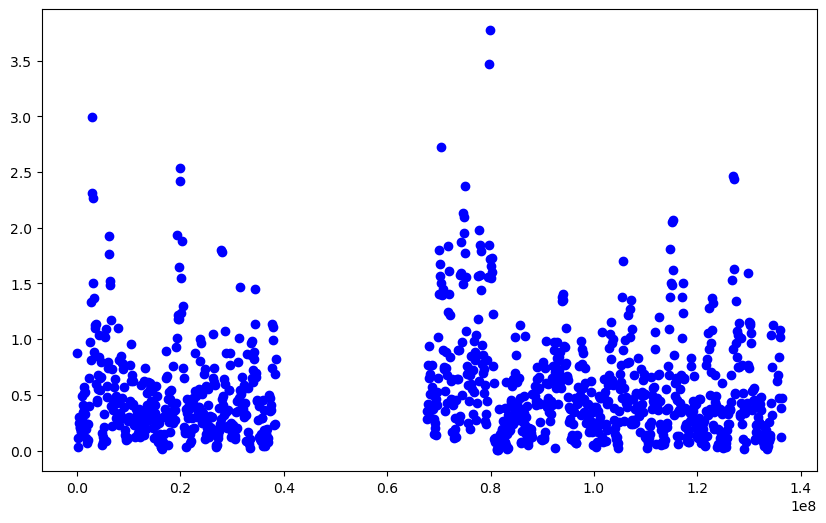

chr10


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


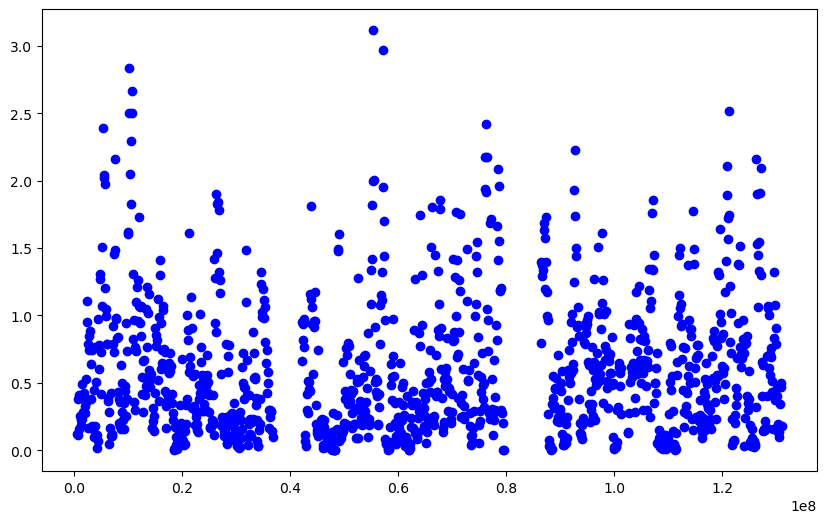

chr11


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


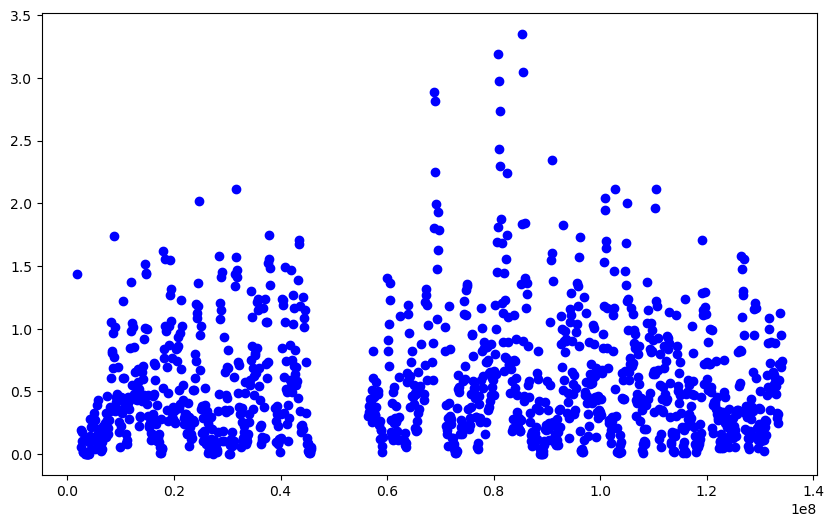

chr12


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


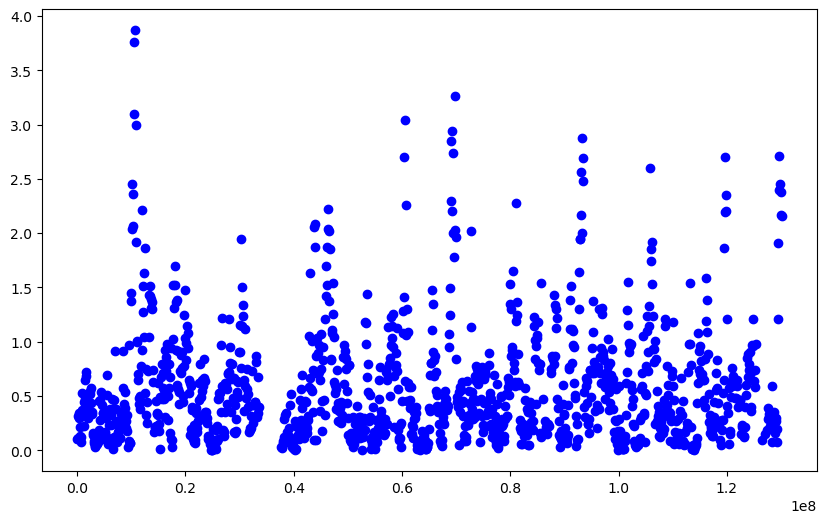

chr13


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


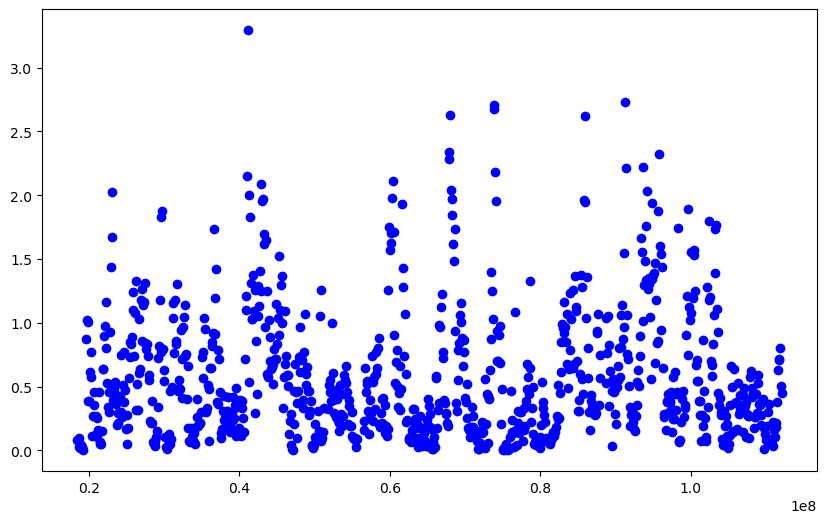

chr14


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


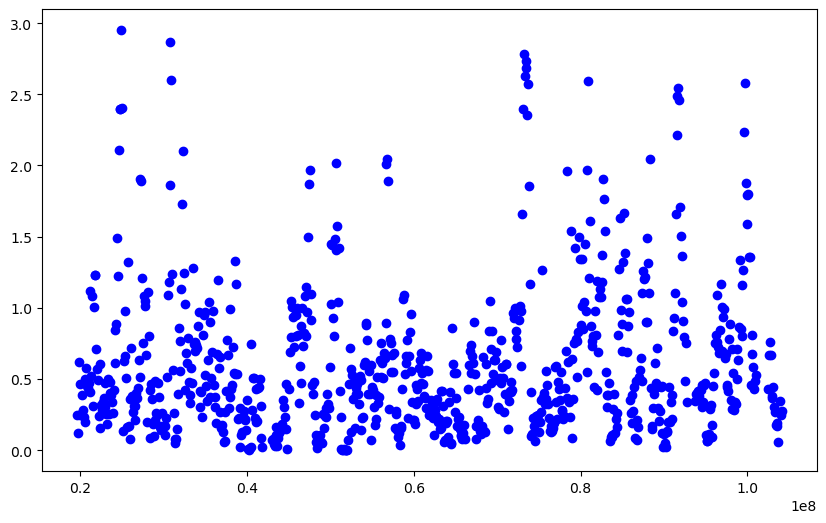

chr15


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


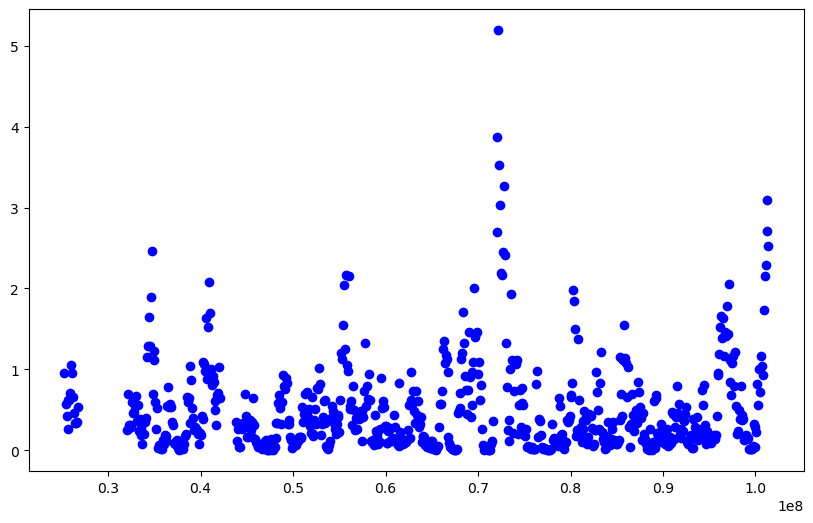

chr16


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


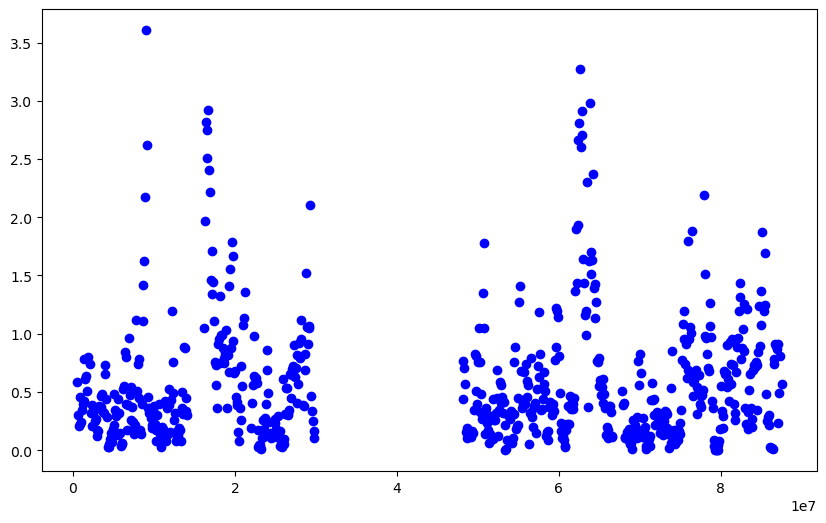

chr17


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


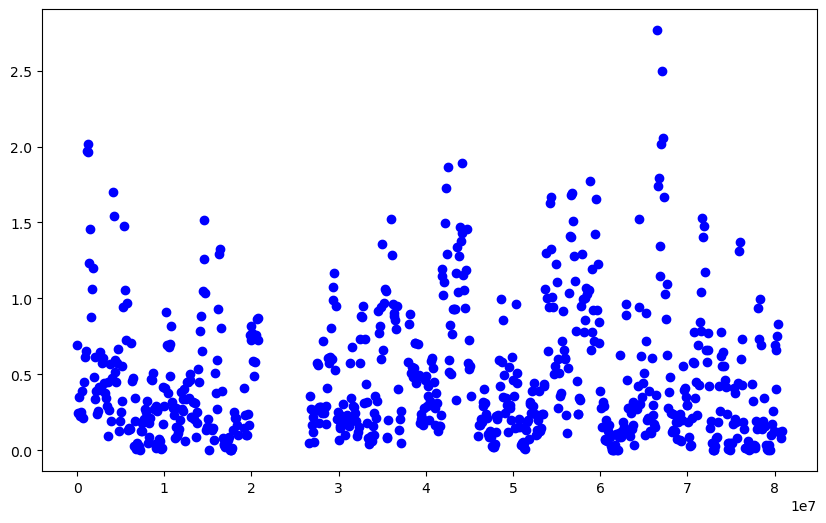

chr18


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


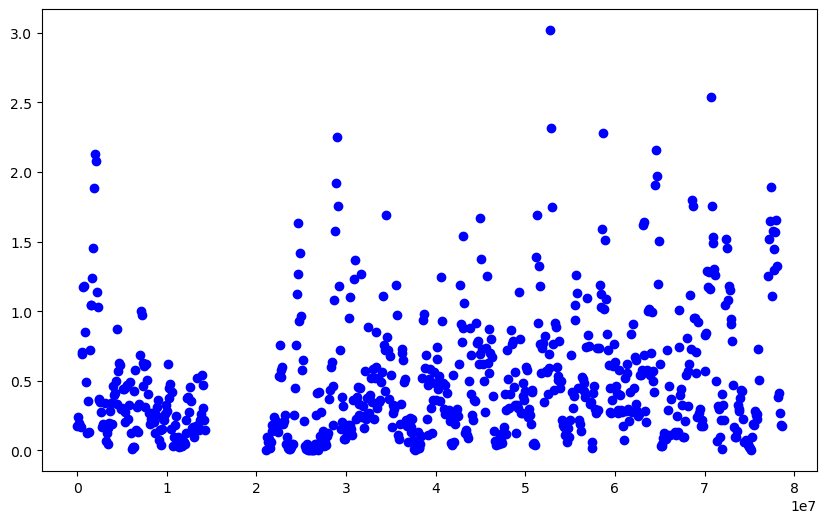

chr19


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


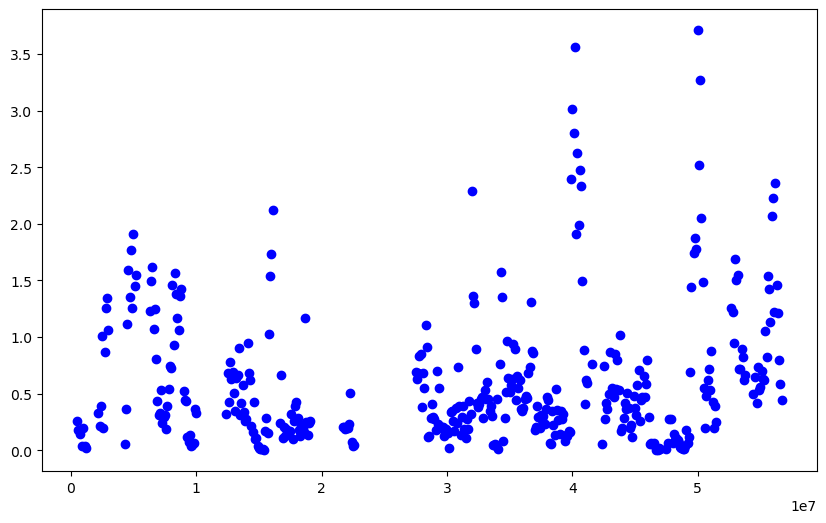

chr20


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


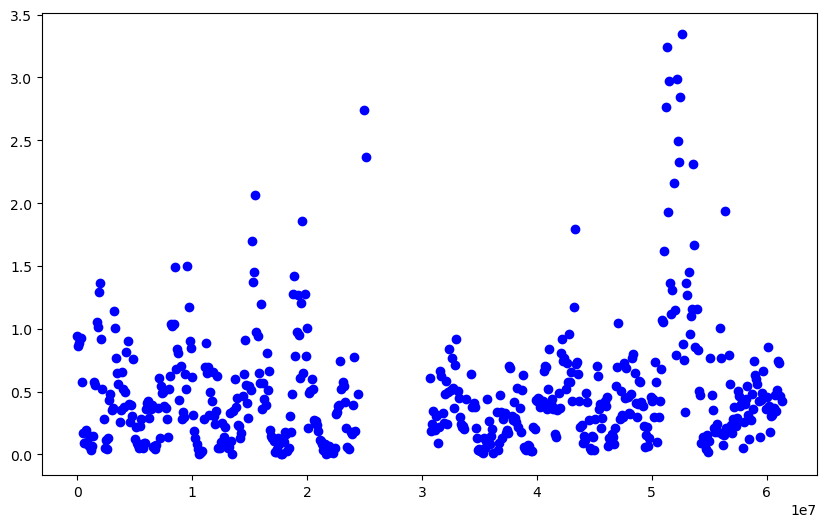

chr21


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


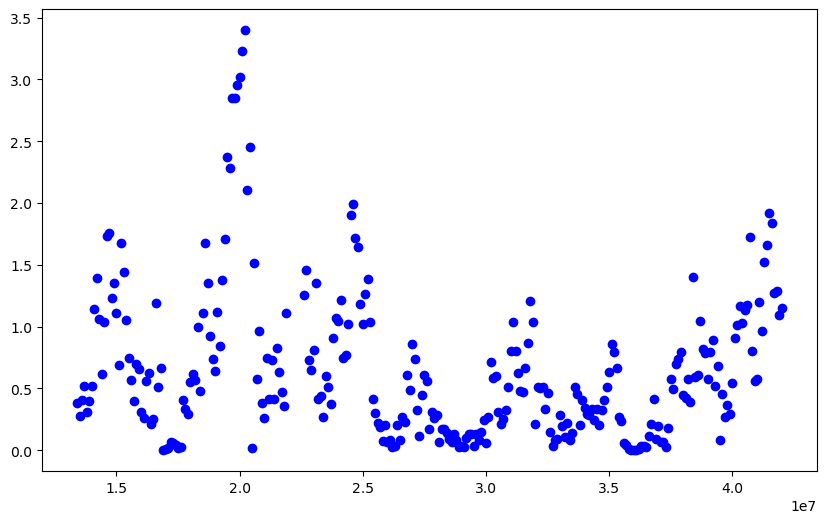

chr22


C:\Users\astar\AppData\Local\Temp\ipykernel_27632\784753643.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


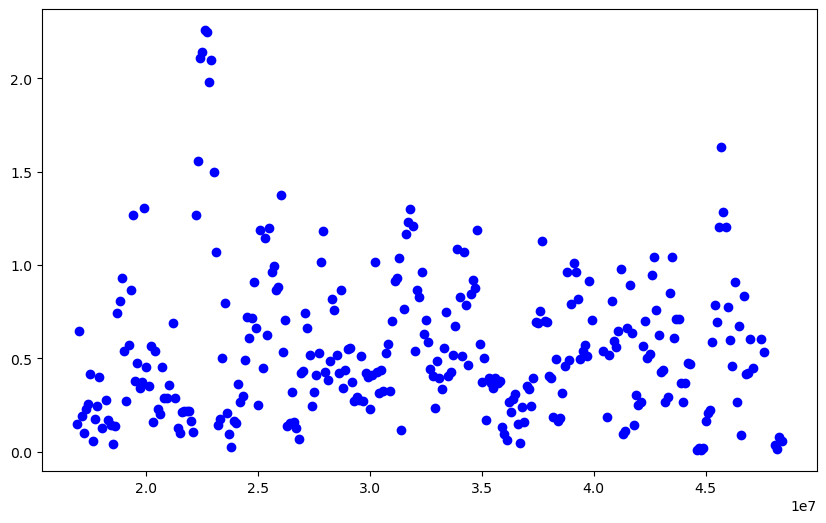

chrX


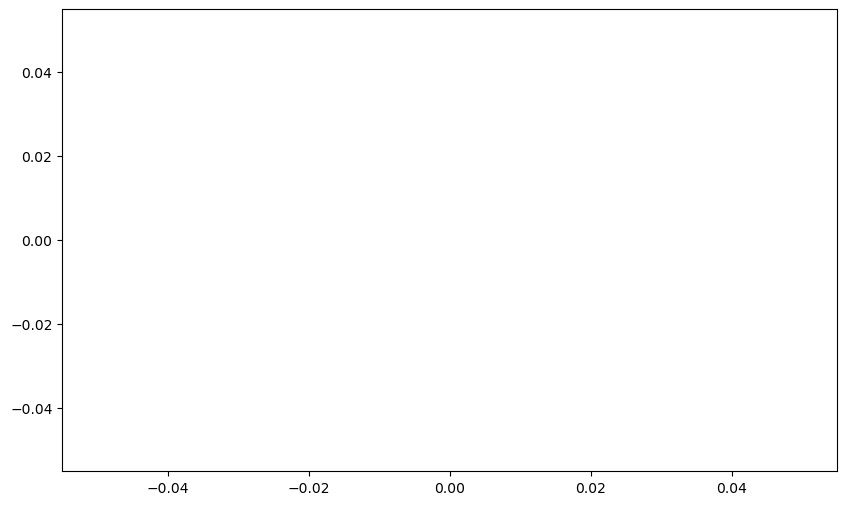

In [28]:
#Less essential genes at the ends of chromosomes, tend to get lost more often
chroms = ["chr" + str(x) for x in range(1, 23)] + ["chrX"]
v = pd.read_csv("Windows_FE/Windows_BGS_Score_PC0_SpecSup250_MAF0.25.txt", sep = "\t").set_index("Window")
vv = pd.read_csv("Windows_FE/Windows_MskHumPhyloP_PC0_SpecSup250_MAF0.25.txt", sep = '\t').set_index("Window")

vv.columns = [x + " 0" for x in list(vv.columns)]
v.columns = [x + " 1" for x in list(v.columns)]
vvv = v.join(vv).dropna()

vvv["PhyloP Statistic"] = -np.sign(vvv["Median fixed PhyloP4474 0"] - vvv["Median polymorphic PhyloP447 0"])*np.log10(vvv["Fisher exact signed p-value 0"])
#vvv["BGS Statistic"] = -np.sign(vvv["Median fixed BGS_Score 1"] - vvv["Median polymorphic BGS_Score 1"])*np.log10(vvv["Fisher exact signed p-value 1"])
#vvv["PhyloP Statistic corrected"] = vvv["PhyloP Statistic"] - np.maximum(vvv["BGS Statistic"], np.repeat(0, vvv.shape[0]))
vvv["Chrom"] = [x.split(":")[0] for x in list(vvv.index)]

for chrom in chroms:
    print(chrom)
        
    
    v = vvv[vvv["Chrom"].isin([chrom])]
    v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
    v = v.sort_values("Loc")
    v["X"] = range(v.shape[0])
    #v = v[(v["Number fixed variants"] >= 25) & (v["Number polymorphic variants"] >= 25)]
    #kde0 = gaussian_kde(v["7"], bw_method=0.3)
    
    x = v["Loc"]
    #y = gaussian_filter1d([x if x > 0 else 0 for x in list(v["alpha"])], sigma=3)
    #y = [x if x > 0 else 0 for x in list(v["alpha"])]
    #y = v["Number polymorphic variants"]
    #y3 = np.log10(1+np.maximum(v["PhyloP Statistic corrected"], 0))
    #y = v["Median fixed BGS_Score 0"]
    #y2 = v["Median polymorphic BGS_Score 0"]
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(x, -np.log10(v["Fisher exact signed p-value 0"]), color='b', label='Alpha')
    #ax.scatter(x, y2, color='orange', label='Alpha')
    #ax.scatter(x, y3, color='red', label='Alpha')
    plt.show()

SignificanceResult(statistic=0.049431229636374883, pvalue=0.01153139757270797)


<Axes: xlabel='PhyloP Statistic', ylabel='BGS Statistic'>

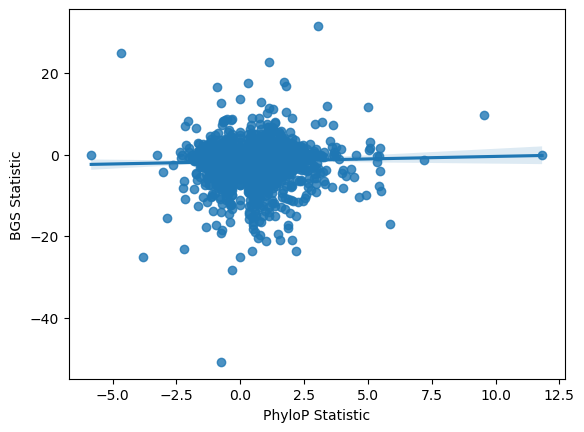

In [41]:
from scipy.stats import pearsonr,spearmanr
v = pd.read_csv("Output_Windows_Temp/Windows_BGS_Score_PC0_SpecSup100_MAF0.1.txt", sep = "\t").set_index("Window")
vv = pd.read_csv("Output_Windows_Temp/Windows_MskHumPhyloP_PC0_SpecSup100_MAF0.1.txt", sep = '\t').set_index("Window")
vv.columns = [x + " 0" for x in list(vv.columns)]
v.columns = [x + " 1" for x in list(v.columns)]
vvv = v.join(vv).dropna()

keep = []
for i in range(len(vvv.index)):
    if i % 10 == 9:
        keep.append(list(vvv.index)[i])
vvv = vvv.loc[keep].copy()
vvv["PhyloP Statistic"] = -np.sign(vvv["Median fixed PhyloP447 0"] - vvv["Median polymorphic PhyloP447 0"])*np.log10(vvv["Wilcoxon signed p-value 0"])
vvv["BGS Statistic"] = -np.sign(vvv["Median fixed PhyloP447 1"] - vvv["Median polymorphic PhyloP447 1"])*np.log10(vvv["Wilcoxon signed p-value 1"])
#vvv = vvv[(vvv["PhyloP Statistic"] > 3)]
print(spearmanr(vvv["BGS Statistic"], vvv["PhyloP Statistic"]))
sns.regplot(x = vvv["PhyloP Statistic"], y = vvv["BGS Statistic"])

In [86]:
vvv

Statistic 1  Median fixed BGS_Score 1  \
Window                                                          
chr1:700000-1700000       BGS_Score                     651.0   
chr1:800000-1800000       BGS_Score                     634.0   
chr1:900000-1900000       BGS_Score                     634.0   
chr1:1000000-2000000      BGS_Score                     634.0   
chr1:1100000-2100000      BGS_Score                     634.0   
...                             ...                       ...   
chr22:49400000-50400000   BGS_Score                     875.0   
chr22:49500000-50500000   BGS_Score                     715.0   
chr22:49600000-50600000   BGS_Score                     707.0   
chr22:49700000-50700000   BGS_Score                     697.0   
chr22:49800000-50800000   BGS_Score                     677.0   

                         Number fixed variants 1  \
Window                                             
chr1:700000-1700000                           35   
chr1:800000-1800000                           44   
chr1:900000-1900000                           63   
chr1:1000000-2000000                          68   
chr1:1100000-2100000                          83   
...                                          ...   
chr22:49400000-50400000                       67   
chr22:49500000-50500000                       55   
chr22:49600000-50600000                       45   
chr22:49700000-50700000                       35   
chr22:49800000-50800000                       29   

                         Median polymorphic BGS_Score 1  \
Window                                                    
chr1:700000-1700000                               633.0   
chr1:800000-1800000                               633.0   
chr1:900000-1900000                               633.0   
chr1:1000000-2000000                              633.0   
chr1:1100000-2100000                              634.0   
...                                                 ...   
chr22:49400000-50400000                           713.0   
chr22:49500000-50500000                           677.0   
chr22:49600000-50600000                           677.0   
chr22:49700000-50700000                           677.0   
chr22:49800000-50800000                           676.5   

                         Number polymorphic variants 1  \
Window                                                   
chr1:700000-1700000                                 15   
chr1:800000-1800000                                 25   
chr1:900000-1900000                                 26   
chr1:1000000-2000000                                30   
chr1:1100000-2100000                                39   
...                                                ...   
chr22:49400000-50400000                             38   
chr22:49500000-50500000                             29   
chr22:49600000-50600000                             24   
chr22:49700000-50700000                             23   
chr22:49800000-50800000                             20   

                         Wilcoxon signed p-value 1 Statistic 0  \
Window                                                           
chr1:700000-1700000                       0.007413   PhyloP447   
chr1:800000-1800000                       0.003016   PhyloP447   
chr1:900000-1900000                       0.001117   PhyloP447   
chr1:1000000-2000000                      0.009078   PhyloP447   
chr1:1100000-2100000                      0.129083   PhyloP447   
...                                            ...         ...   
chr22:49400000-50400000                   0.474716   PhyloP447   
chr22:49500000-50500000                   0.182752   PhyloP447   
chr22:49600000-50600000                   0.138481   PhyloP447   
chr22:49700000-50700000                   0.468227   PhyloP447   
chr22:49800000-50800000                   0.356416   PhyloP447   

                         Median fixed BGS_Score 0  Number fixed variants 0  \
Window                                   

In [37]:
v = pd.read_csv("Output_Windows_SimpleBL/Windows_BGS_Score_PC0_SpecSup100_MAF0.25.txt", sep = "\t").set_index("Window")
vv = pd.read_csv("Output_Windows_SimpleBL/Windows_MskHumPhyloP_PC0_SpecSup100_MAF0.25.txt", sep = '\t').set_index("Window")
vv.columns = [x + " P" for x in list(vv.columns)]
v.columns = [x + " BGS" for x in list(v.columns)]
vvv = v.join(vv).dropna()

vvv["PhyloP Statistic"] = -np.sign(vvv["Median fixed PhyloP4474 P"] - vvv["Median polymorphic PhyloP447 P"])*np.log10(vvv["Wilcoxon signed p-value P"])
vvv["BGS Statistic"] = -np.sign(vvv["Median fixed BGS Score BGS"] - vvv["Median polymorphic BGS Score BGS"])*np.log10(vvv["Wilcoxon signed p-value BGS"])
vvv["PhyloP Statistic corrected"] = vvv["PhyloP Statistic"] - np.maximum(vvv["BGS Statistic"], np.repeat(0, vvv.shape[0]))
vvv = vvv[vvv["Wilcoxon signed p-value BGS"] > 0.005]
vvv["Med Dif"] = vvv["Median fixed PhyloP4474 P"] - vvv["Median polymorphic PhyloP447 P"]
vvv.sort_values("PhyloP Statistic", ascending = False).head(50)

Statistic BGS  Median fixed BGS Score BGS  \
Window                                                               
chr4:56800000-57800000       BGS_Score                       780.0   
chr2:205500000-206500000     BGS_Score                       769.0   
chr9:17300000-18300000       BGS_Score                       866.5   
chr2:205800000-206800000     BGS_Score                       755.0   
chr6:42300000-43300000       BGS_Score                       741.0   
chr6:42200000-43200000       BGS_Score                       770.5   
chr2:205400000-206400000     BGS_Score                       780.0   
chr1:196700000-197700000     BGS_Score                       621.0   
chr6:42400000-43400000       BGS_Score                       724.0   
chr7:119900000-120900000     BGS_Score                       688.0   
chr8:38800000-39800000       BGS_Score                       801.0   
chr21:16600000-17600000      BGS_Score                       933.0   
chr9:17200000-18200000       BGS_Score                       858.0   
chr5:39400000-40400000       BGS_Score                       799.0   
chr21:16700000-17700000      BGS_Score                       930.0   
chr8:108400000-109400000     BGS_Score                       715.0   
chr8:108500000-109500000     BGS_Score                       715.0   
chr6:42500000-43500000       BGS_Score                       650.5   
chr1:196600000-197600000     BGS_Score                       621.5   
chr2:205700000-206700000     BGS_Score                       755.0   
chr6:42600000-43600000       BGS_Score                       603.0   
chr21:16500000-17500000      BGS_Score                       927.0   
chr4:102300000-103300000     BGS_Score                       688.0   
chr1:146700000-147700000     BGS_Score                       536.0   
chr6:41900000-42900000       BGS_Score                       809.0   
chr21:16400000-17400000      BGS_Score                       922.0   
chr2:205600000-206600000     BGS_Score                       757.0   
chr1:181500000-182500000     BGS_Score                       861.0   
chr4:57500000-58500000       BGS_Score                       858.0   
chr1:76400000-77400000       BGS_Score                       825.0   
chr5:11200000-12200000       BGS_Score                       923.0   
chr7:107900000-108900000     BGS_Score                       788.5   
chr1:76600000-77600000       BGS_Score                       803.0   
chr5:167100000-168100000     BGS_Score                       779.0   
chr14:79500000-80500000      BGS_Score                       821.0   
chr4:102400000-103400000     BGS_Score                       690.5   
chr18:51000000-52000000      BGS_Score                       839.0   
chr1:196800000-197800000     BGS_Score                       621.0   
chr1:147200000-148200000     BGS_Score                       536.0   
chr10:78900000-79900000      BGS_Score                       880.0   
chr7:1300000-2300000         BGS_Score                       854.0   
chr14:79600000-80600000      BGS_Score                       817.0   
chr7:108200000-109200000     BGS_Score                       784.0   
chr9:17100000-18100000       BGS_Score                       828.0   
chr8:38700000-39700000       BGS_Score                       808.0   
chr7:1100000-2100000         BGS_Score                       849.5   
chr6:136900000-137900000     BGS_Score                       889.0   
chr18:51100000-52100000      BGS_Score                       834.0   
chr4:127600000-128600000     BGS_Score                       552.0   
chr3:2100000-3100000         BGS_Score                       942.0   

                          Number fixed variants BGS  \
Window                                                
chr4:56800000-57800000                          965   
chr2:205500000-206500000                       1146   
chr9:17300000-18300000                         1002   
chr2:205800000-206800000                       1028   
chr6:42300000-43300000                          824   

In [ ]:
#ST6GALNAC5 is the poster child for a good region (chr1:76400000-77400000)
#As is CITED2 (chr6:139100000-140100000)
#As is TMEM74 (chr8:108200000-109200000)

In [ ]:
chr3:99800000-100800000	

C:\Users\astar\AppData\Local\Temp\ipykernel_5888\93846418.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


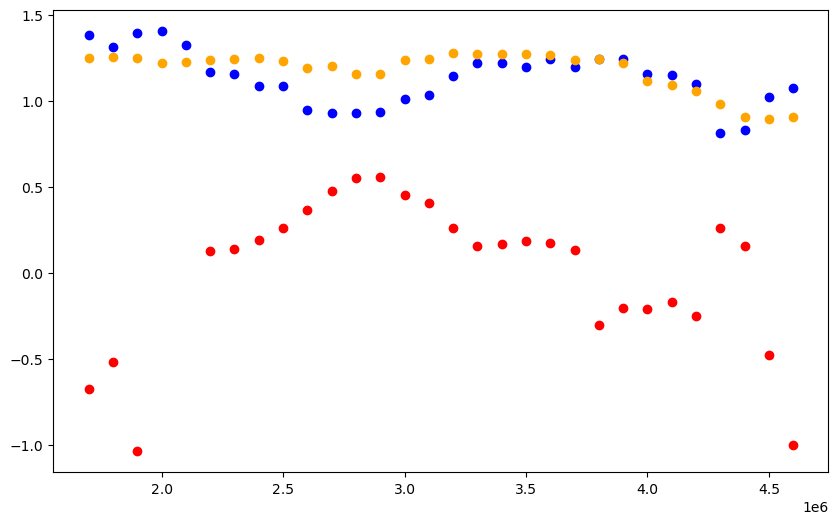

In [25]:
#All this is with SpecSup250, MAF 0.1

#chr7 75900000 is a good example of a big spike in polymorphic variant number coupled with a big dip in median PhyloP
#Coincides with an alternate haplotype in this case, not sure what is going on.

#chr5 6700000 is a good example where there is no big spike in polymorphic variant number 
#Fixed median PhyloP increases a little, and polymoprhic median PhyloP decreases quite a bit relative to neighboring regions

#chr9 132900000 is a good example where no big spike in polymorphic variant number, but 
#there is a decrease in median polymorphic PhyloP with no increase/decrease in median fixed PhyloP
#Also a lower number of fixed variants than neighboring regions

#MAF 0.25
#chr15 34400000 we see a dip in number of fixed variants, big dip in median polymorphic PhyloP
#chr10 54900000 we see a boost in number of poly variants and decrease in median polymorphic PhyloP

#chr21 18400000 is a good example of a spike up in fixed PhyloP coincident with a drop in polymorphic PhyloP
#chr14 46300000 (RPL10L locus) is a great example of a spike in fixed PhyloP without much change in polymorphic PhyloP

#Overall, this suggests to me that the polymorphic variants are, too a much larger extent, driving the signal we see
#with the windows approach.  I am not sure how to deal with this
v = pd.read_csv("Output_Windows_SimpleBL/Windows_BGS_Score_PC0_SpecSup250_MAF0.25.txt", sep = "\t").set_index("Window")
vv = pd.read_csv("Output_Windows_SimpleBL/Windows_MskHumPhyloP_PC0_SpecSup250_MAF0.25.txt", sep = '\t').set_index("Window")
vv.columns = [x + " P" for x in list(vv.columns)]
v.columns = [x + " BGS" for x in list(v.columns)]
vvv = v.join(vv).dropna()

vvv["PhyloP Statistic"] = -np.sign(vvv["Median fixed PhyloP4474 P"] - vvv["Median polymorphic PhyloP447 P"])*np.log10(vvv["Wilcoxon signed p-value P"])
vvv["BGS Statistic"] = -np.sign(vvv["Median fixed BGS Score BGS"] - vvv["Median polymorphic BGS Score BGS"])*np.log10(vvv["Wilcoxon signed p-value BGS"])
vvv["PhyloP Statistic corrected"] = vvv["PhyloP Statistic"] - np.maximum(vvv["BGS Statistic"], np.repeat(0, vvv.shape[0]))
vvv["Chrom"] = [x.split(":")[0] for x in list(vvv.index)]

v["Chrom"] = [x.split(":")[0] for x in list(v.index)]
v = vvv[vvv["Chrom"].isin(["chr9"])]
v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
v = v.sort_values("Loc")
v["X"] = range(v.shape[0])
#kde0 = gaussian_kde(v["7"], bw_method=0.3)
#y = gaussian_filter1d([x if x > 0 else 0 for x in list(v["Wilcoxon signed p-value"])], sigma=3)
#y = [x if x > 0 else 0 for x in list(v["alpha"])]
#y = -np.log10(v["Wilcoxon signed p-value"])
# determine the indices of the local maxima

#v["Smoothed"] = y
v_zoom = v[v["Loc"].isin(range(3200000-1500000, 3200000+1500000))]
x = v_zoom["Loc"]


fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, v_zoom["Median polymorphic PhyloP447 P"], color='b', label='Alpha')
ax.scatter(x, v_zoom["Median fixed PhyloP4474 P"], color='orange', label='Alpha')
ax.scatter(x, np.log10(1+v_zoom["PhyloP Statistic"]), color='red', label='Alpha')
#ax.scatter(x, v_zoom["alpha P"], color='green', label='Alpha')
#ax.scatter(x, v_zoom["PhyloP Statistic corrected"], color='red', label='Alpha')

plt.show()

In [22]:
vvv.sort_values("Wilcoxon signed p-value P")

Statistic BGS  Median fixed BGS Score BGS  \
Window                                                               
chr8:108200000-109200000     BGS_Score                       714.0   
chr8:107900000-108900000     BGS_Score                       655.0   
chr1:177600000-178600000     BGS_Score                       599.0   
chr4:56800000-57800000       BGS_Score                       780.0   
chr2:206300000-207300000     BGS_Score                       768.0   
...                                ...                         ...   
chr4:151200000-152200000     BGS_Score                       659.5   
chr17:17600000-18600000      BGS_Score                       587.0   
chr17:20300000-21300000      BGS_Score                       857.0   
chr16:29600000-30600000      BGS_Score                       541.0   
chr10:63900000-64900000      BGS_Score                       793.0   

                          Number fixed variants BGS  \
Window                                                
chr8:108200000-109200000                        890   
chr8:107900000-108900000                        871   
chr1:177600000-178600000                       1069   
chr4:56800000-57800000                          965   
chr2:206300000-207300000                        896   
...                                             ...   
chr4:151200000-152200000                       1040   
chr17:17600000-18600000                         365   
chr17:20300000-21300000                         361   
chr16:29600000-30600000                         503   
chr10:63900000-64900000                         849   

                          Median polymorphic BGS Score BGS  \
Window                                                       
chr8:108200000-109200000                             655.0   
chr8:107900000-108900000                             586.0   
chr1:177600000-178600000                             801.0   
chr4:56800000-57800000                               755.0   
chr2:206300000-207300000                             780.0   
...                                                    ...   
chr4:151200000-152200000                             673.0   
chr17:17600000-18600000                              601.0   
chr17:20300000-21300000                              869.0   
chr16:29600000-30600000                              537.0   
chr10:63900000-64900000                              840.0   

                          Number polymorphic variants BGS  \
Window                                                      
chr8:108200000-109200000                              484   
chr8:107900000-108900000                              446   
chr1:177600000-178600000                              234   
chr4:56800000-57800000                                432   
chr2:206300000-207300000                              341   
...                                                   ...   
chr4:151200000-152200000                              281   
chr17:17600000-18600000                                80   
chr17:20300000-21300000                                83   
chr16:29600000-30600000                                86   
chr10:63900000-64900000                               211   

                          Wilcoxon signed p-value BGS Statistic P  \
Window                                                              
chr8:108200000-109200000                 5.213932e-07   PhyloP447   
chr8:107900000-108900000                 2.767603e-14   PhyloP447   
chr1:177600000-178600000                 3.270530e-18   PhyloP447   
chr4:56800000-57800000                   1.192256e-01   PhyloP447   
chr2:206300000-207300000                 1.360583e-08   PhyloP447   
...                                               ...         ...   
chr4:151200000-152200000                 1.017263e-01   PhyloP447   
chr17:17600000-18600000                  2.345462e-03   PhyloP447   
chr17:20300000-21300000                  4.527688e-01   PhyloP447   
chr16:29600000-30600000               

In [24]:
vvv[vvv["Chrom"].isin(["chr5"])].sort_values("PhyloP Statistic").tail(50)

Statistic BGS  Median fixed BGS Score BGS  \
Window                                                               
chr5:119600000-120600000     BGS_Score                       904.0   
chr5:16000000-17000000       BGS_Score                       901.0   
chr5:122000000-123000000     BGS_Score                       809.0   
chr5:120800000-121800000     BGS_Score                       932.0   
chr5:39600000-40600000       BGS_Score                       752.0   
chr5:163500000-164500000     BGS_Score                       832.0   
chr5:163800000-164800000     BGS_Score                       782.0   
chr5:133200000-134200000     BGS_Score                       901.0   
chr5:11900000-12900000       BGS_Score                       796.0   
chr5:39700000-40700000       BGS_Score                       750.0   
chr5:11800000-12800000       BGS_Score                       796.0   
chr5:137700000-138700000     BGS_Score                       536.0   
chr5:58800000-59800000       BGS_Score                       857.0   
chr5:137800000-138800000     BGS_Score                       536.0   
chr5:120900000-121900000     BGS_Score                       932.0   
chr5:121700000-122700000     BGS_Score                       844.0   
chr5:16300000-17300000       BGS_Score                       951.0   
chr5:137600000-138600000     BGS_Score                       536.0   
chr5:140000000-141000000     BGS_Score                       536.0   
chr5:121800000-122800000     BGS_Score                       838.0   
chr5:150200000-151200000     BGS_Score                       858.0   
chr5:119500000-120500000     BGS_Score                       880.0   
chr5:11600000-12600000       BGS_Score                       795.0   
chr5:128300000-129300000     BGS_Score                       820.0   
chr5:79300000-80300000       BGS_Score                       839.0   
chr5:150300000-151300000     BGS_Score                       858.0   
chr5:11700000-12700000       BGS_Score                       796.0   
chr5:121200000-122200000     BGS_Score                       921.0   
chr5:167000000-168000000     BGS_Score                       770.0   
chr5:119400000-120400000     BGS_Score                       875.0   
chr5:166900000-167900000     BGS_Score                       779.0   
chr5:128100000-129100000     BGS_Score                       753.5   
chr5:57300000-58300000       BGS_Score                       873.0   
chr5:137500000-138500000     BGS_Score                       536.0   
chr5:11300000-12300000       BGS_Score                       909.0   
chr5:137400000-138400000     BGS_Score                       536.0   
chr5:121900000-122900000     BGS_Score                       813.0   
chr5:167200000-168200000     BGS_Score                       779.0   
chr5:121300000-122300000     BGS_Score                       914.0   
chr5:11500000-12500000       BGS_Score                       794.0   
chr5:39300000-40300000       BGS_Score                       800.0   
chr5:128200000-129200000     BGS_Score                       775.0   
chr5:39500000-40500000       BGS_Score                       775.0   
chr5:167100000-168100000     BGS_Score                       779.0   
chr5:11400000-12400000       BGS_Score                       889.0   
chr5:11200000-12200000       BGS_Score                       922.0   
chr5:121500000-122500000     BGS_Score                       889.0   
chr5:121400000-122400000     BGS_Score                       909.0   
chr5:39400000-40400000       BGS_Score                       799.0   
chr5:121600000-122600000     BGS_Score                       850.5   

                          Number fixed variants BGS  \
Window                                                
chr5:119600000-120600000                       1176   
chr5:16000000-17000000                          757   
chr5:122000000-123000000                       1000   
chr5:120800000-121800000                       1182   
chr5:39600000-40600000                          972   

chr1


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


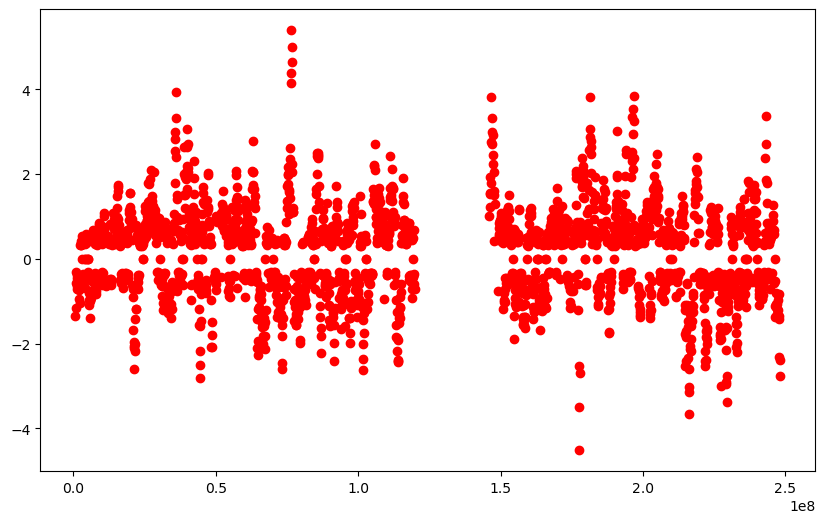

chr2


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


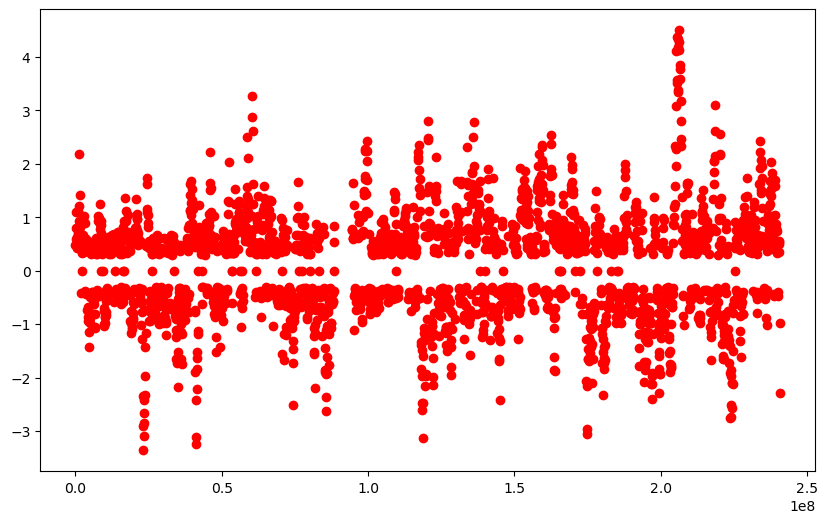

chr3


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


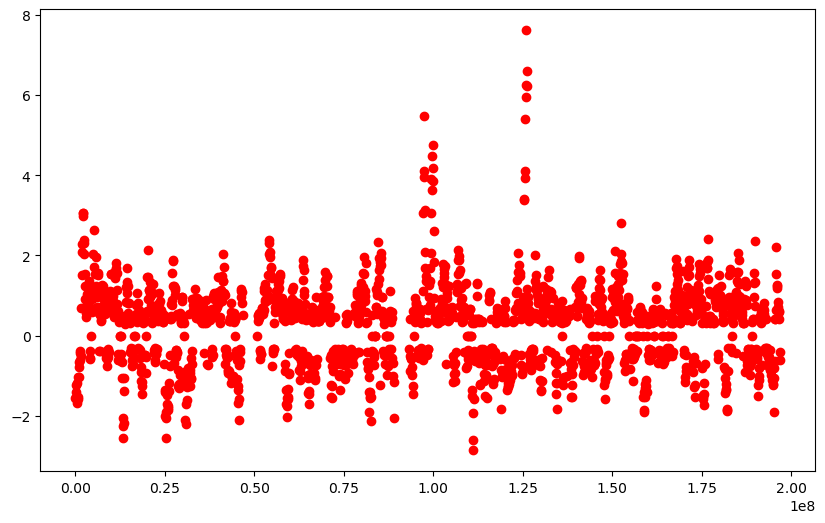

chr4


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


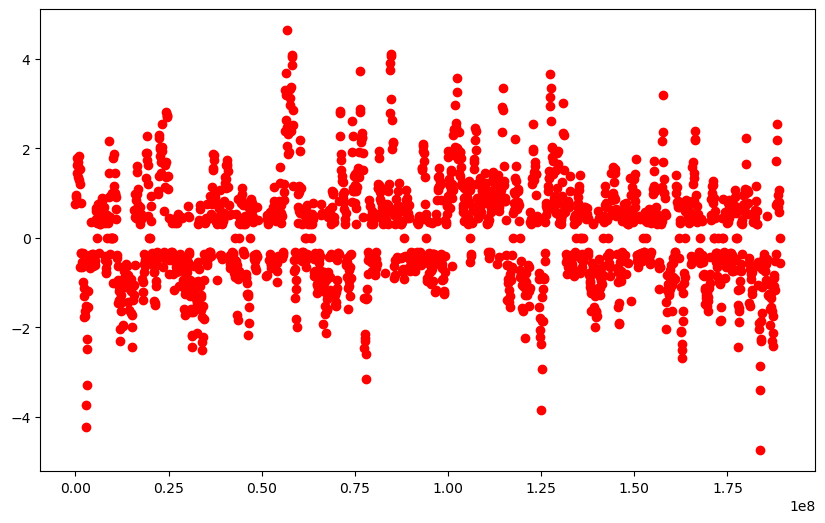

chr5


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


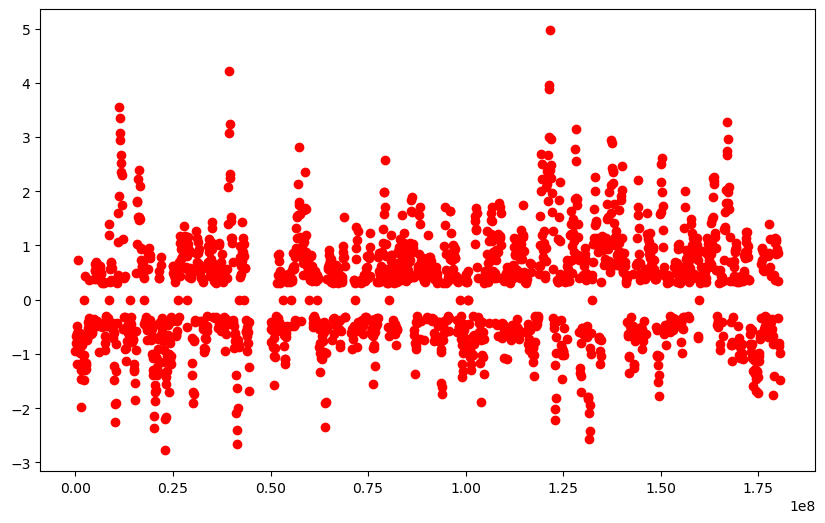

chr6


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


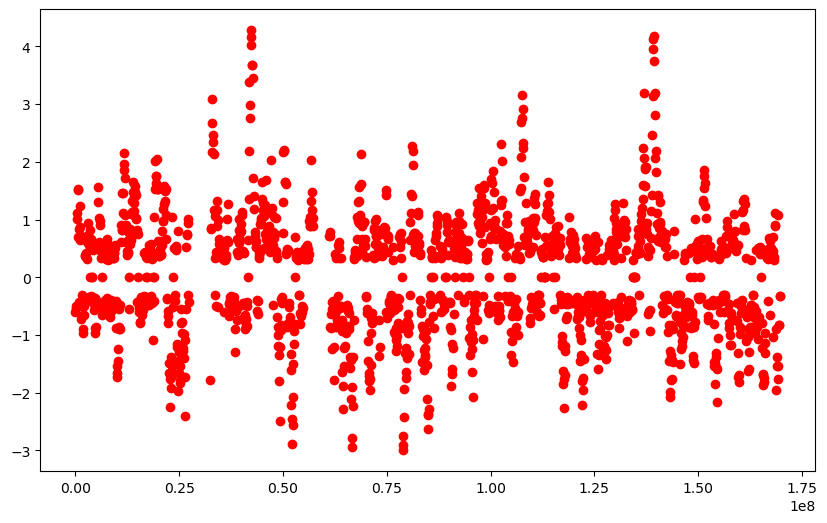

chr7


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


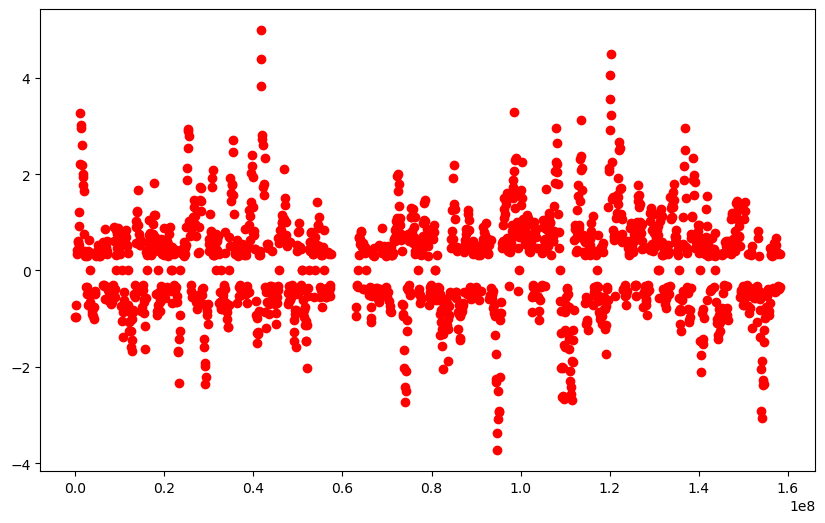

chr8


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


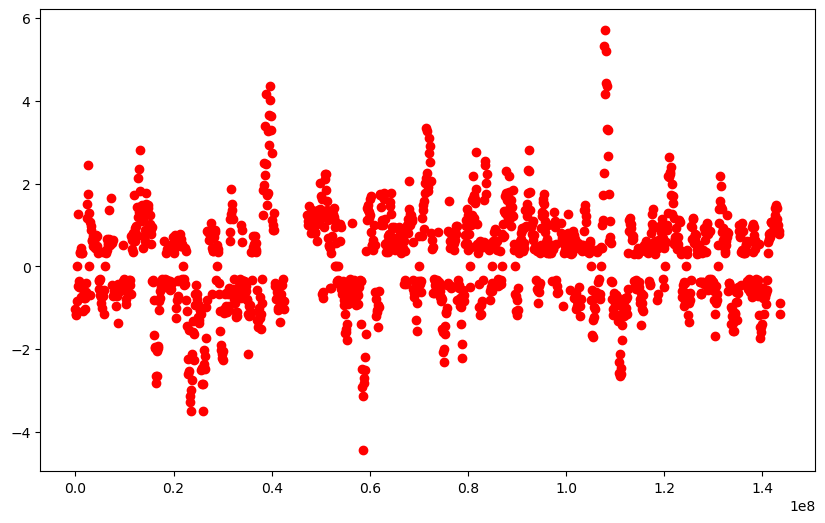

chr9


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


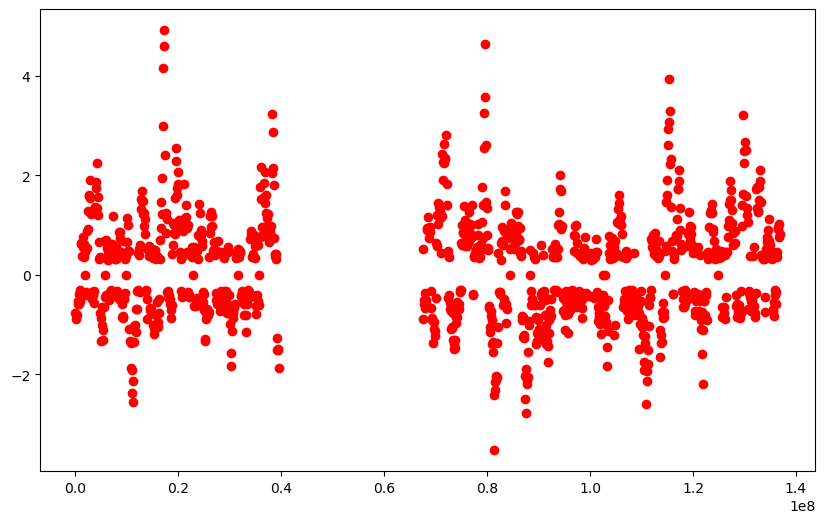

chr10


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


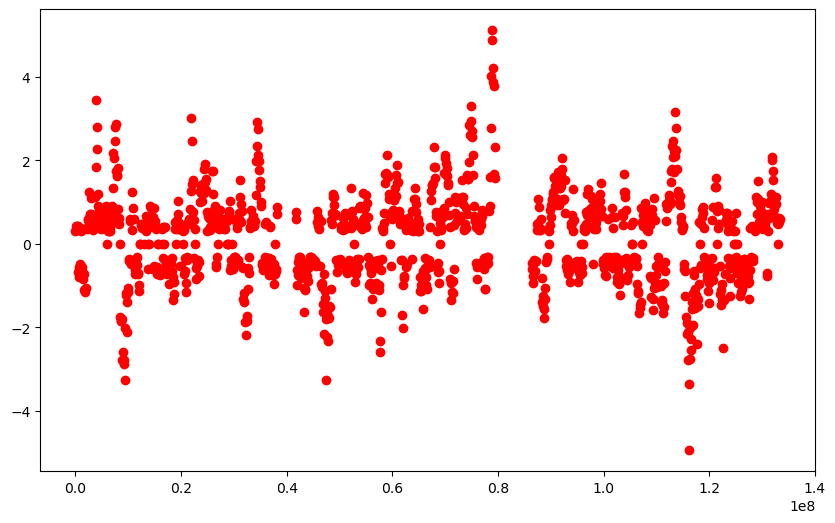

chr11


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


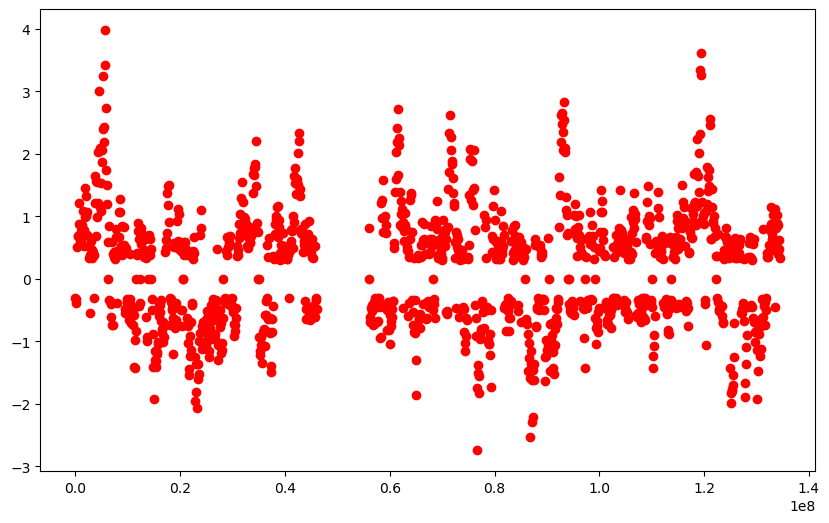

chr12


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


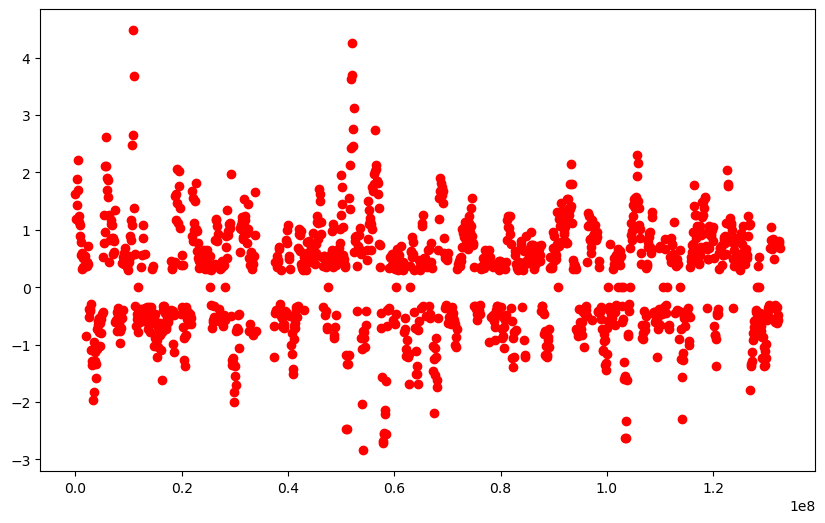

chr13


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


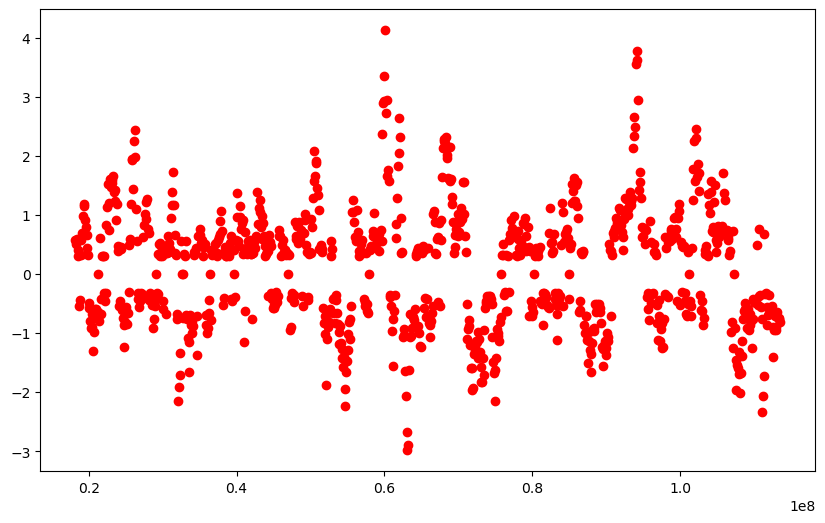

chr14


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


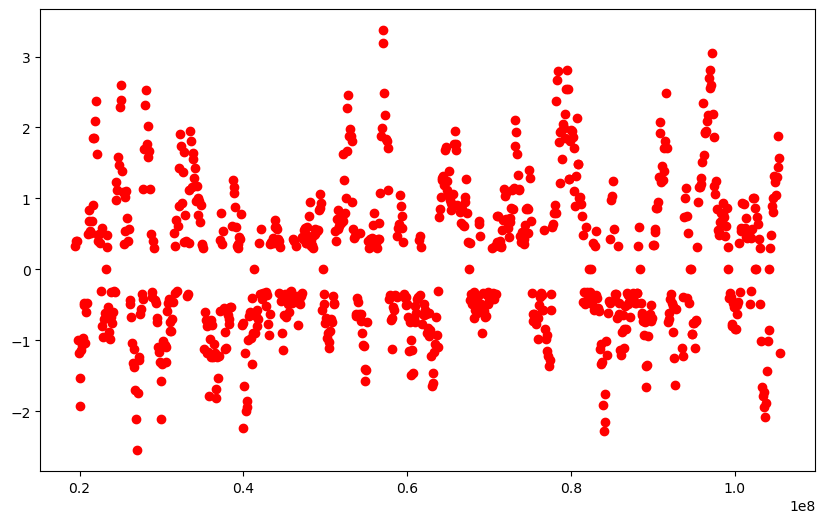

chr15


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


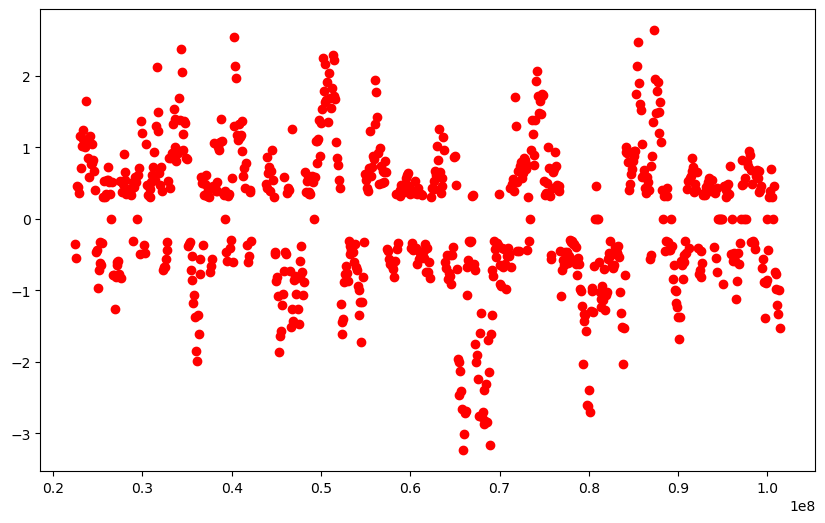

chr16


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


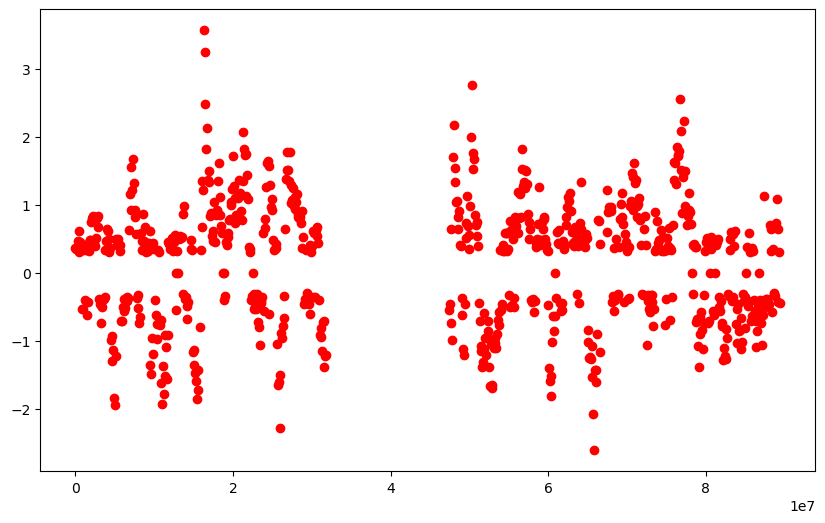

chr17


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


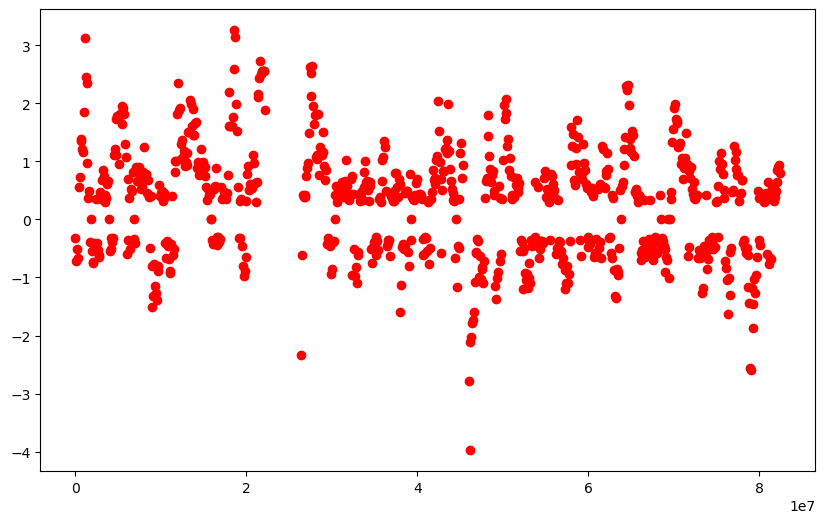

C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


chr18


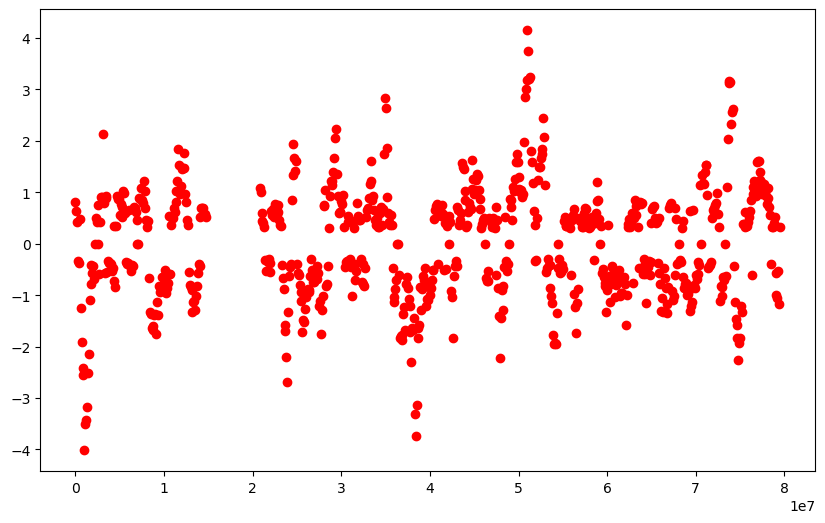

chr19


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


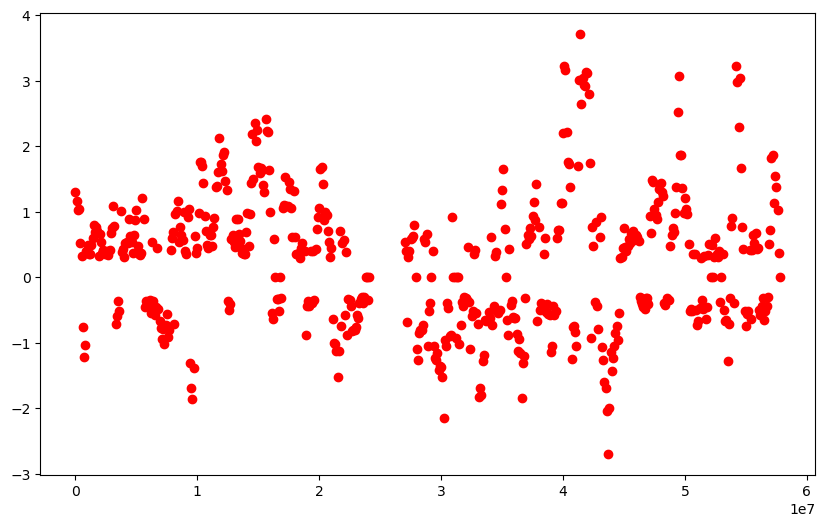

chr20


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


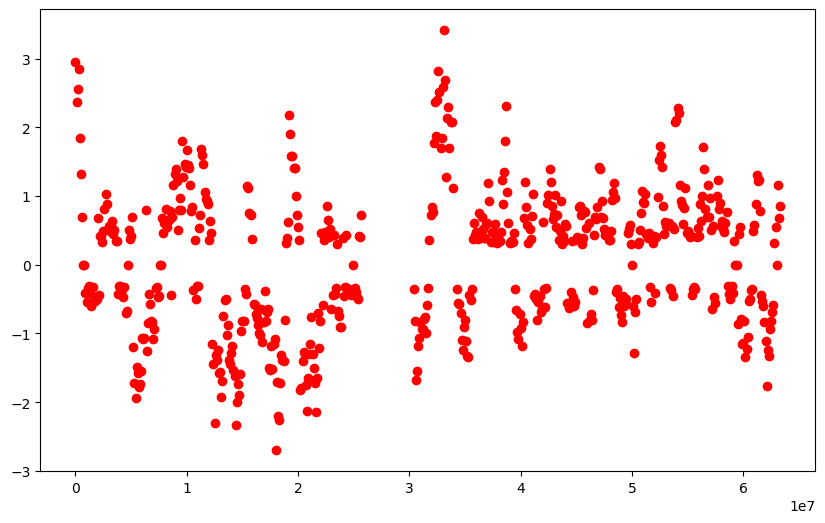

chr21


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


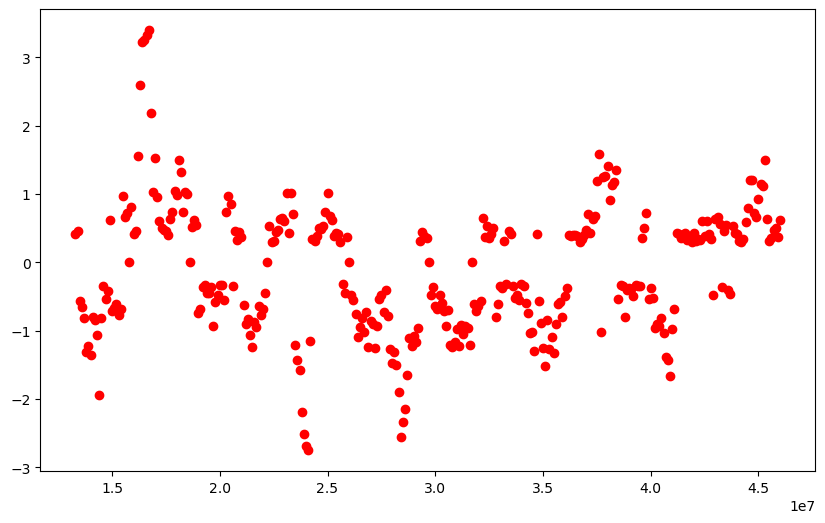

chr22


C:\Users\astar\AppData\Local\Temp\ipykernel_29028\2952284814.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]


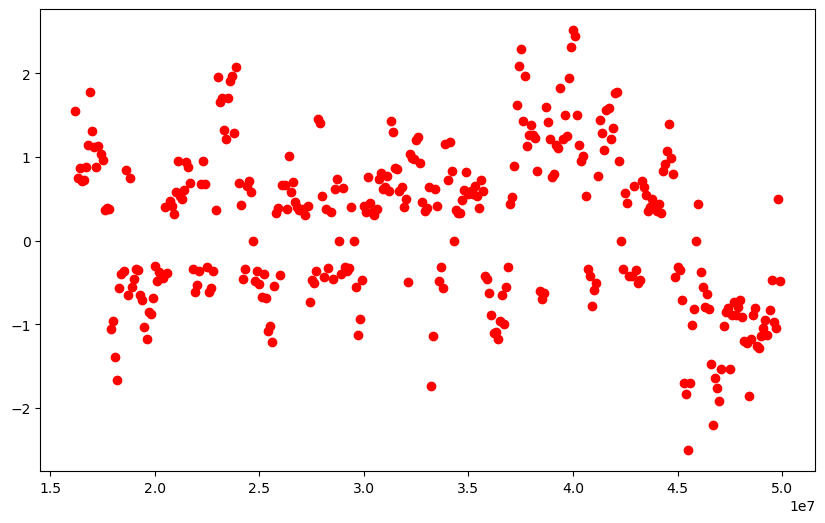

In [35]:
#Less essential genes at the ends of chromosomes, tend to get lost more often
v = pd.read_csv("Output_Windows_SimpleBL/Windows_BGS_Score_PC0_SpecSup50_MAF0.25.txt", sep = "\t").set_index("Window")
vv = pd.read_csv("Output_Windows_SimpleBL/Windows_MskHumPhyloP_PC0_SpecSup50_MAF0.25.txt", sep = '\t').set_index("Window")
vv.columns = [x + " P" for x in list(vv.columns)]
v.columns = [x + " BGS" for x in list(v.columns)]
vvv = v.join(vv).dropna()

vvv["PhyloP Statistic"] = -np.sign(vvv["Median fixed PhyloP4474 P"] - vvv["Median polymorphic PhyloP447 P"])*np.log10(vvv["Wilcoxon signed p-value P"])
vvv["BGS Statistic"] = -np.sign(vvv["Median fixed BGS Score BGS"] - vvv["Median polymorphic BGS Score BGS"])*np.log10(vvv["Wilcoxon signed p-value BGS"])
vvv["PhyloP Statistic corrected"] = vvv["PhyloP Statistic"] - np.maximum(vvv["BGS Statistic"], np.repeat(0, vvv.shape[0]))
vvv["Chrom"] = [x.split(":")[0] for x in list(vvv.index)]
chroms = ["chr" + str(i) for i in range(1, 23)]
for chrom in chroms:
    print(chrom)
        
    
    v = vvv[vvv["Chrom"].isin([chrom])]
    v["Loc"] = [int(x.split(":")[1].split("-")[0]) for x in list(v.index)]
    v = v.sort_values("Loc")
    v["X"] = range(v.shape[0])
    #v = v[(v["Number fixed variants"] >= 25) & (v["Number polymorphic variants"] >= 25)]
    #kde0 = gaussian_kde(v["7"], bw_method=0.3)
    
    x = v["Loc"]
    #y = gaussian_filter1d([x if x > 0 else 0 for x in list(v["alpha"])], sigma=3)
    #y = [x if x > 0 else 0 for x in list(v["alpha"])]
    #y = v["Number polymorphic variants"]
    y3 = v["PhyloP Statistic"]
    #y = v["Median fixed BGS_Score 0"]
    #y2 = v["Median polymorphic BGS_Score 0"]
    fig, ax = plt.subplots(figsize=(10,6))
    #ax.scatter(x, y, color='b', label='Alpha')
    #ax.scatter(x, y2, color='orange', label='Alpha')
    ax.scatter(x, y3, color='red', label='Alpha')
    plt.show()

In [34]:
vvv.sort_values("alpha P", ascending = False).head(50)

Statistic BGS  Median fixed BGS Score BGS  \
Window                                                                
chr22:16200000-17200000       BGS_Score                       794.0   
chr20:25700000-26700000       BGS_Score                       580.0   
chr6:57100000-58100000        BGS_Score                       559.0   
chr6:61200000-62200000        BGS_Score                       553.0   
chr6:61100000-62100000        BGS_Score                       553.0   
chr19:54200000-55200000       BGS_Score                       918.0   
chr6:56800000-57800000        BGS_Score                       557.0   
chr19:42100000-43100000       BGS_Score                       707.0   
chr19:42000000-43000000       BGS_Score                       707.0   
chr17:22200000-23200000       BGS_Score                       712.0   
chr1:147900000-148900000      BGS_Score                       536.0   
chr19:41900000-42900000       BGS_Score                       706.0   
chr19:54300000-55300000       BGS_Score                       919.0   
chr19:41400000-42400000       BGS_Score                       600.0   
chr17:21600000-22600000       BGS_Score                       818.0   
chr10:38200000-39200000       BGS_Score                       619.0   
chr1:196700000-197700000      BGS_Score                       620.0   
chr15:29800000-30800000       BGS_Score                       933.5   
chr19:42200000-43200000       BGS_Score                       708.0   
chr17:21500000-22500000       BGS_Score                       822.0   
chr7:72500000-73500000        BGS_Score                       723.0   
chr1:146000000-147000000      BGS_Score                       565.0   
chr20:30400000-31400000       BGS_Score                       570.0   
chr19:41500000-42500000       BGS_Score                       631.0   
chr15:31600000-32600000       BGS_Score                       922.0   
chr19:41300000-42300000       BGS_Score                       622.0   
chr19:54500000-55500000       BGS_Score                       913.0   
chr1:196800000-197800000      BGS_Score                       620.0   
chr15:29900000-30900000       BGS_Score                       933.0   
chr1:146100000-147100000      BGS_Score                       562.0   
chr10:38100000-39100000       BGS_Score                       592.0   
chr19:41600000-42600000       BGS_Score                       706.0   
chr1:196600000-197600000      BGS_Score                       621.0   
chr6:61300000-62300000        BGS_Score                       553.0   
chr17:21700000-22700000       BGS_Score                       784.0   
chr1:196500000-197500000      BGS_Score                       631.0   
chr14:105400000-106400000     BGS_Score                       545.0   
chr18:20800000-21800000       BGS_Score                       551.0   
chr19:41800000-42800000       BGS_Score                       641.5   
chr17:21800000-22800000       BGS_Score                       778.0   
chr17:22000000-23000000       BGS_Score                       778.0   
chr17:22100000-23100000       BGS_Score                       778.0   
chr17:21900000-22900000       BGS_Score                       778.0   
chr19:54400000-55400000       BGS_Score                       913.0   
chr1:147800000-148800000      BGS_Score                       536.0   
chr17:21400000-22400000       BGS_Score                       842.0   
chr7:72400000-73400000        BGS_Score                       852.0   
chr19:40700000-41700000       BGS_Score                       906.0   
chr1:146200000-147200000      BGS_Score                       542.0   
chr19:53900000-54900000       BGS_Score                       962.5   

                           Number fixed variants BGS  \
Window                                                 
chr22:16200000-17200000                           49   
chr20:25700000-26700000                           51   
chr6:57100000-58100000                           238   
chr6:61200000-62200000                           208 

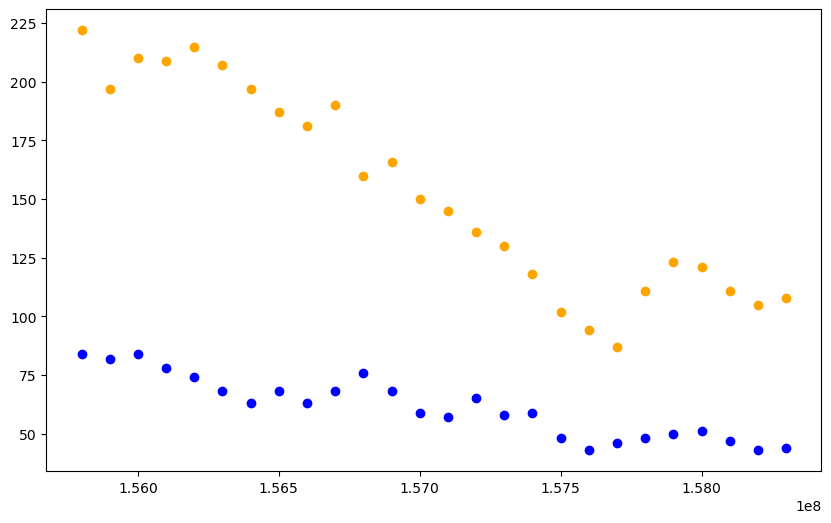

In [195]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, v_zoom["Number polymorphic variants 0"], color='b', label='Alpha')
ax.scatter(x, v_zoom["Number fixed variants 0"], color='orange', label='Alpha')
#ax.scatter(x, np.log10(1+v_zoom["PhyloP Statistic corrected"]), color='red', label='Alpha')

In [169]:
vvv.sort_values("PhyloP Statistic corrected", ascending = False).head(50).tail(50)

Statistic 1  Median fixed BGS_Score 1  \
Window                                                            
chr15:34400000-35400000     BGS_Score                     796.0   
chr7:75900000-76900000      BGS_Score                     709.0   
chr4:118100000-119100000    BGS_Score                     733.5   
chr4:189100000-190100000    BGS_Score                     585.0   
chr4:118200000-119200000    BGS_Score                     741.0   
chr7:76000000-77000000      BGS_Score                     717.0   
chr10:131900000-132900000   BGS_Score                     753.0   
chr10:54900000-55900000     BGS_Score                     903.0   
chr4:118300000-119300000    BGS_Score                     742.0   
chr3:75400000-76400000      BGS_Score                     867.0   
chr10:132500000-133500000   BGS_Score                     597.0   
chr12:60900000-61900000     BGS_Score                     839.0   
chr10:131800000-132800000   BGS_Score                     782.0   
chr10:132400000-133400000   BGS_Score                     616.0   
chr4:118000000-119000000    BGS_Score                     734.0   
chr15:34300000-35300000     BGS_Score                     834.0   
chr12:60500000-61500000     BGS_Score                     832.0   
chr3:74600000-75600000      BGS_Score                     743.0   
chr3:195800000-196800000    BGS_Score                     815.0   
chr3:74800000-75800000      BGS_Score                     733.0   
chr3:75500000-76500000      BGS_Score                     867.5   
chr11:71100000-72100000     BGS_Score                     671.5   
chr10:55200000-56200000     BGS_Score                     870.0   
chr2:123100000-124100000    BGS_Score                     882.0   
chr3:75300000-76300000      BGS_Score                     878.0   
chr12:60600000-61600000     BGS_Score                     837.5   
chr3:74900000-75900000      BGS_Score                     812.0   
chr3:74700000-75700000      BGS_Score                     738.0   
chr12:60800000-61800000     BGS_Score                     836.0   
chr3:75000000-76000000      BGS_Score                     835.0   
chr15:44100000-45100000     BGS_Score                     536.0   
chr12:60700000-61700000     BGS_Score                     836.0   
chr10:132000000-133000000   BGS_Score                     620.0   
chr15:34100000-35100000     BGS_Score                     855.0   
chr10:132100000-133100000   BGS_Score                     617.0   
chr10:132200000-133200000   BGS_Score                     617.0   
chr12:61000000-62000000     BGS_Score                     849.0   
chr7:76100000-77100000      BGS_Score                     730.0   
chr1:12800000-13800000      BGS_Score                     869.5   
chr10:55000000-56000000     BGS_Score                     881.0   
chr9:133000000-134000000    BGS_Score                     943.0   
chr7:76200000-77200000      BGS_Score                     768.0   
chr10:55100000-56100000     BGS_Score                     878.0   
chr10:15300000-16300000     BGS_Score                     915.0   
chr9:132900000-133900000    BGS_Score                     931.0   
chr4:10100000-11100000      BGS_Score                     896.5   
chr1:12700000-13700000      BGS_Score                     949.0   
chr4:117600000-118600000    BGS_Score                     795.0   
chr1:246600000-247600000    BGS_Score                     890.0   
chr15:34700000-35700000     BGS_Score                     725.0   

                           Number fixed variants 1  \
Window                                               
chr15:34400000-35400000                        535   
chr7:75900000-76900000                         195   
chr4:118100000-119100000                       216   
chr4:189100000-190100000                        84   
chr4:118200000-119200000                       227   
chr7:76000000-77000000                         214   
chr10:131900000-132900000                      128   
chr10:54900000-55900000                        262   
c